In [154]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal
from tqdm import tqdm


In [155]:
from MEAData import MEAData
import spike_train_tools as stt
import glob
import numpy as np
import matplotlib.pyplot as plt

In [156]:
folders = glob.glob('C:\\Users\\bow-lab\\Documents\\Code\\data\\240917_results\\24039_results\\000*')

files = []

for folder in folders:
    files.append(f'{folder}\\sorted.npz')

MEA_data = MEAData(files[0], overview=False)

In [153]:
MEA_data.compute_sttc(dt_max=50, dt_min=0, plot=False)

Make tilings...


379it [00:01, 202.41it/s]


Calculating STTC...
Total number of iterations: 71631


  0%|          | 0/379 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
dt_mins = np.arange(0, 100, 10)
sttcs = []

for dt_min in dt_mins:
    print(f'___{dt_min}-{dt_min+10} ms___')
    sttc = MEA_data.compute_sttc(dt_max=dt_min+10, dt_min=dt_min, plot=False)
    sttcs.append(sttc)

___0-10 ms___
Make tilings...


379it [00:01, 253.40it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:07<00:00,  1.13s/it]



100%
Plotting...
___10-20 ms___
Make tilings...


379it [00:01, 248.53it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:07<00:00,  1.13s/it]



100%
Plotting...
___20-30 ms___
Make tilings...


379it [00:01, 261.45it/s]


Calculating STTC...
Total number of iterations: 71631


  0%|          | 0/379 [00:00<?, ?it/s]c:\Users\bow-lab\Documents\Code\scripts\spike_train_tools.py:324: RuntimeWarning: invalid value encountered in scalar divide
  sttc[i, j] = 1/2 * ( (P_i - T[j]) / (1 - P_i*T[j]) + (P_j - T[i]) / (1 - P_j*T[i]) )
100%|██████████| 379/379 [06:59<00:00,  1.11s/it]



100%
Plotting...
___30-40 ms___
Make tilings...


379it [00:01, 269.42it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:00<00:00,  1.11s/it]



100%
Plotting...
___40-50 ms___
Make tilings...


379it [00:01, 263.42it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [06:59<00:00,  1.11s/it]



100%
Plotting...
___50-60 ms___
Make tilings...


379it [00:01, 264.50it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:01<00:00,  1.11s/it]



100%
Plotting...
___60-70 ms___
Make tilings...


379it [00:01, 263.56it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [06:59<00:00,  1.11s/it]



100%
Plotting...
___70-80 ms___
Make tilings...


379it [00:01, 266.87it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:00<00:00,  1.11s/it]



100%
Plotting...
___80-90 ms___
Make tilings...


379it [00:01, 250.81it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:05<00:00,  1.12s/it]



100%
Plotting...
___90-100 ms___
Make tilings...


379it [00:01, 258.82it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:05<00:00,  1.12s/it]



100%
Plotting...


In [ ]:
distances = np.zeros_like(sttcs[0])
for i, unit_i in enumerate(MEA_data.units):
    for j, unit_j in enumerate(MEA_data.units):
        distances[i, j] = np.sqrt((unit_i['x_max']-unit_j['x_max'])**2 + (unit_i['y_max']-unit_j['y_max'])**2)


In [ ]:
sttc0 = MEA_data.compute_sttc(dt_max=50, dt_min=0, plot=False)

Make tilings...


379it [00:02, 148.55it/s]


Calculating STTC...
Total number of iterations: 71631


100%|██████████| 379/379 [07:05<00:00,  1.12s/it]



100%
Plotting...


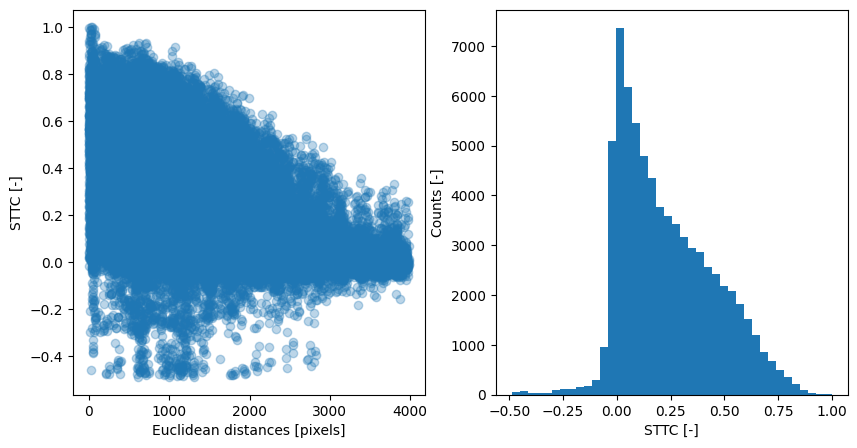

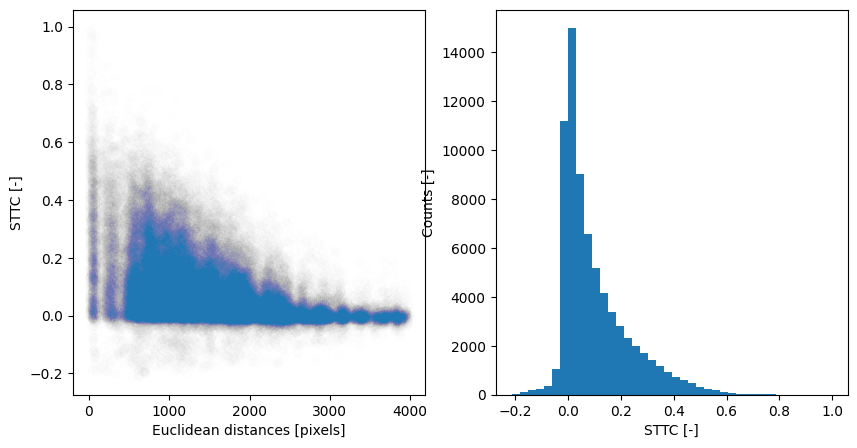

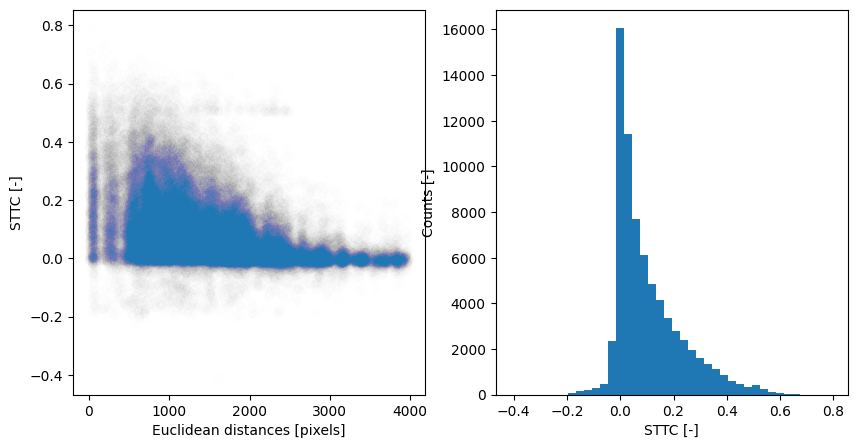

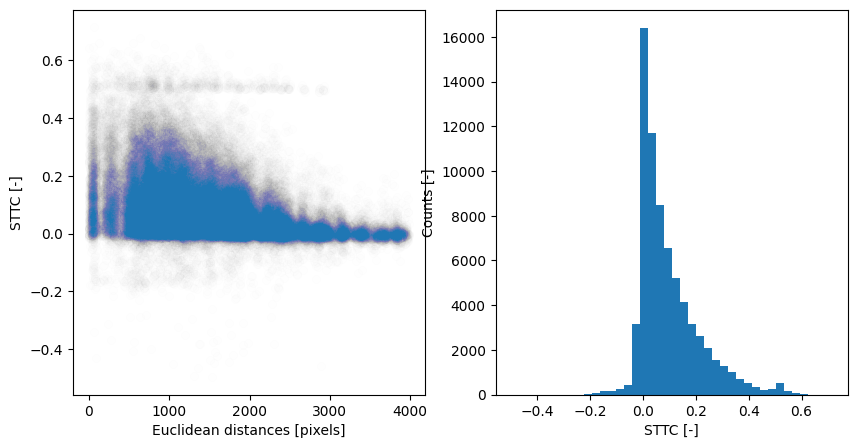

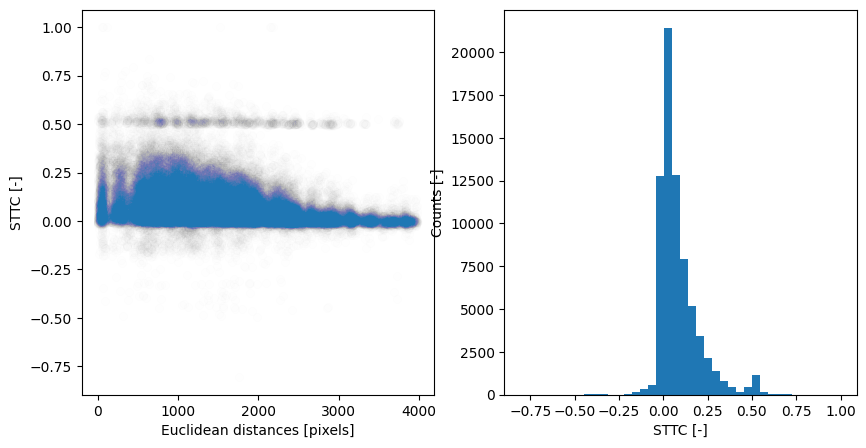

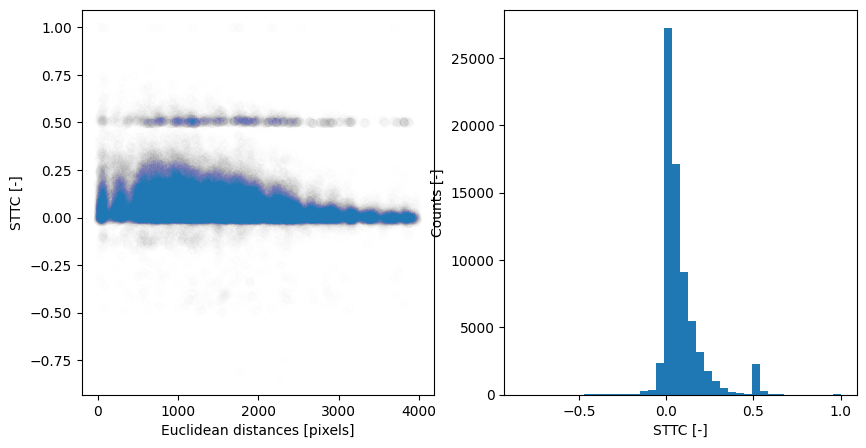

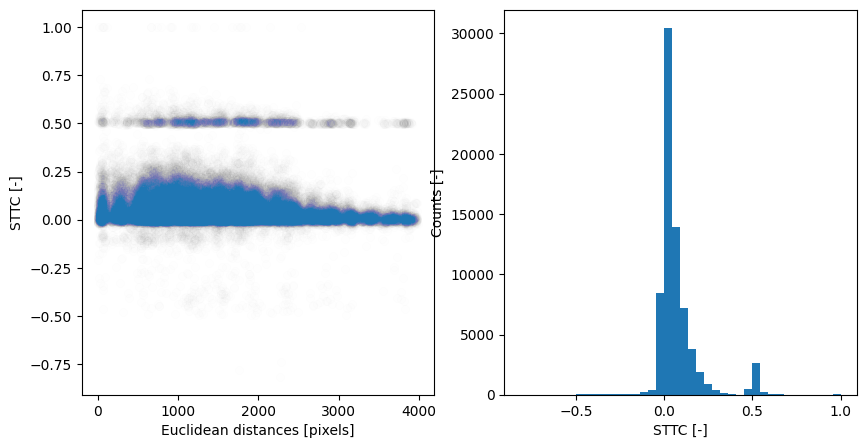

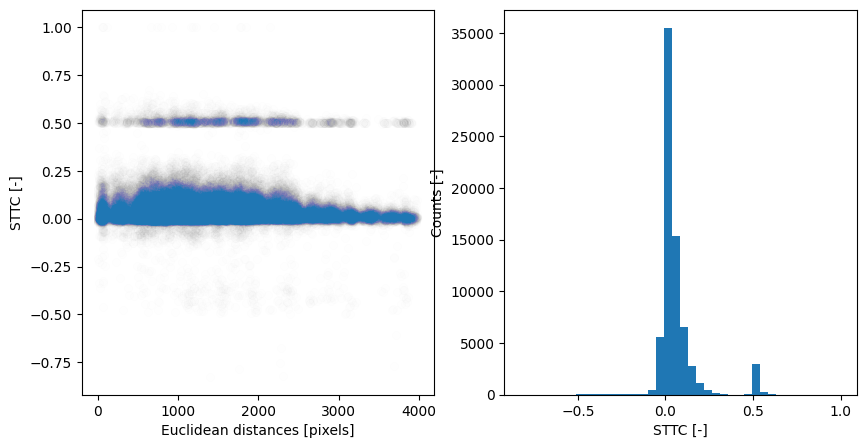

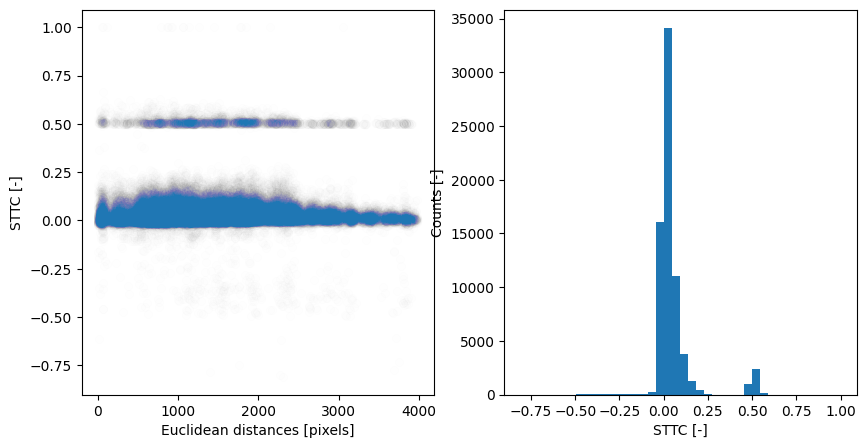

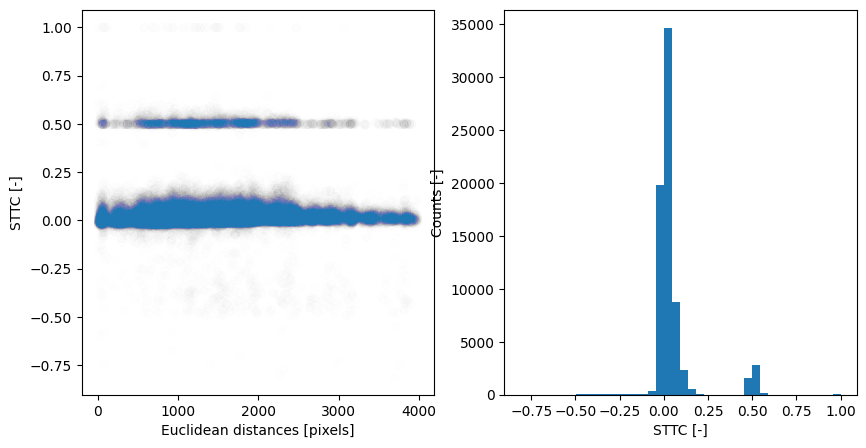

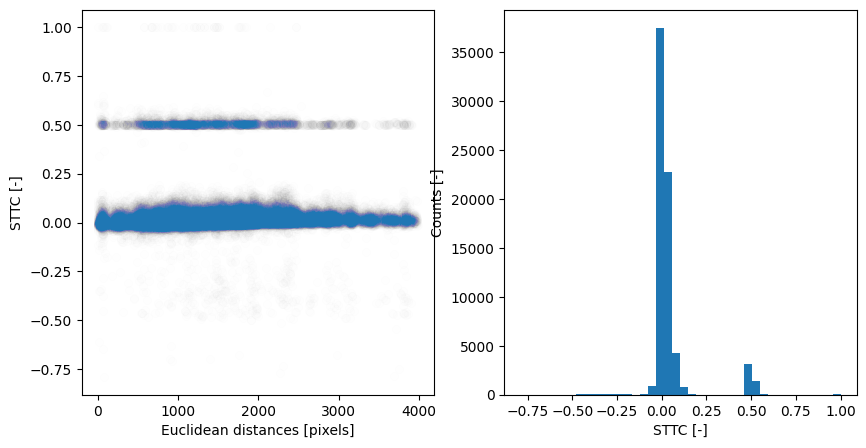

In [ ]:
result0 = sttc0[np.triu_indices(np.shape(sttc0)[0], k=1)]
distance = distances[np.triu_indices(np.shape(distances)[0], k=1)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(distance, result0, alpha=.3)
axs[0].set_xlabel('Euclidean distances [pixels]')
axs[0].set_ylabel('STTC [-]')
axs[1].hist(result0, bins=40)
axs[1].set_xlabel('STTC [-]')
axs[1].set_ylabel('Counts [-]')
plt.show()

for sttc in sttcs:
    result = sttc[np.triu_indices(np.shape(sttc)[0], k=1)]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(distance, result, alpha=.003)
    axs[0].set_xlabel('Euclidean distances [pixels]')
    axs[0].set_ylabel('STTC [-]')
    axs[1].hist(result, bins=40)
    axs[1].set_xlabel('STTC [-]')
    axs[1].set_ylabel('Counts [-]')
    plt.show()

(array([1908.,  604., 1413., 1156., 1433., 2604., 2662., 3778., 3511.,
        3370., 3360., 3792., 3203., 2989., 2749., 3298., 2766., 3370.,
        3118., 3078., 1796., 1688., 2029., 1814., 1639.,  830.,  962.,
         753., 1010.,  859.,  440.,  780.,  313.,  441.,  430.,  261.,
         401.,  320.,  473.,  230.]),
 array([   0.        ,   99.62135345,  199.24270689,  298.86406034,
         398.48541379,  498.10676723,  597.72812068,  697.34947413,
         796.97082757,  896.59218102,  996.21353446, 1095.83488791,
        1195.45624136, 1295.0775948 , 1394.69894825, 1494.3203017 ,
        1593.94165514, 1693.56300859, 1793.18436204, 1892.80571548,
        1992.42706893, 2092.04842238, 2191.66977582, 2291.29112927,
        2390.91248271, 2490.53383616, 2590.15518961, 2689.77654305,
        2789.3978965 , 2889.01924995, 2988.64060339, 3088.26195684,
        3187.88331029, 3287.50466373, 3387.12601718, 3486.74737063,
        3586.36872407, 3685.99007752, 3785.61143096, 3885.23278441

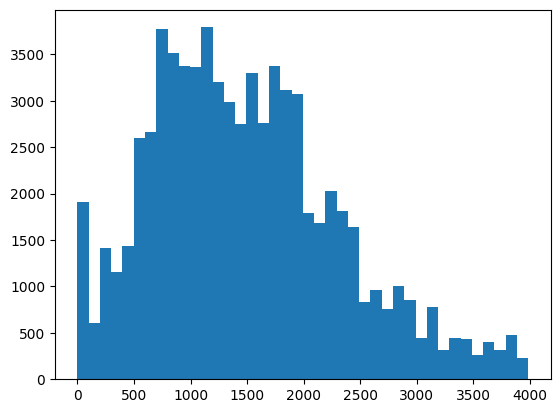

In [ ]:
plt.hist(distance, bins=40)

In [ ]:
len(np.argwhere((sttcs[5] > .48) & (sttcs[5] < .52)))

5086

In [ ]:
len(np.argwhere((sttcs[5] > .48) & (sttcs[5] < .52)))/(len(sttcs[5])**2-len(sttcs[5]))

0.03550138906339434

In [ ]:
slice = (np.argwhere((sttcs[5] > .48) & (sttcs[5] < .52)))

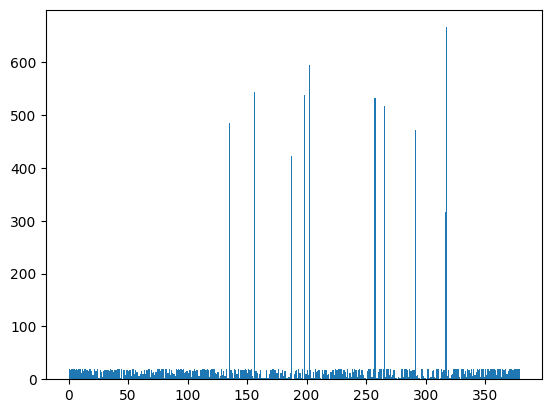

In [ ]:
counts, bins, _ = plt.hist(slice.flatten(), bins=np.arange(0, 380, 1))
plt.show()


In [ ]:
slice[0]

array([  0, 135], dtype=int64)

In [ ]:
n = 1
sttcs[5][slice[n][0], slice[n][1]]

0.500389752787663

In [ ]:
len(bins), len(counts)

(380, 379)

In [ ]:
np.argwhere(counts > 100)[:,0]

array([135, 156, 187, 198, 202, 257, 265, 291, 316, 317], dtype=int64)

In [ ]:
np.average(np.sum(MEA_data.spikes_binary[counts > 100], axis=1))

3177.9

In [ ]:
np.average(np.sum(MEA_data.spikes_binary, axis=1))

1070.0606860158312

In [ ]:
activity = []
for unit in MEA_data.units:
    activity.append(len(unit['spike_train']))

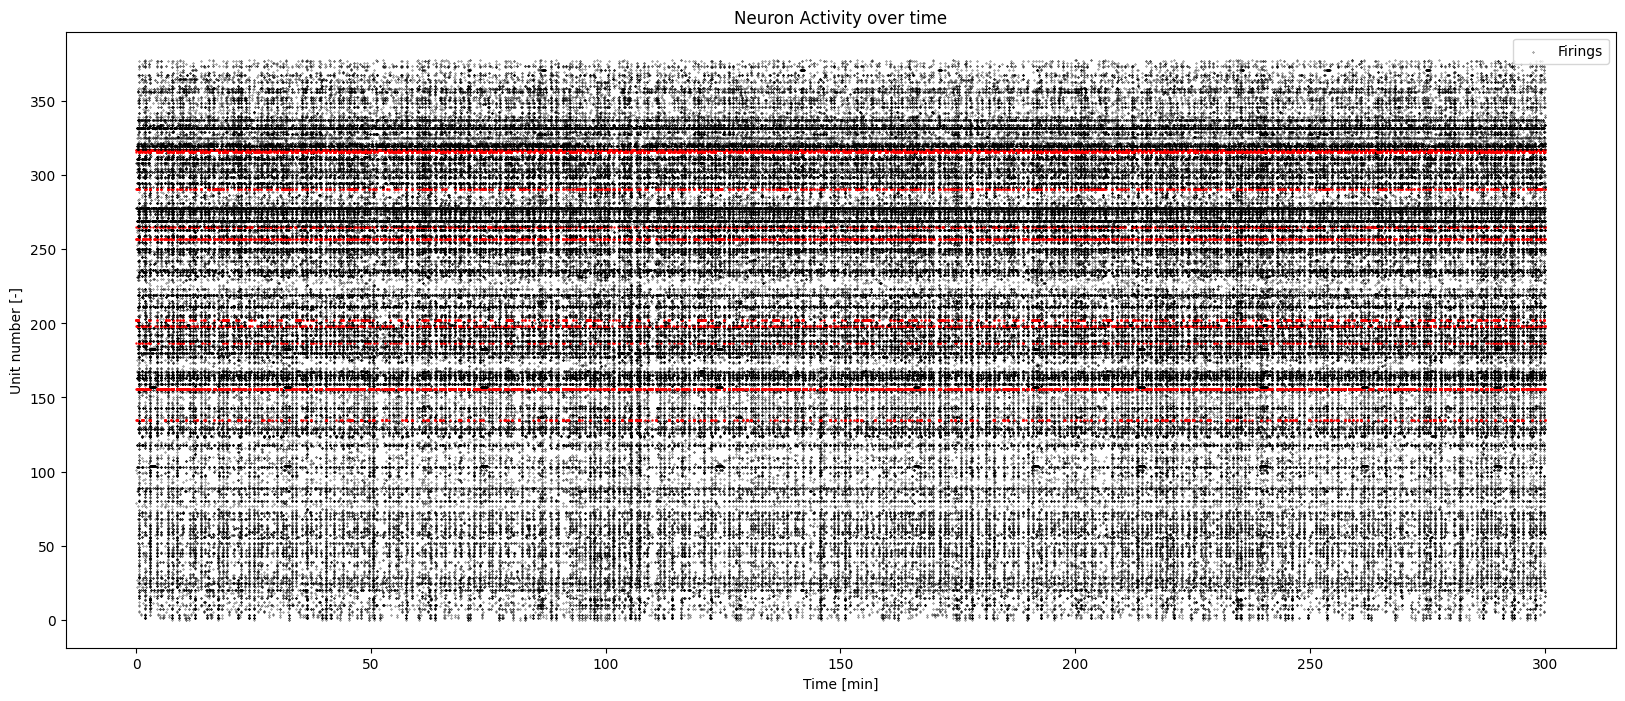

In [ ]:
order = np.argsort(-1*np.array(activity))

units_sorted = MEA_data.units

kanker = list(np.argwhere(counts > 100)[:,0])

_, ax1 = plt.subplots(figsize=(20, 8))

plt.title('Neuron Activity over time')


for i, unit in enumerate(units_sorted):
    if i == 0:
        label = 'Firings'
    else:
        label = None

    if i in kanker:
        ax1.scatter(unit['spike_train']/MEA_data.sample_rate, 
                np.full_like(unit['spike_train'], MEA_data.unit_numbers[i]), 
                s=.5, color='r', label=label)
    else:
        ax1.scatter(unit['spike_train']/MEA_data.sample_rate, 
                np.full_like(unit['spike_train'], MEA_data.unit_numbers[i]), 
                s=.07, color='k', label=label)

ax1.set_ylabel('Unit number [-]')
#ax1.set_ylim(0, 100)

plt.legend()

plt.xlabel('Time [min]')
#plt.xlim(50, 60)

plt.show()

In [160]:
print(np.argwhere(train)[:,0], np.shape(np.argwhere(train)))

[  36780   61803  187500  309072  329249  480632  502577  561128  640136
  707748  727376  823768  869274  869535 1020975 1051148 1202859 1249601
 1273807 1301308 1319379 1421674 1421791 1462824 1721227 1723083 1788796
 1962320 2079878 2281400 2322388 2322552 2713432 2728142 2854075 2872055
 2872089 2911655 3070000 3136244 3295680 3393710 3481395 3481575 3998306
 4002948 4003312 4067138 4067357 4126700 4421142 4657290 4686747 4693036
 4701398 4753113 4872860 4945104 5177636 5177845 5177921 5230481 5362288
 5508606 5550017] (65, 1)


(0.0, 1.0)

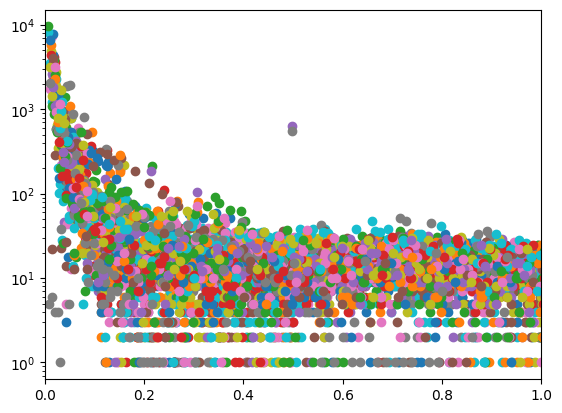

In [ ]:
for i, train in MEA_data.spikes_binary:
    diff = np.diff(np.argwhere(train)[:,0])/MEA_data.sample_rate
    counts, bins = np.histogram(diff, bins=50)
    plt.scatter(bins[:-1]+np.mean(np.diff(bins))/2, counts)
plt.yscale('log')
plt.xlim(0, 1)

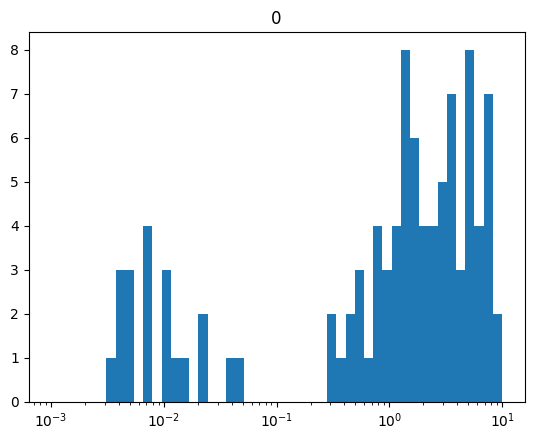

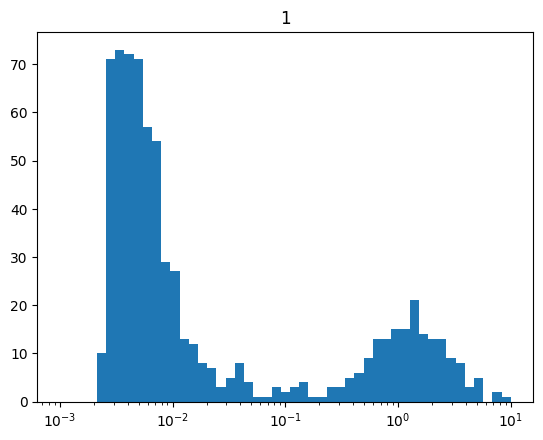

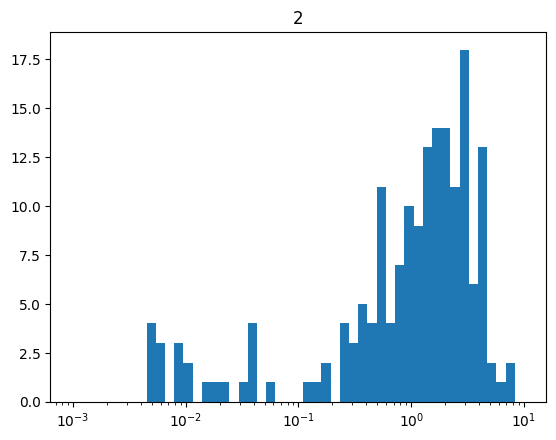

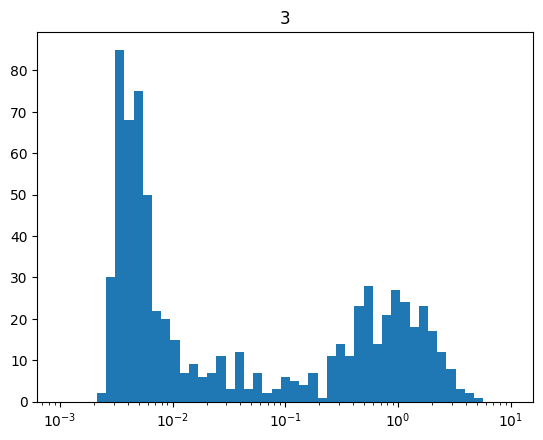

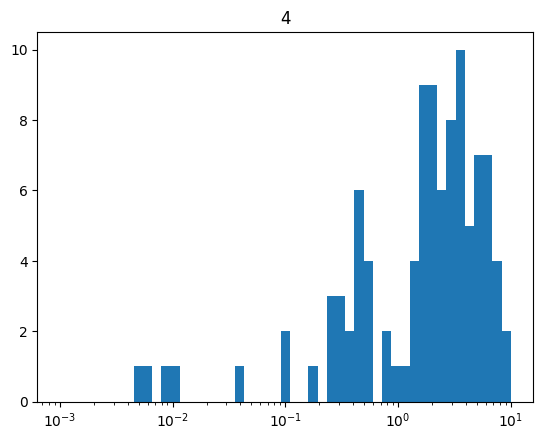

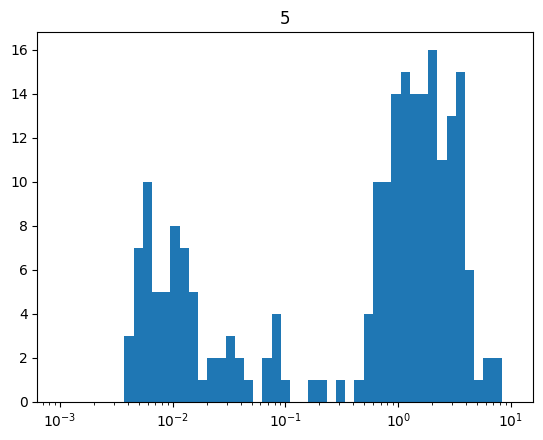

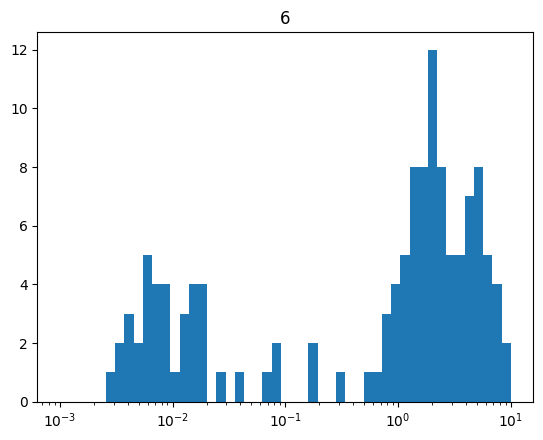

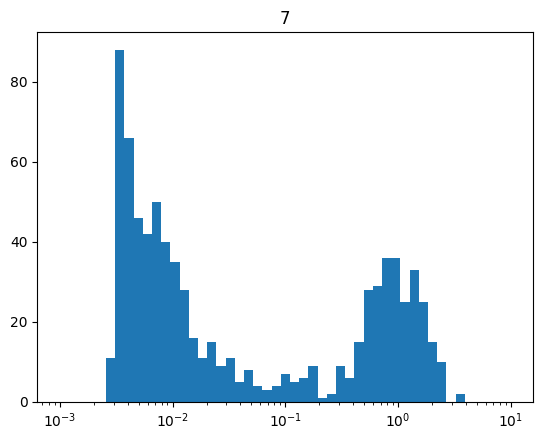

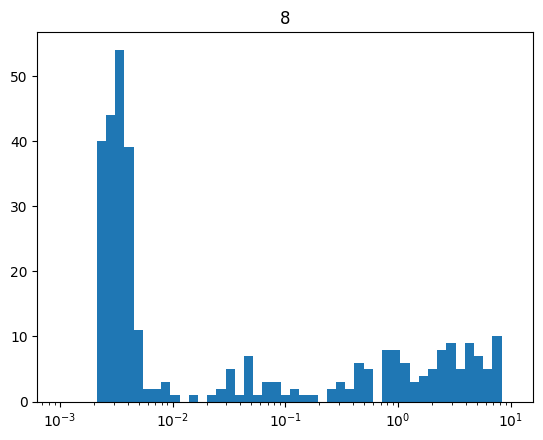

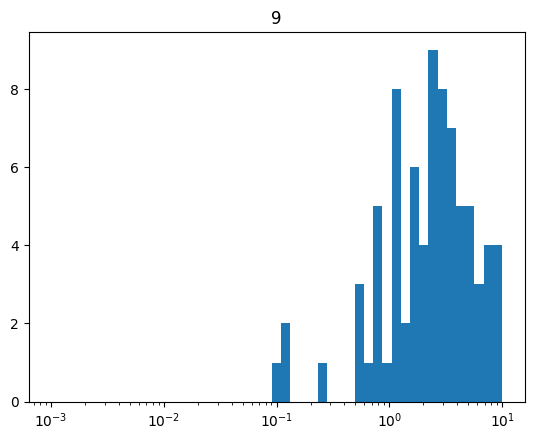

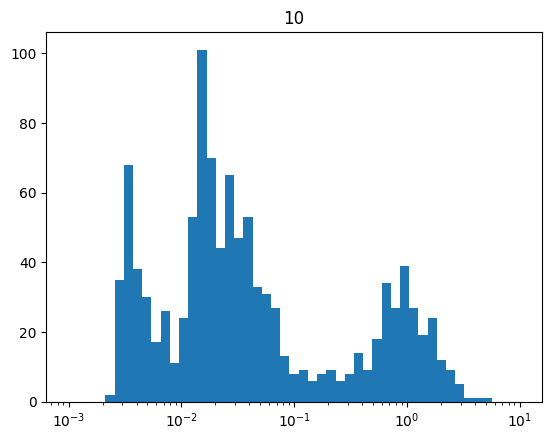

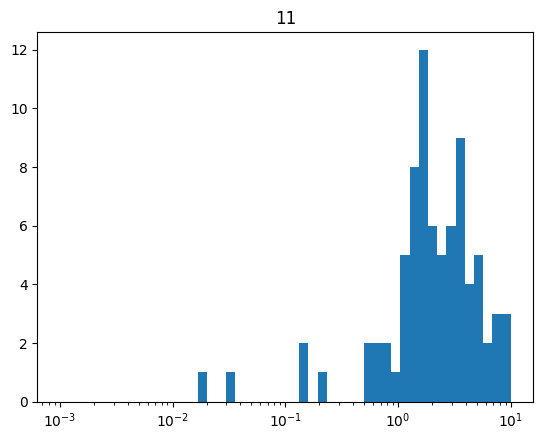

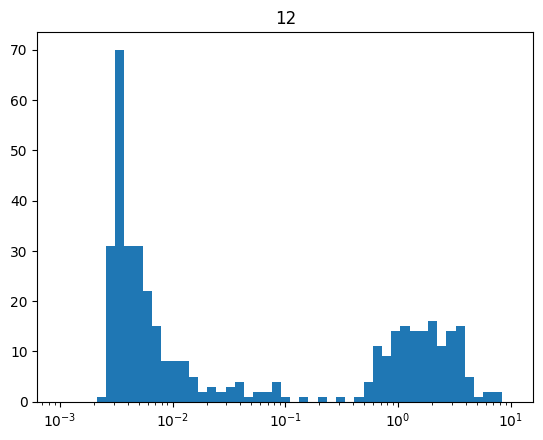

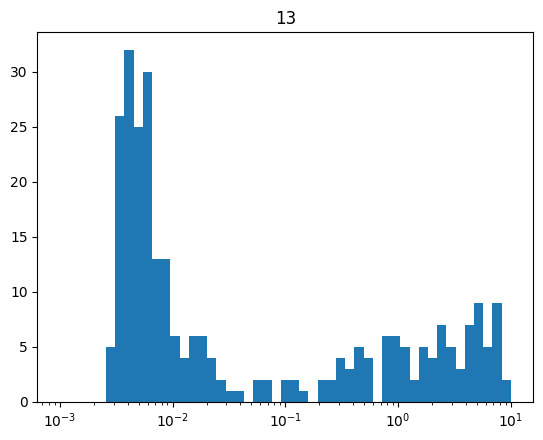

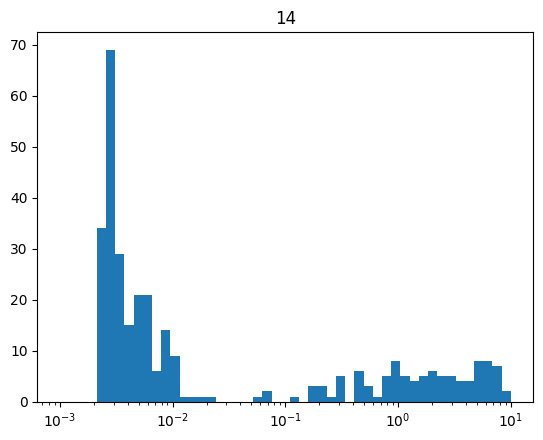

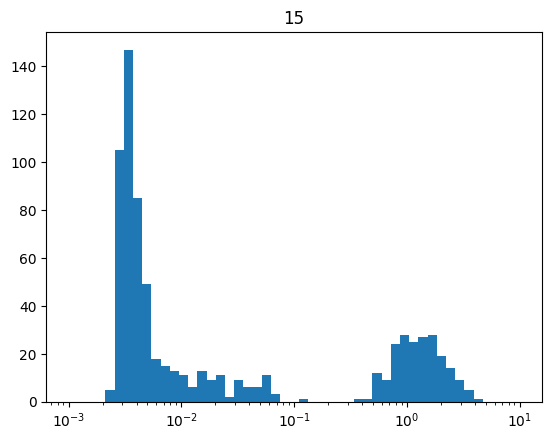

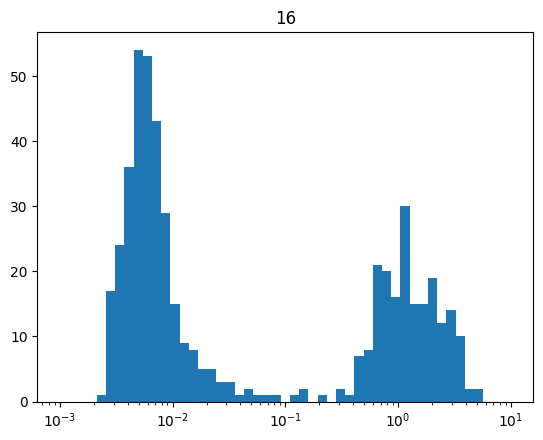

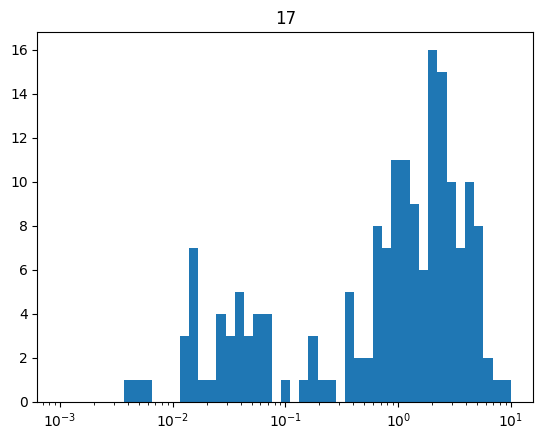

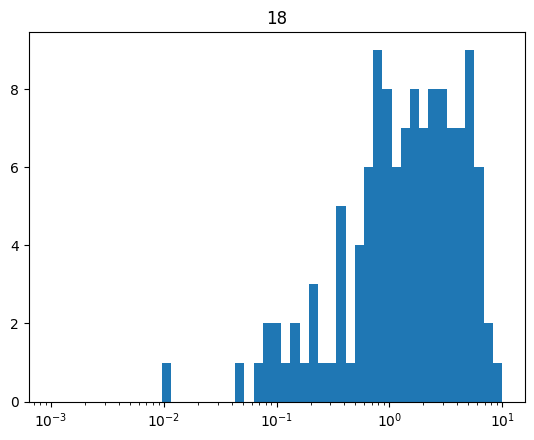

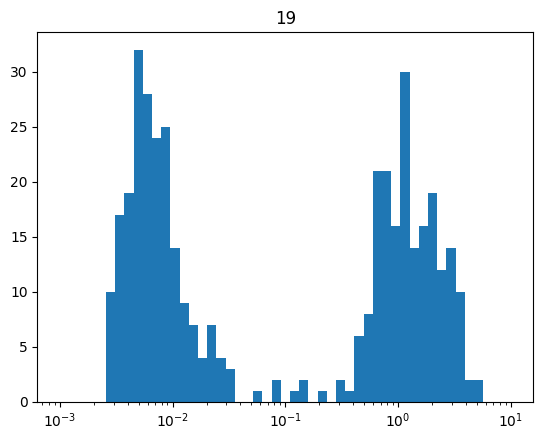

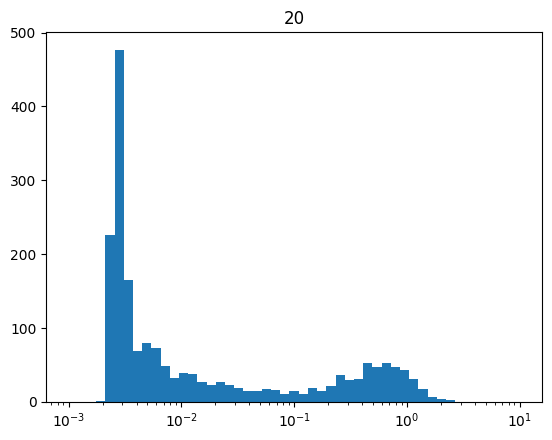

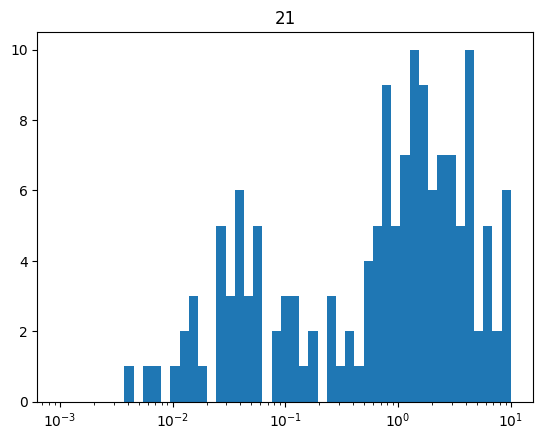

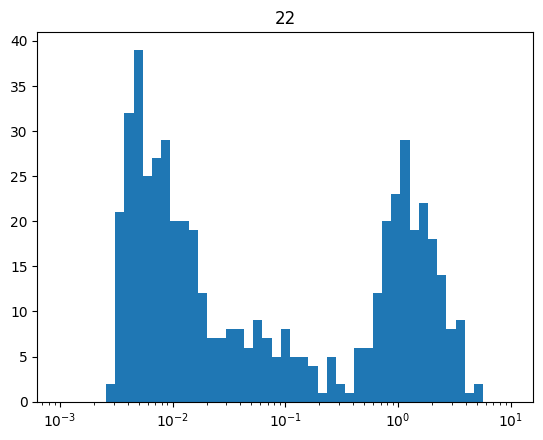

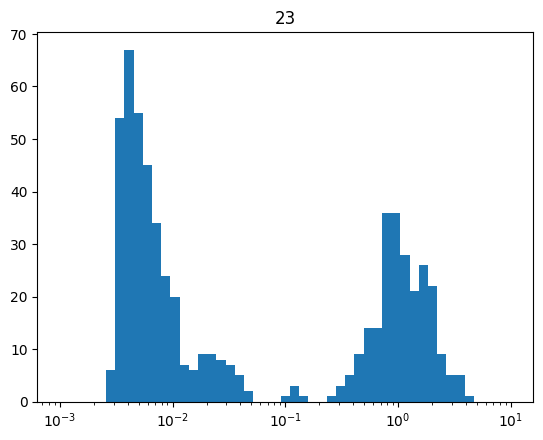

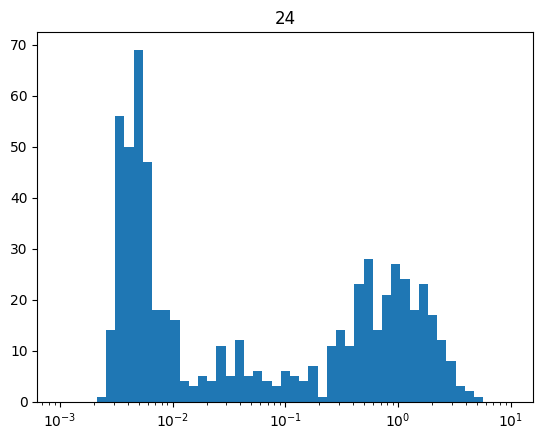

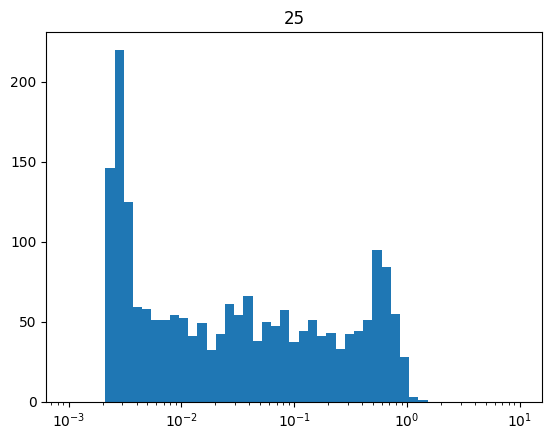

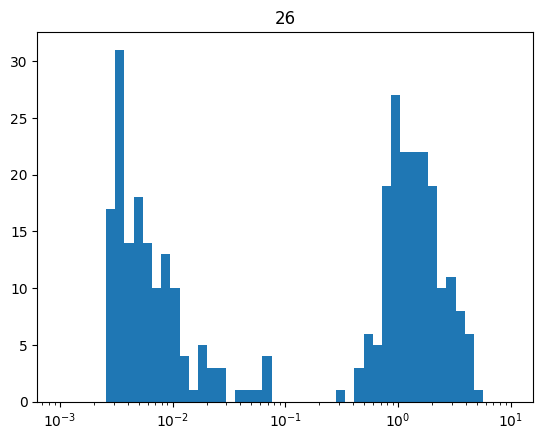

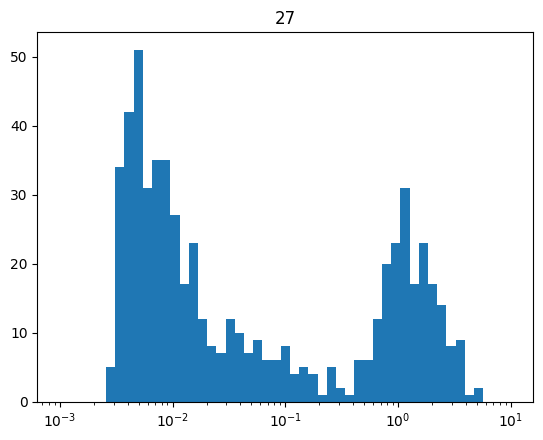

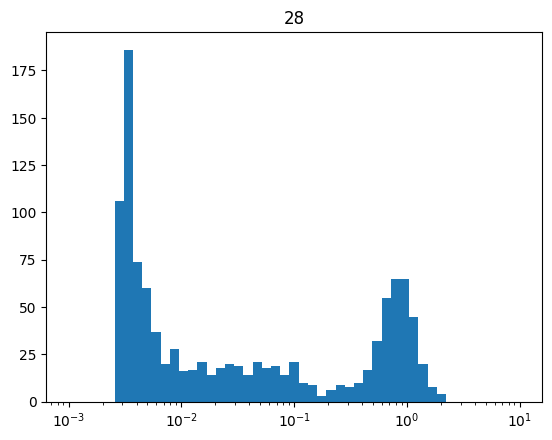

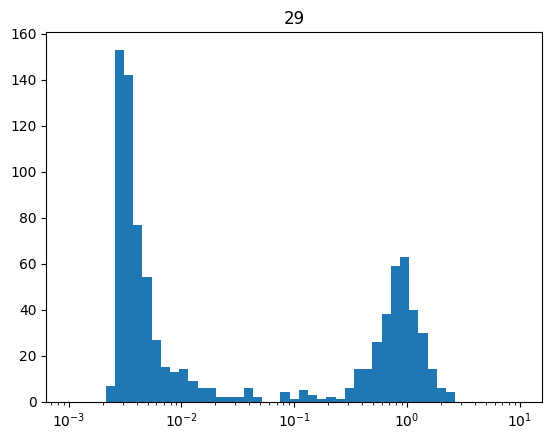

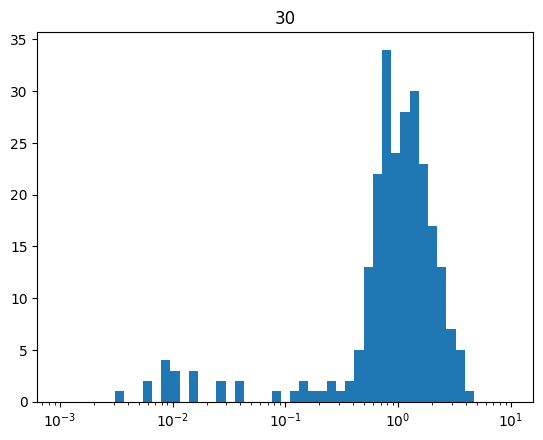

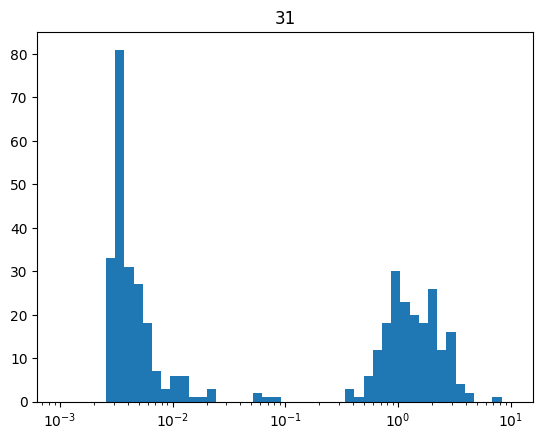

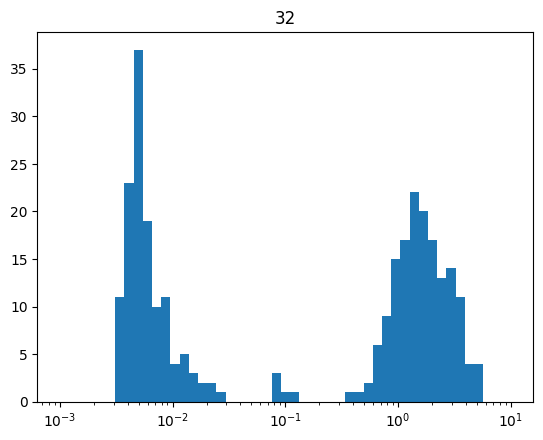

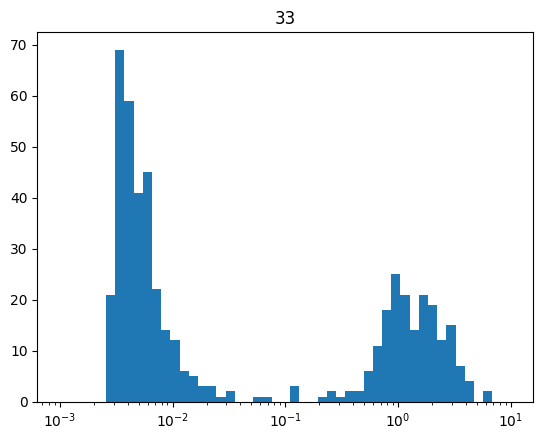

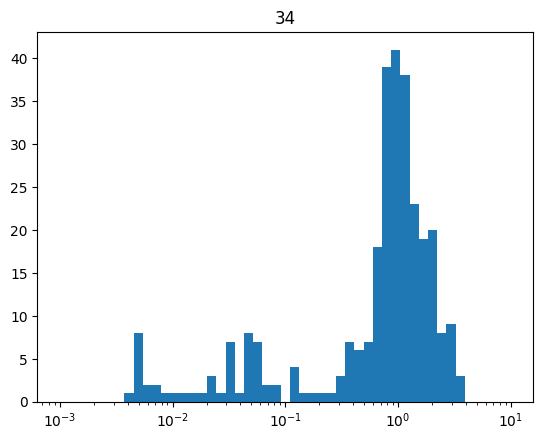

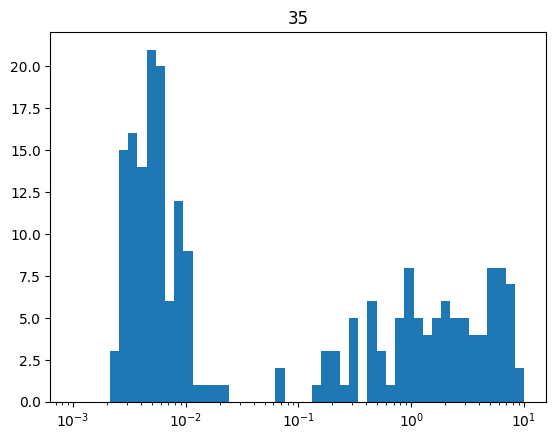

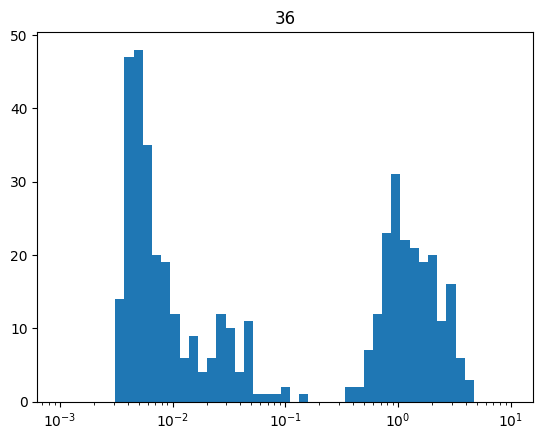

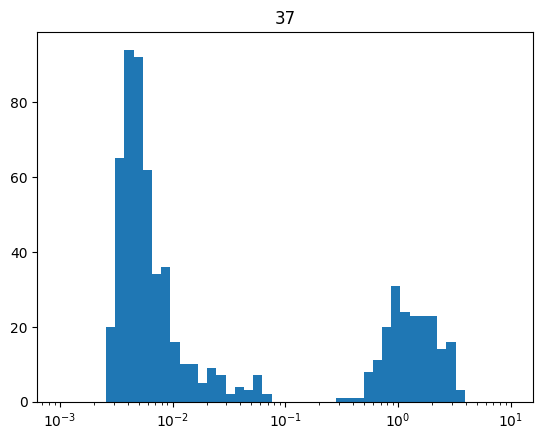

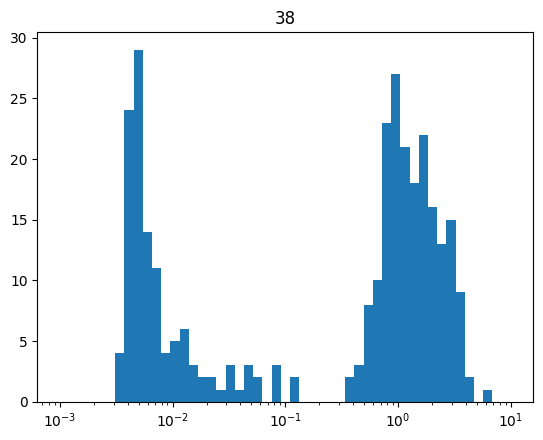

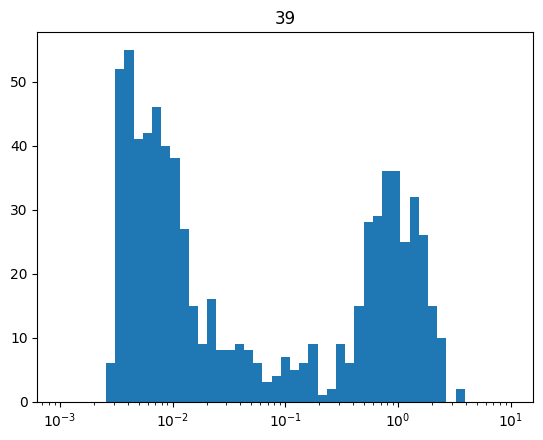

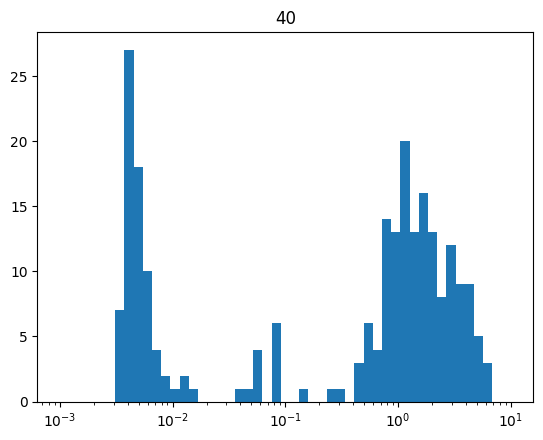

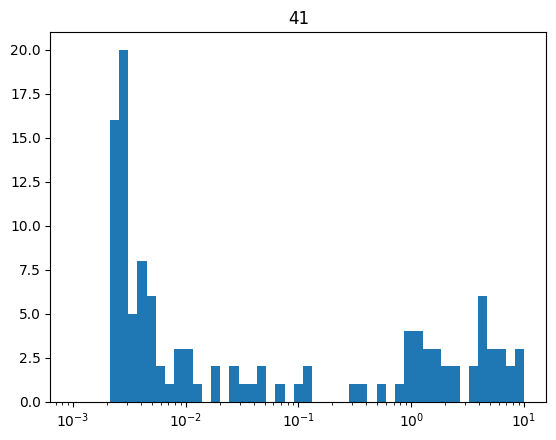

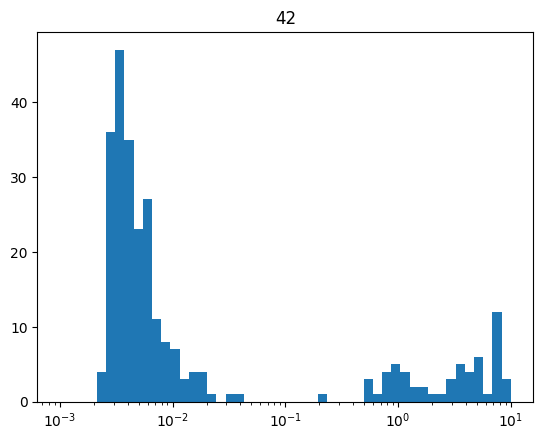

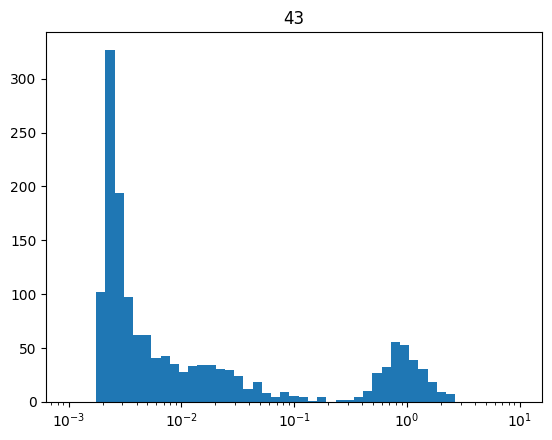

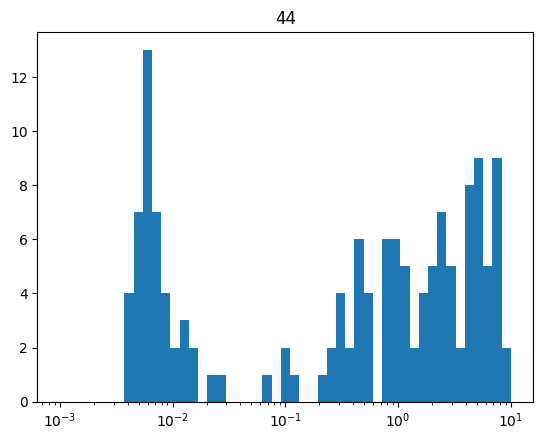

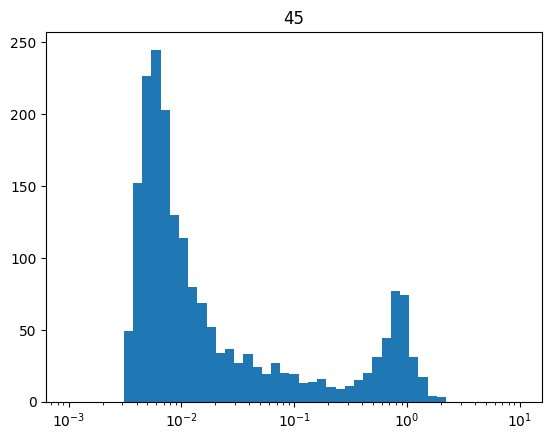

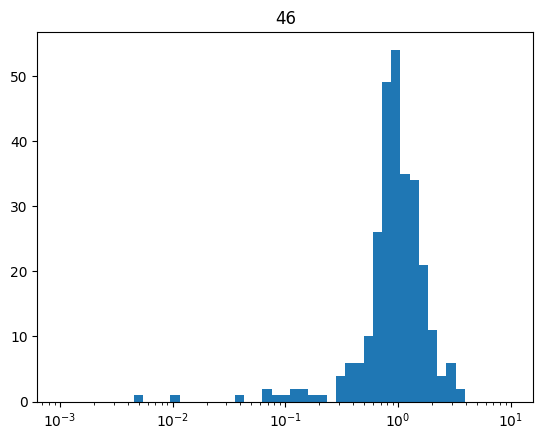

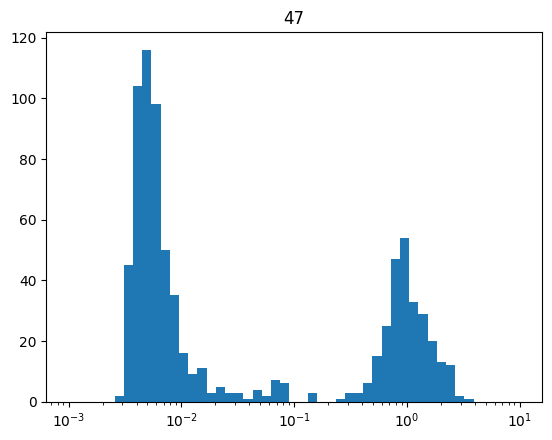

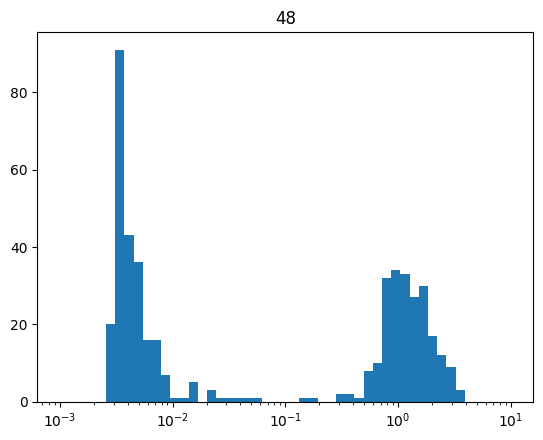

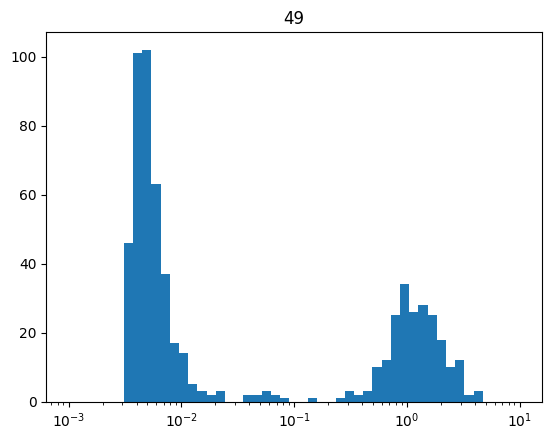

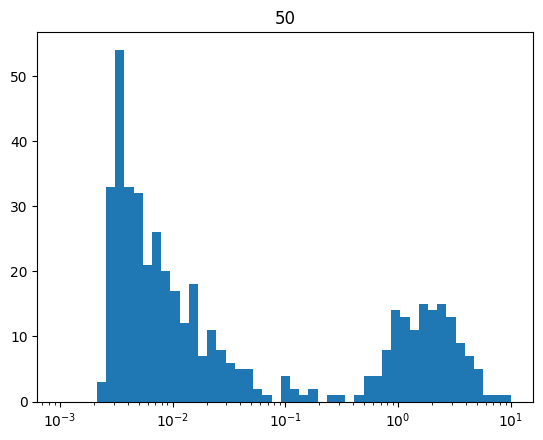

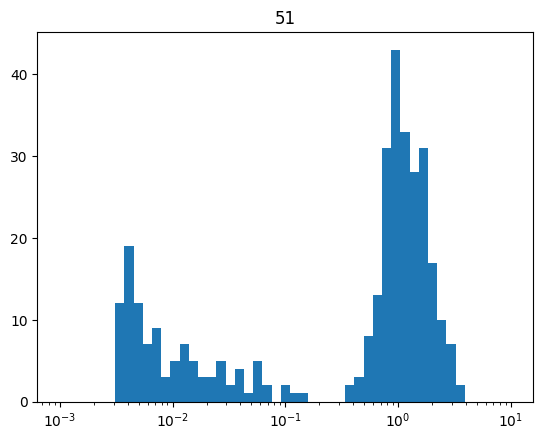

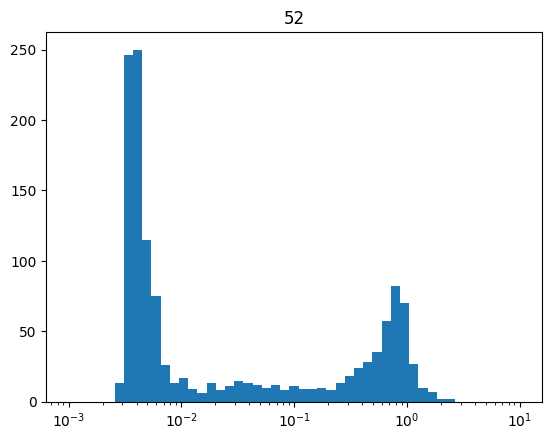

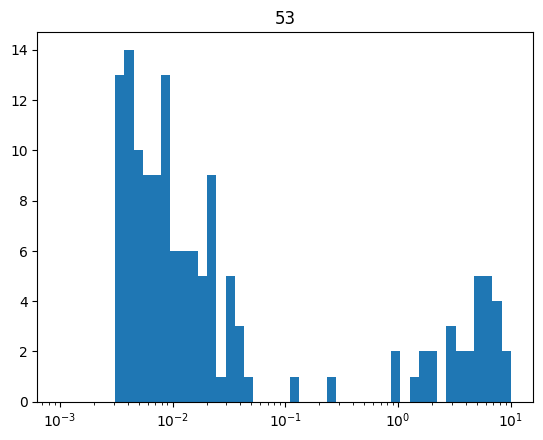

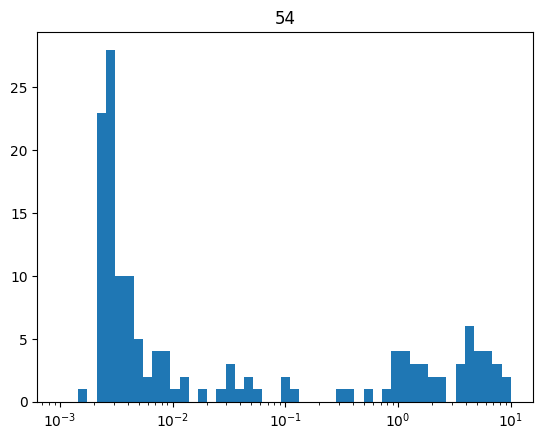

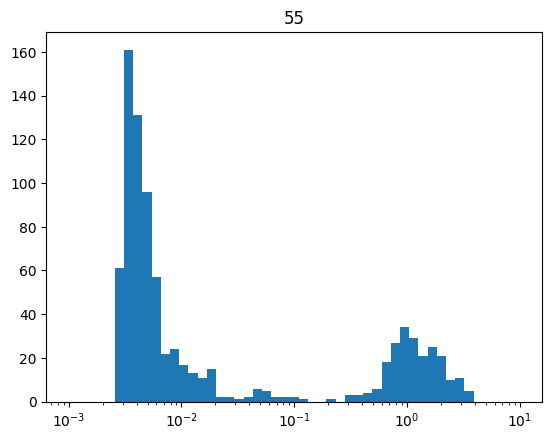

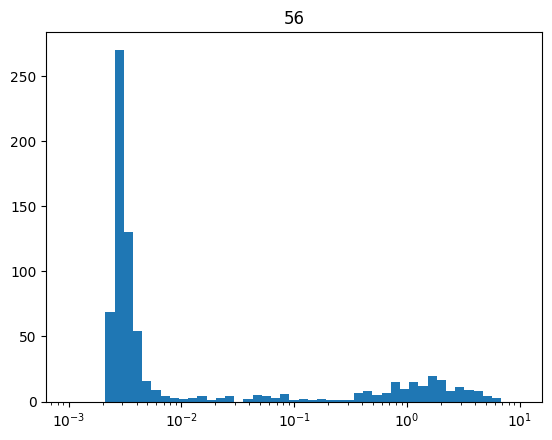

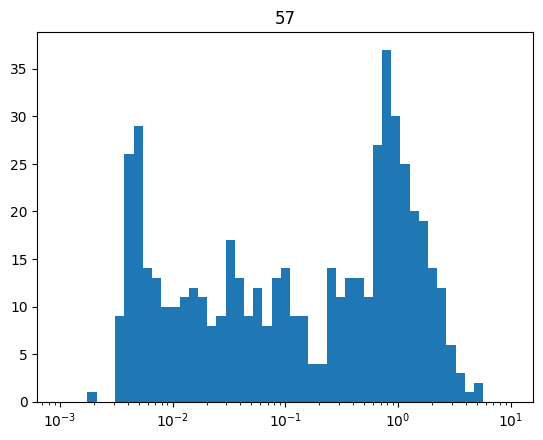

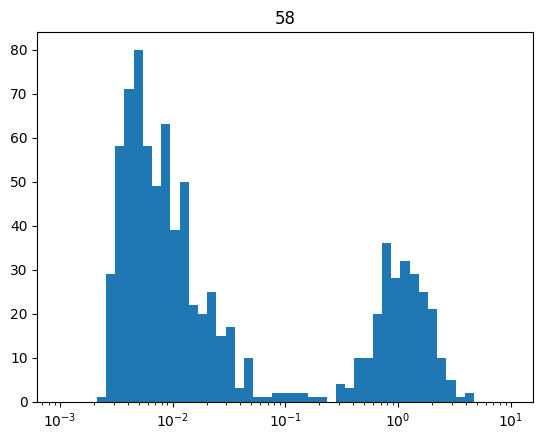

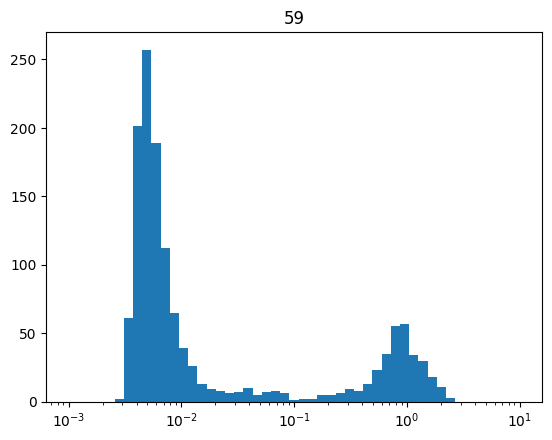

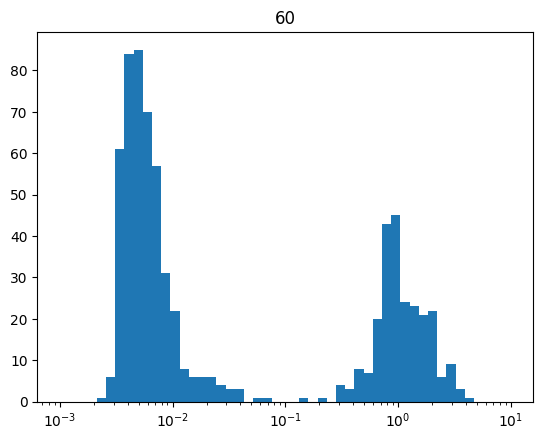

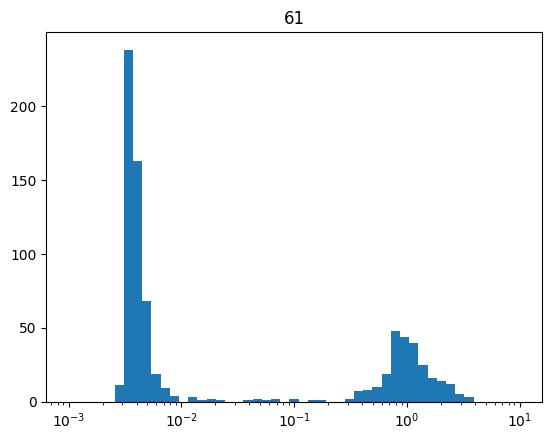

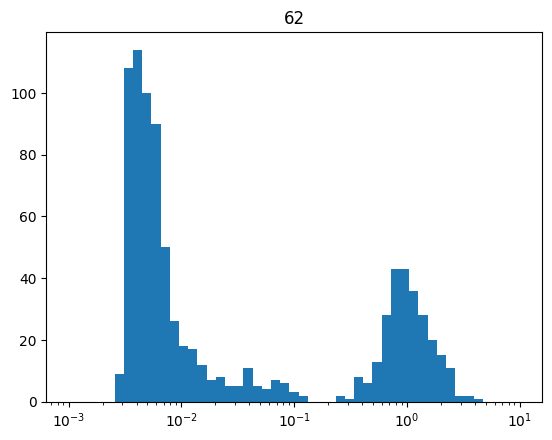

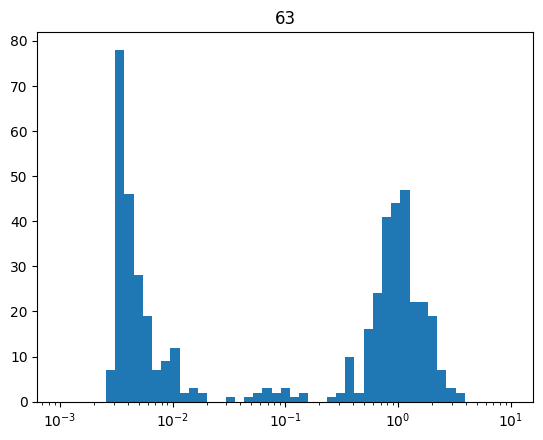

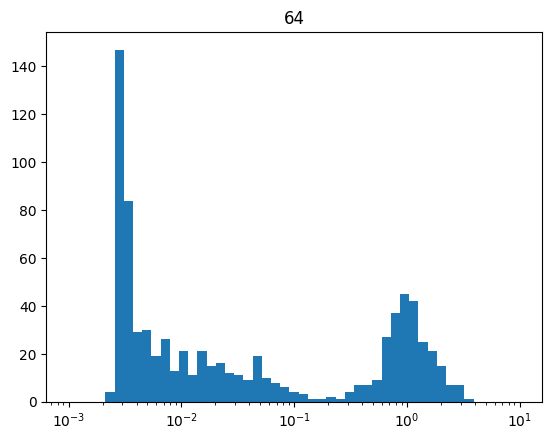

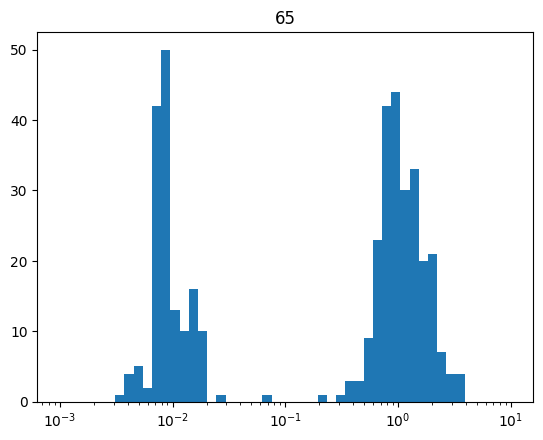

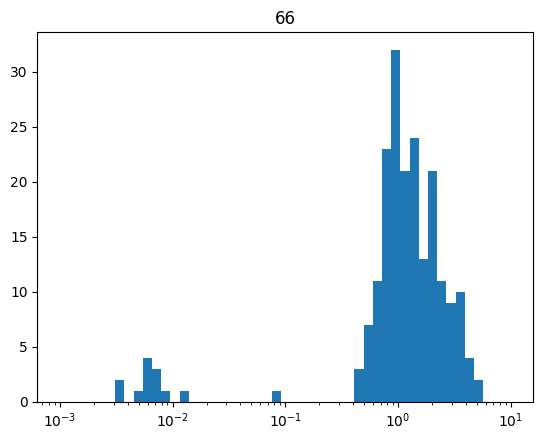

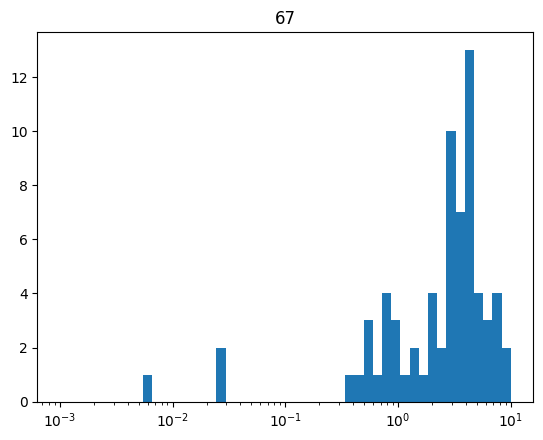

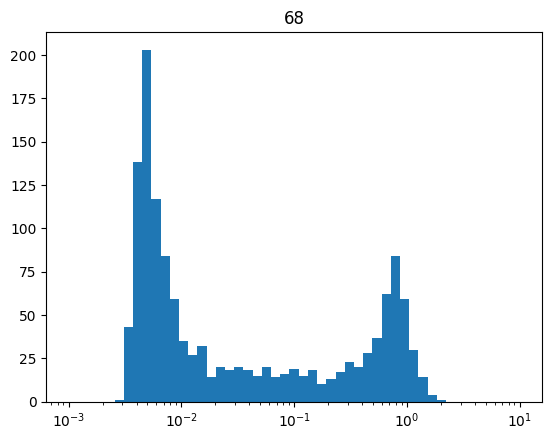

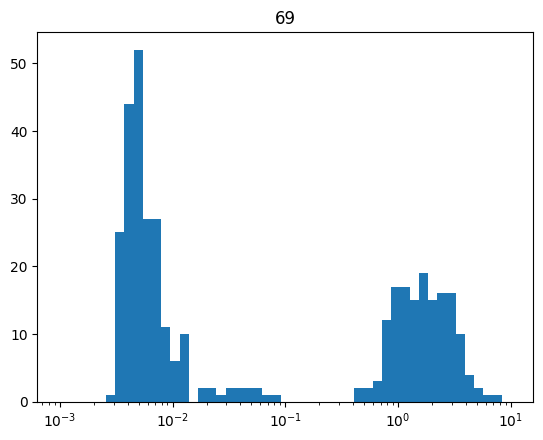

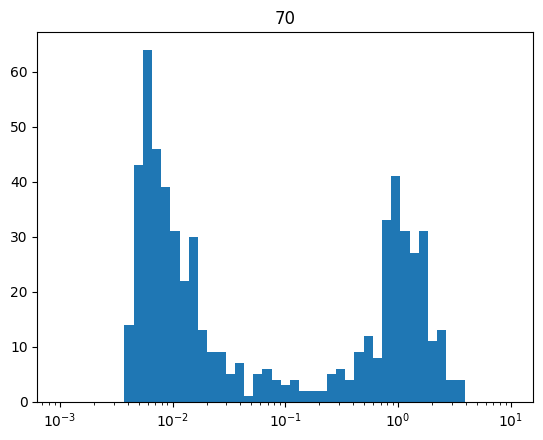

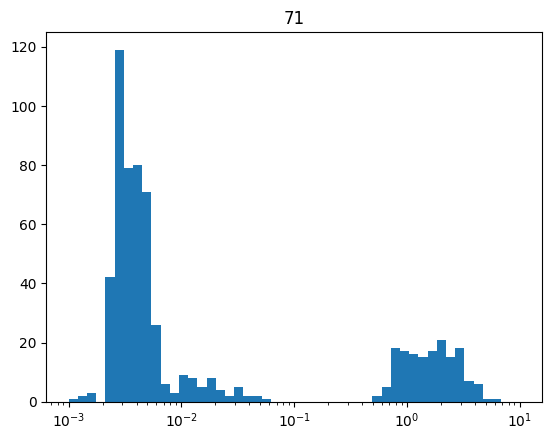

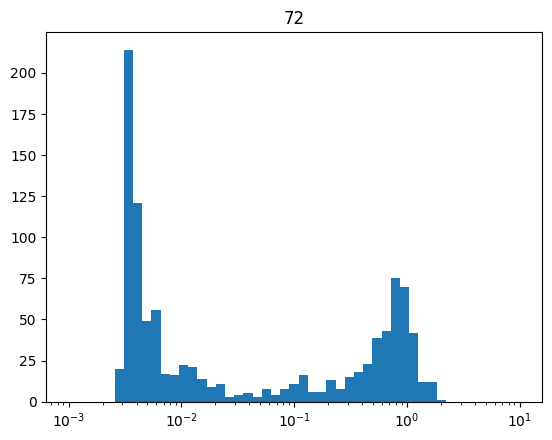

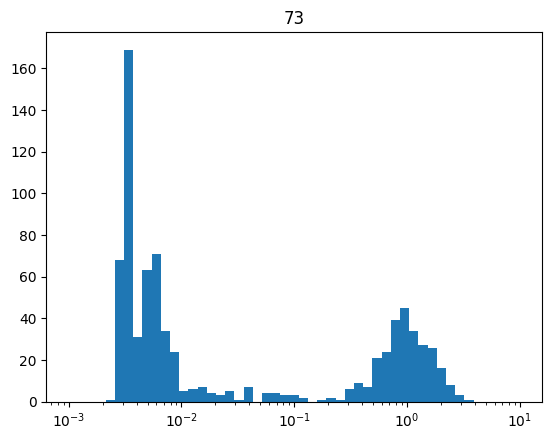

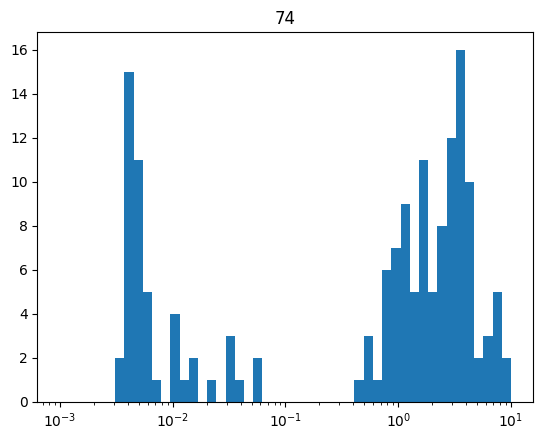

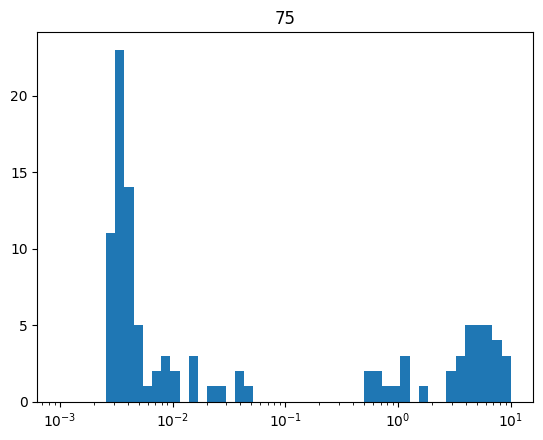

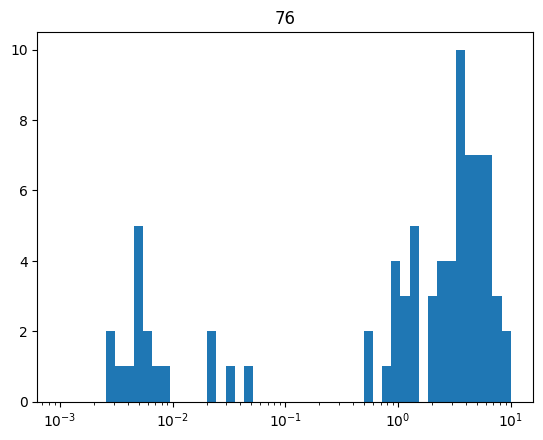

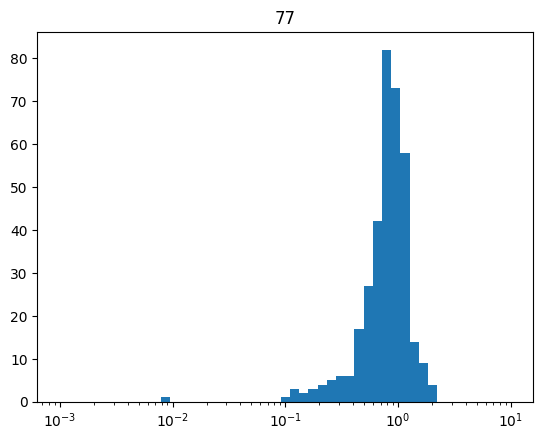

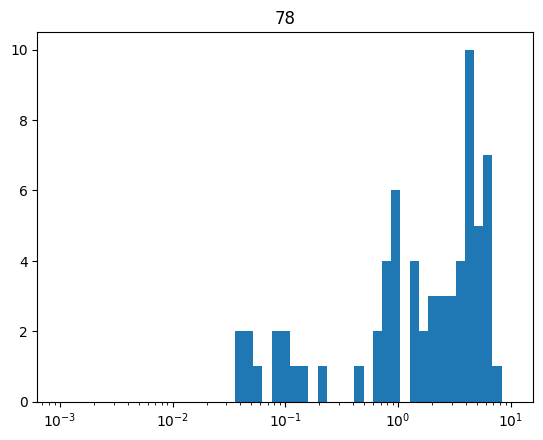

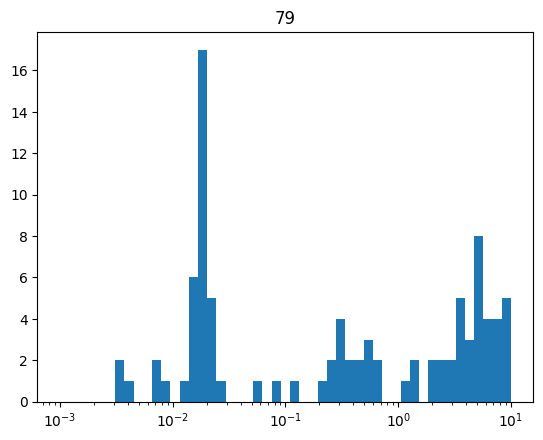

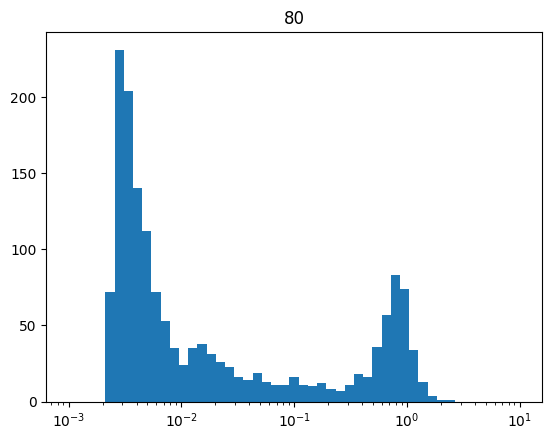

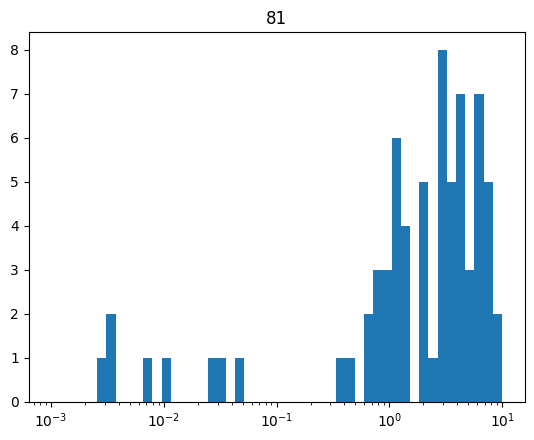

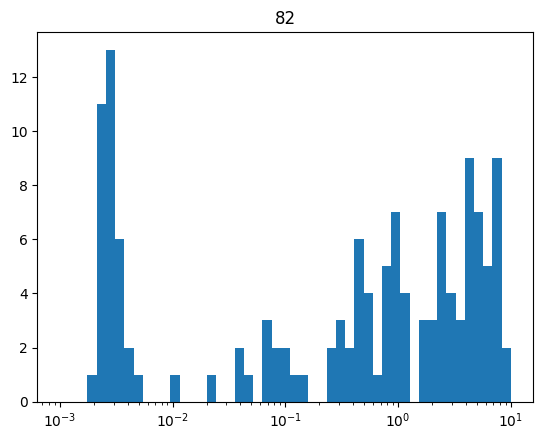

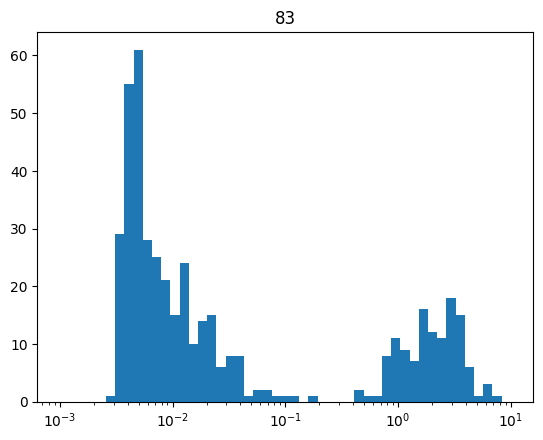

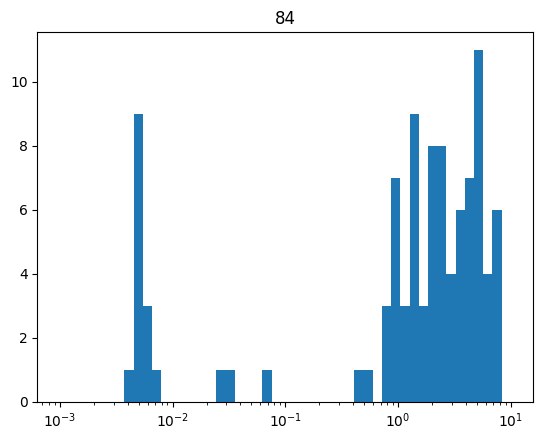

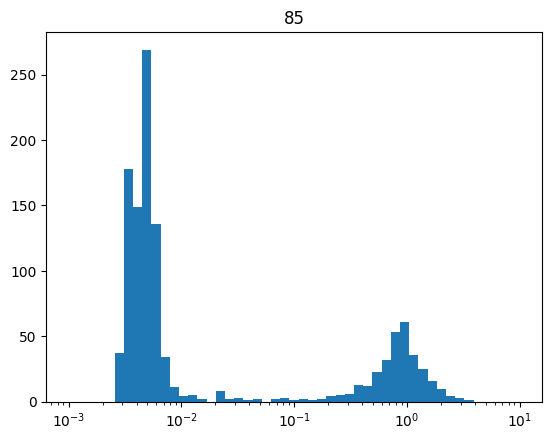

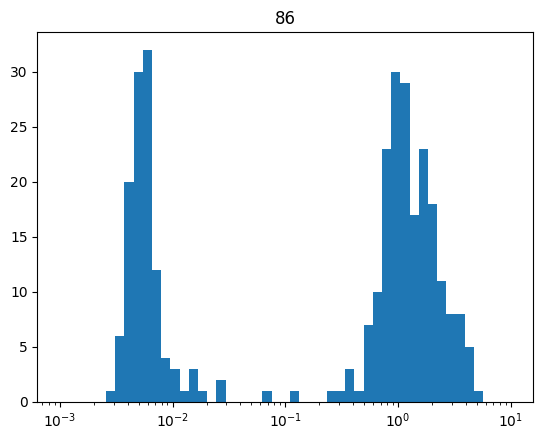

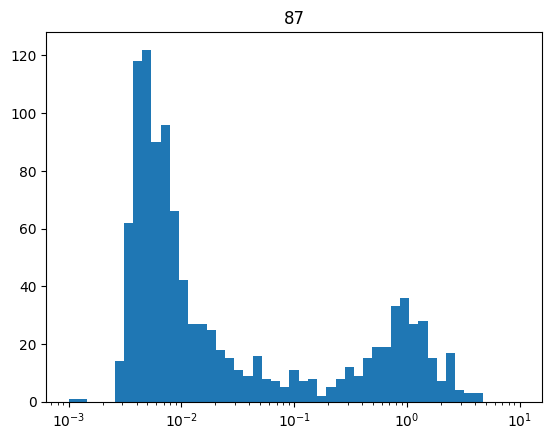

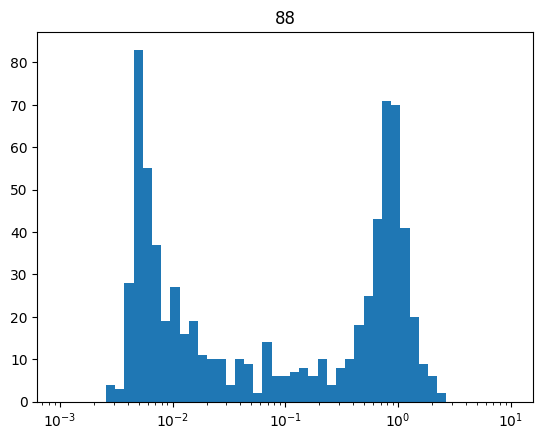

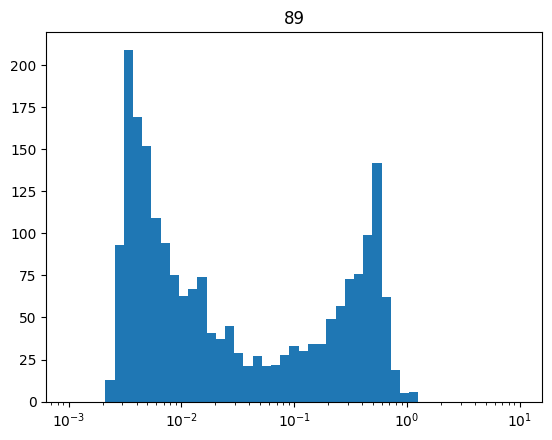

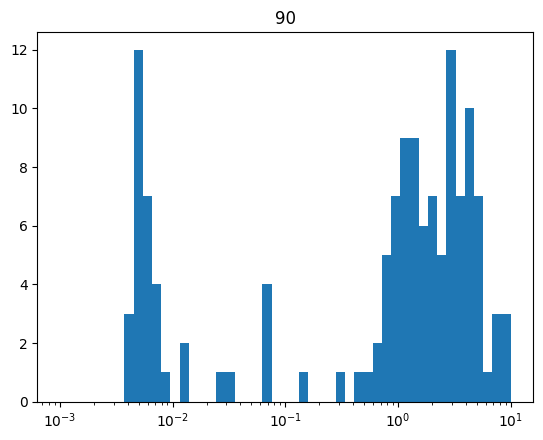

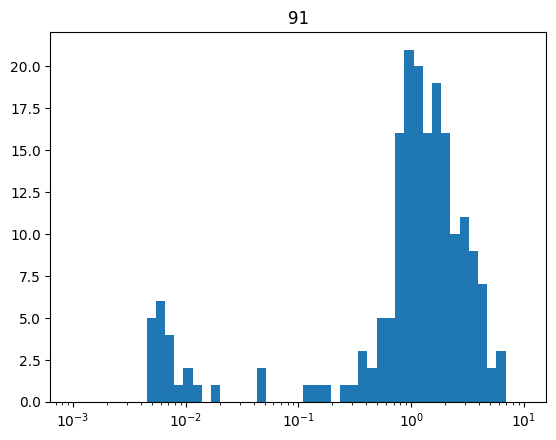

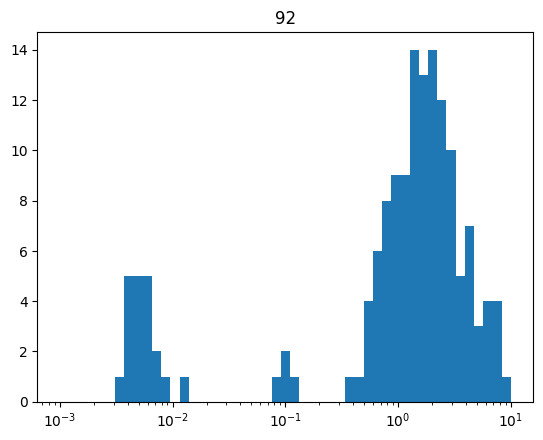

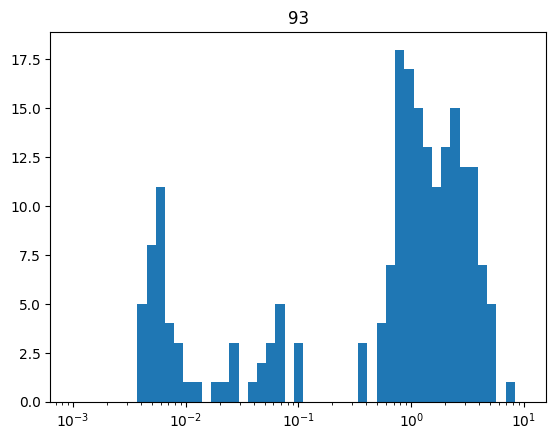

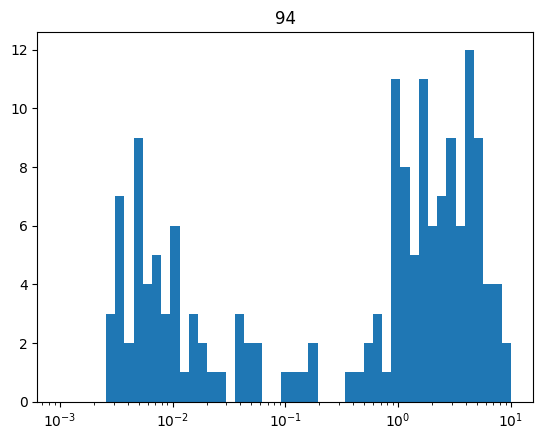

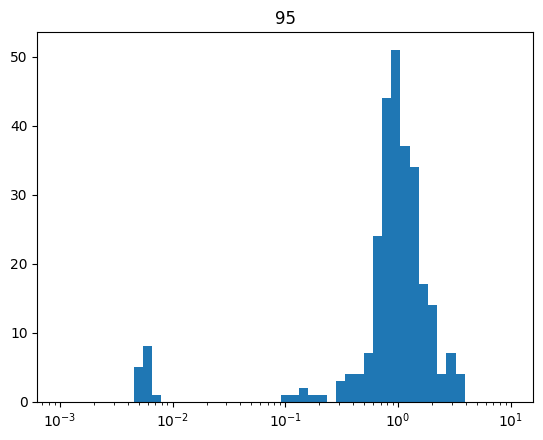

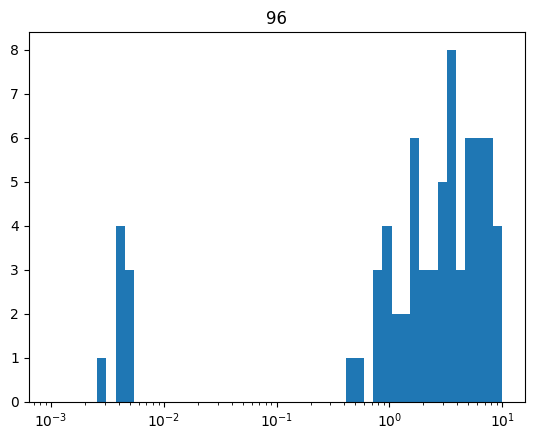

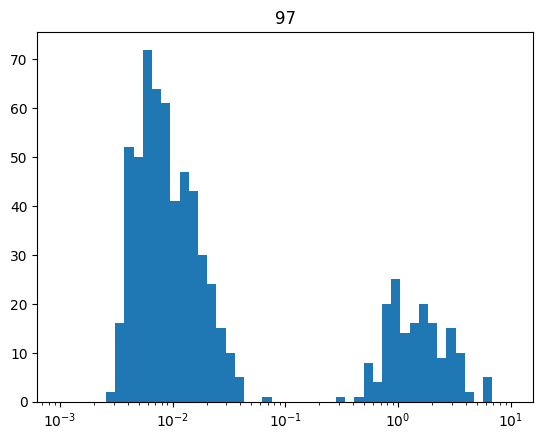

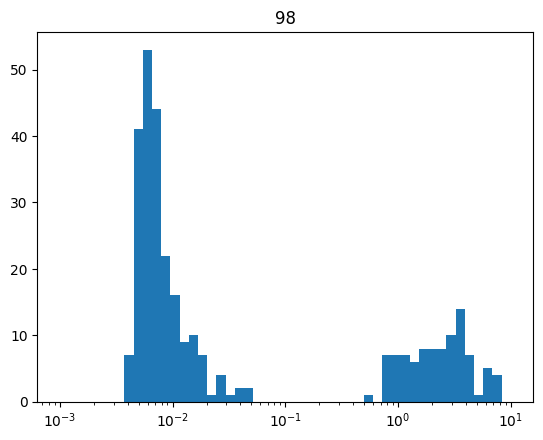

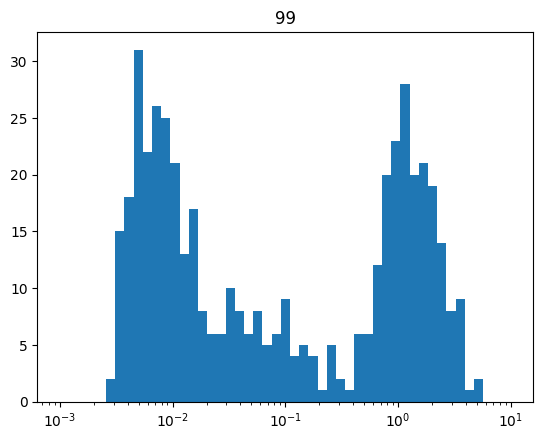

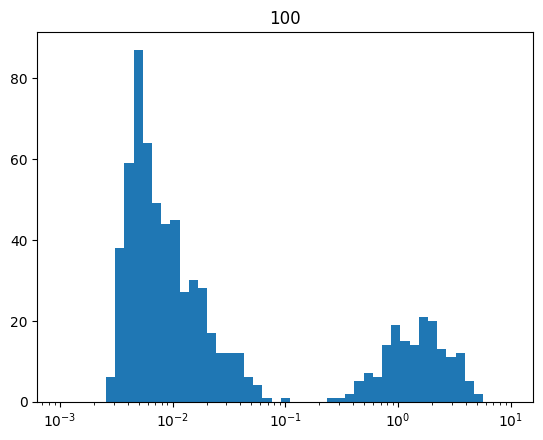

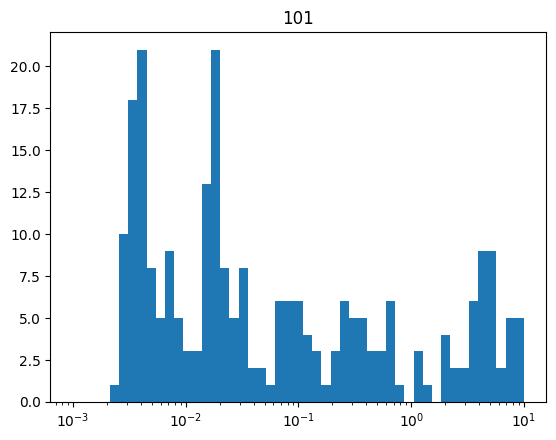

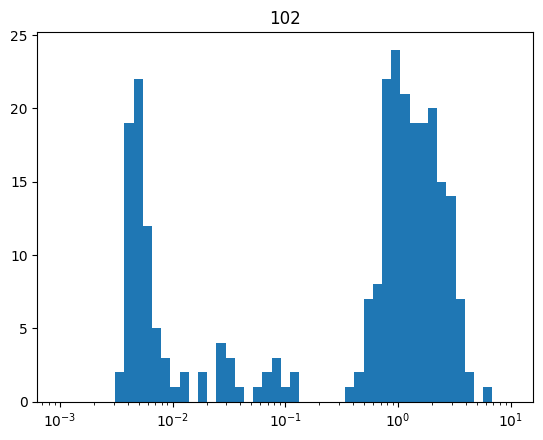

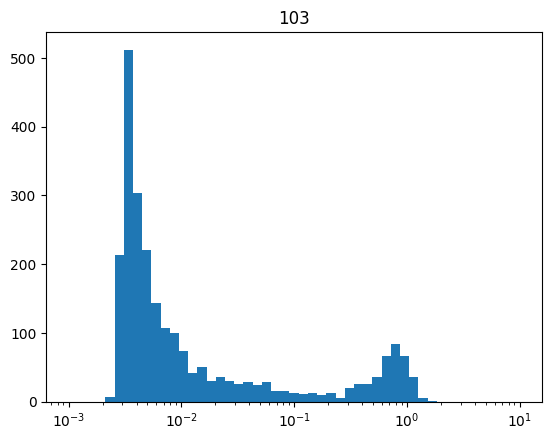

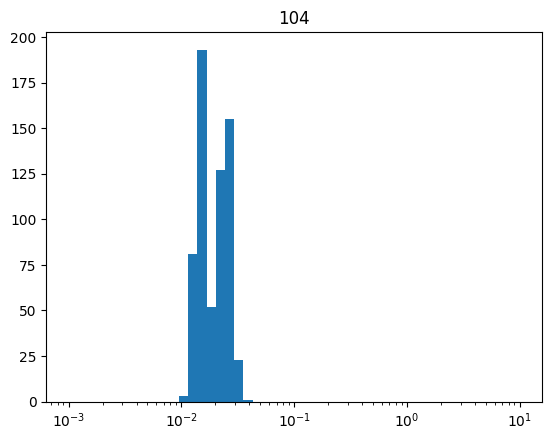

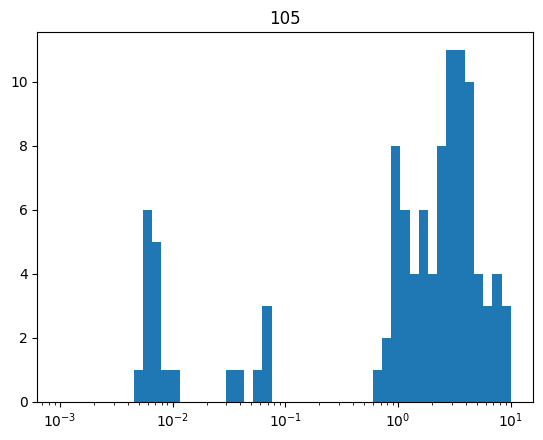

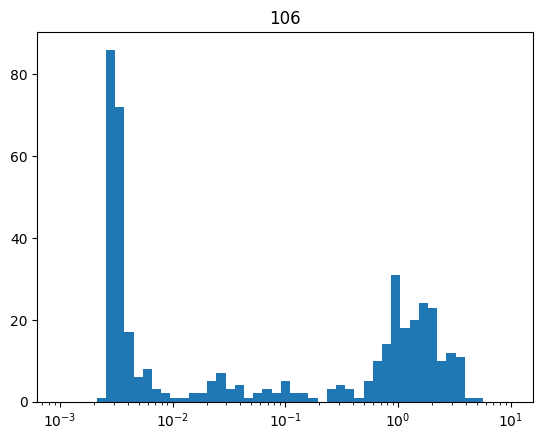

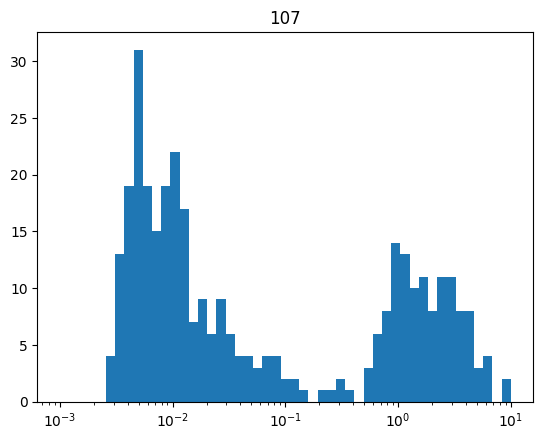

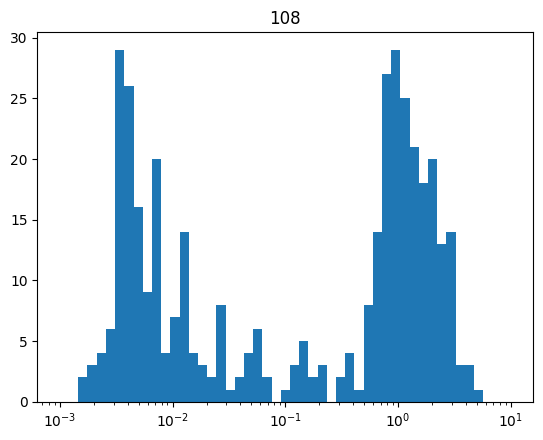

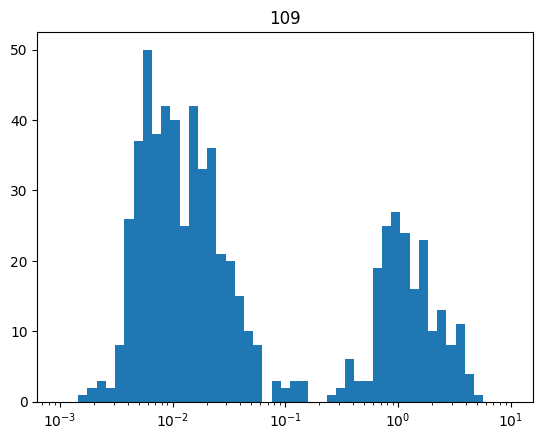

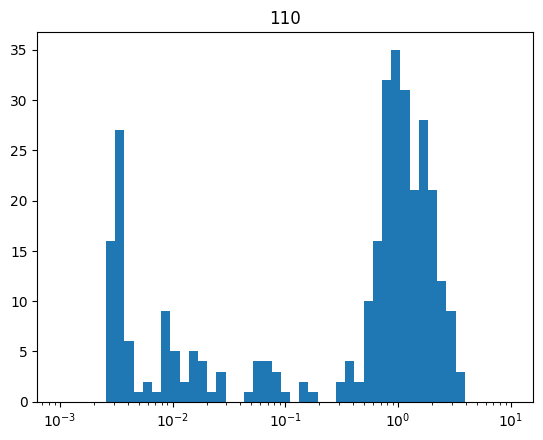

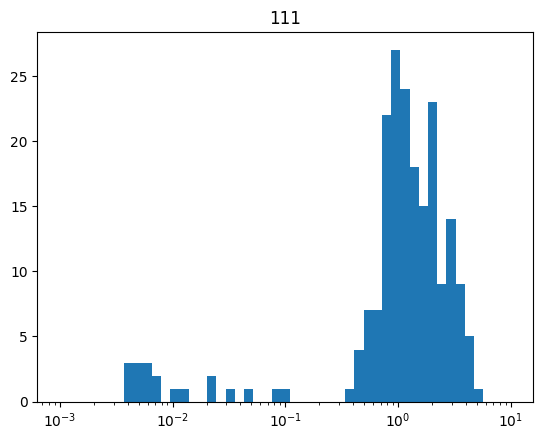

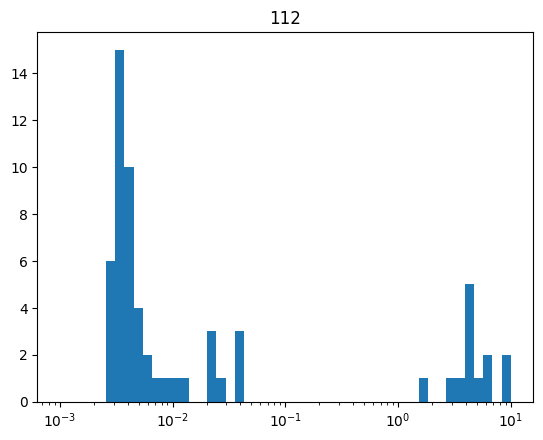

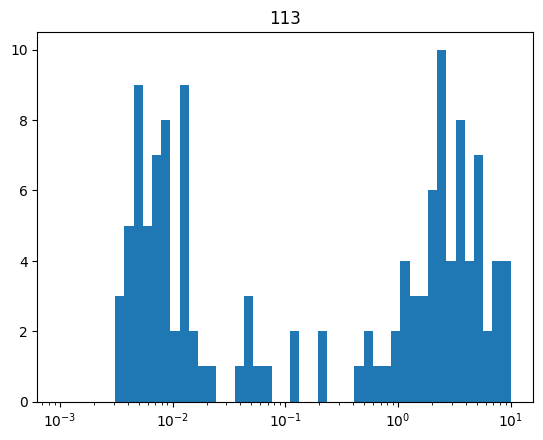

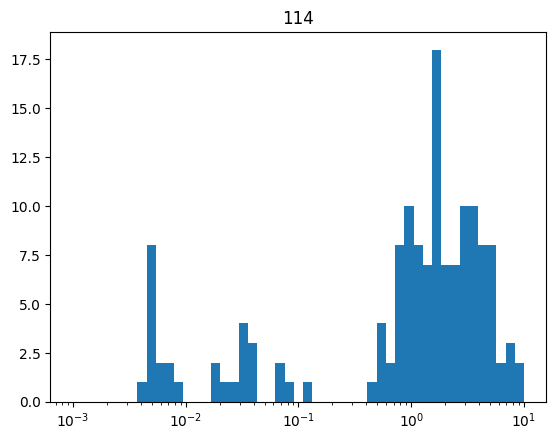

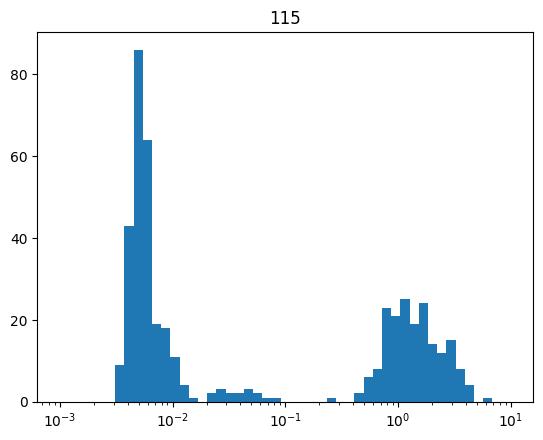

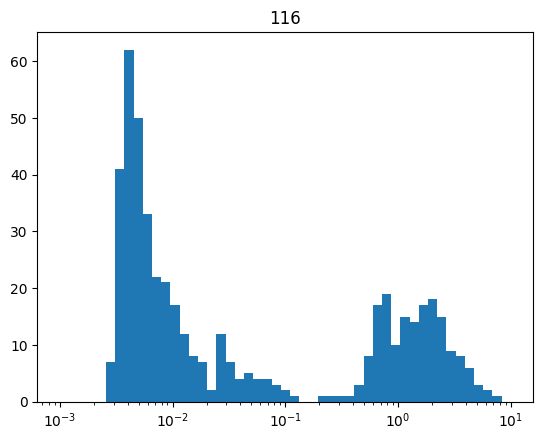

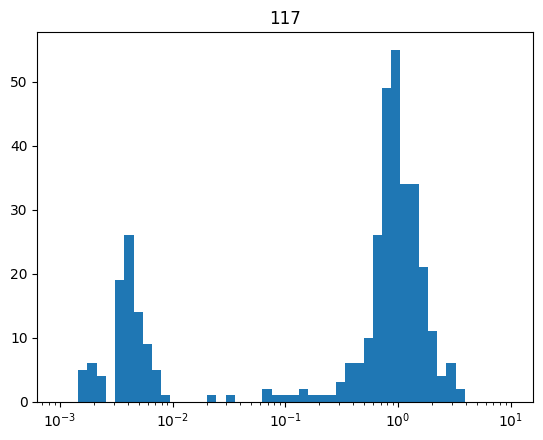

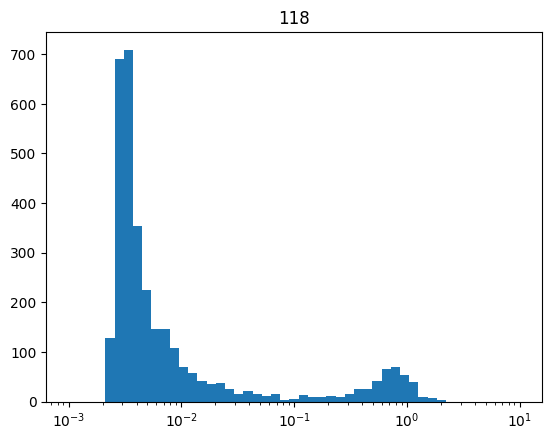

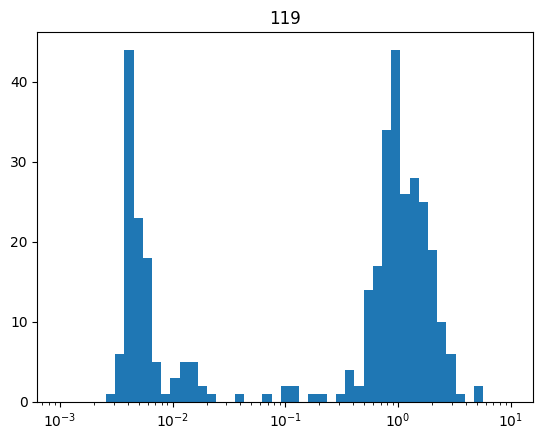

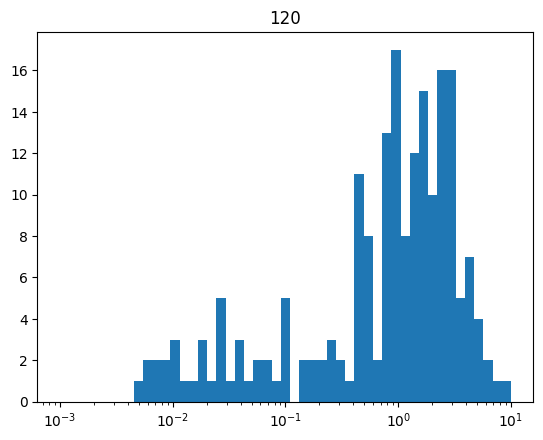

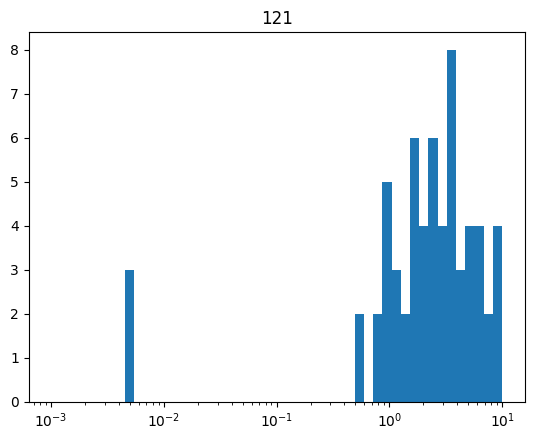

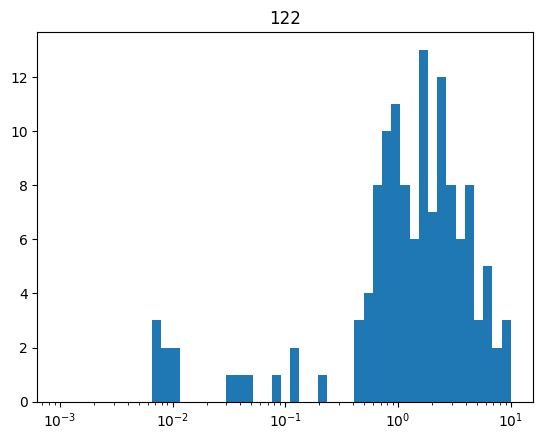

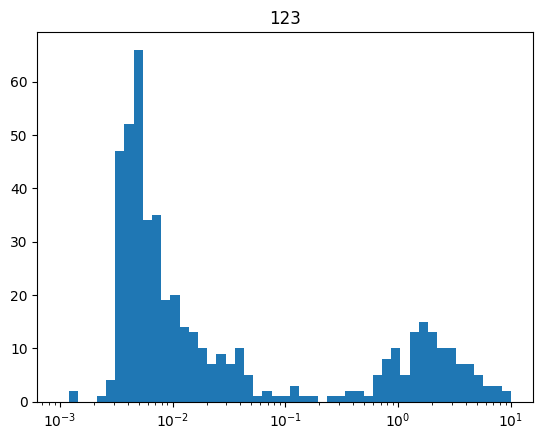

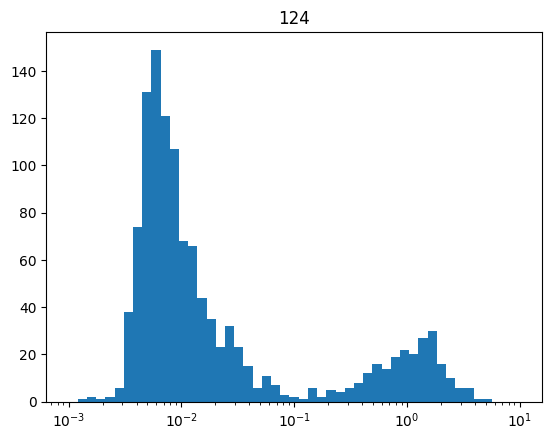

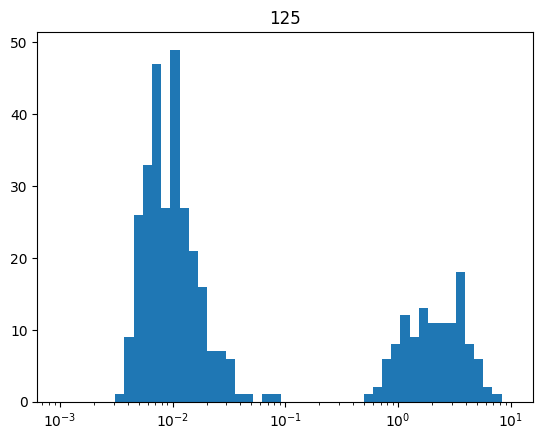

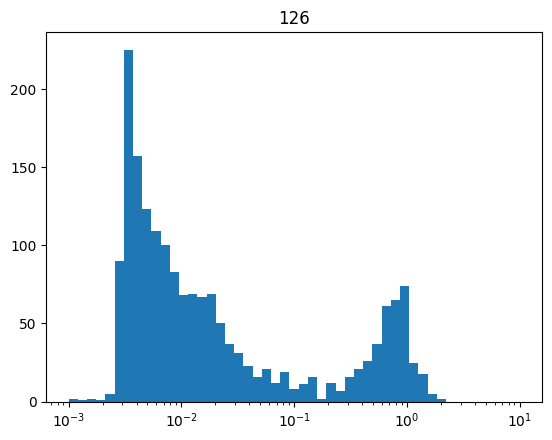

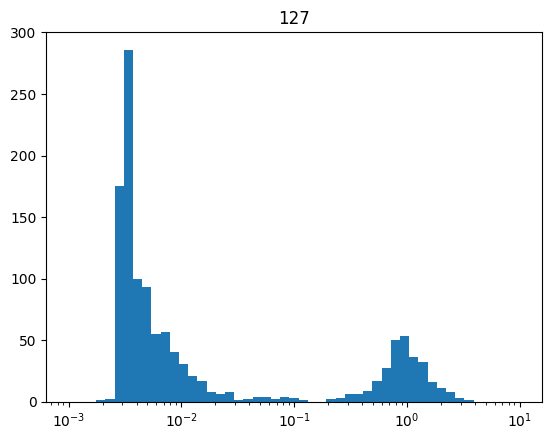

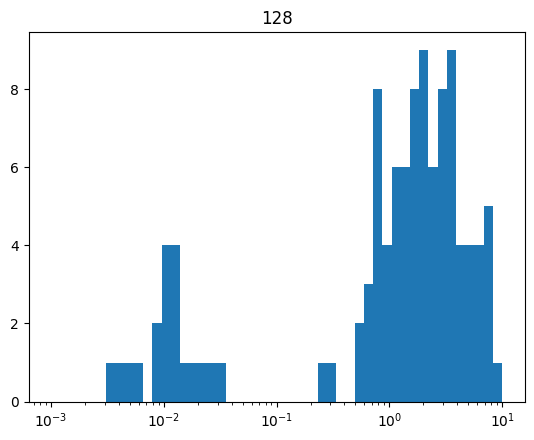

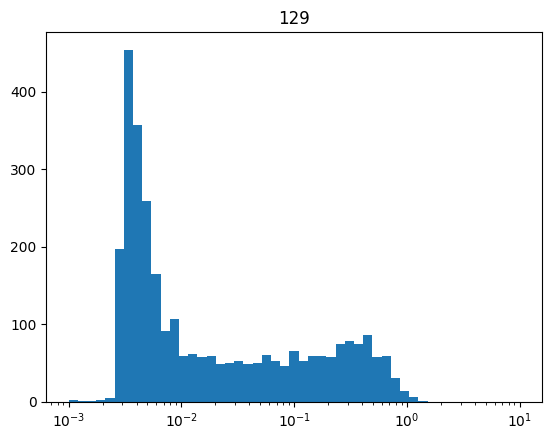

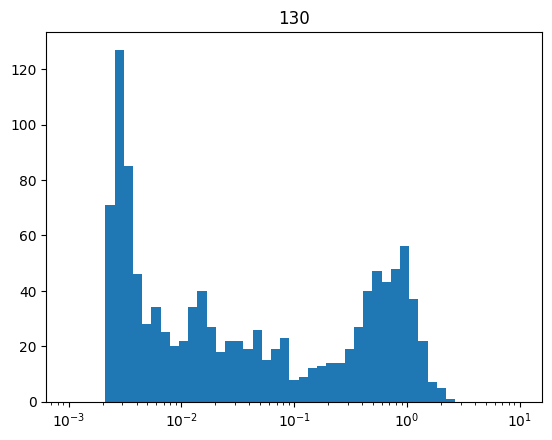

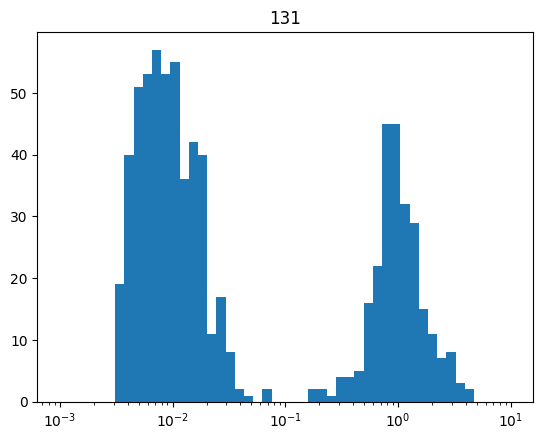

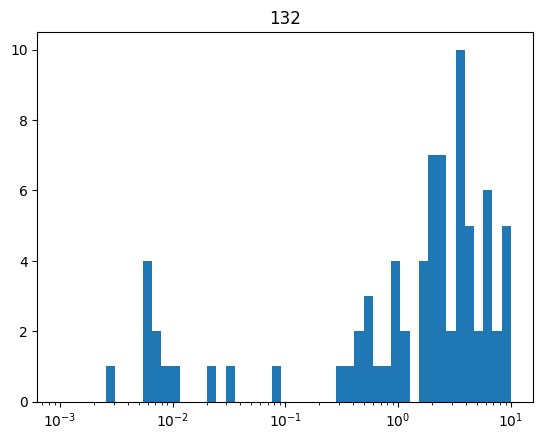

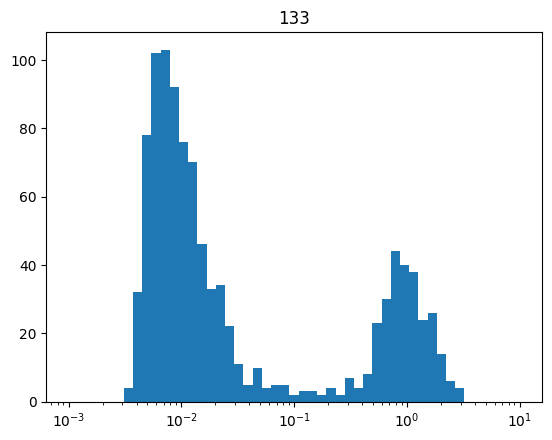

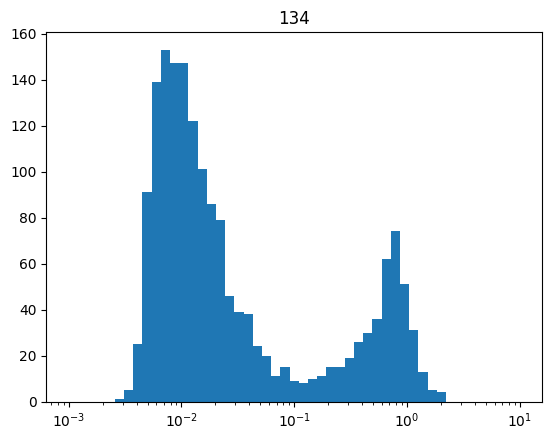

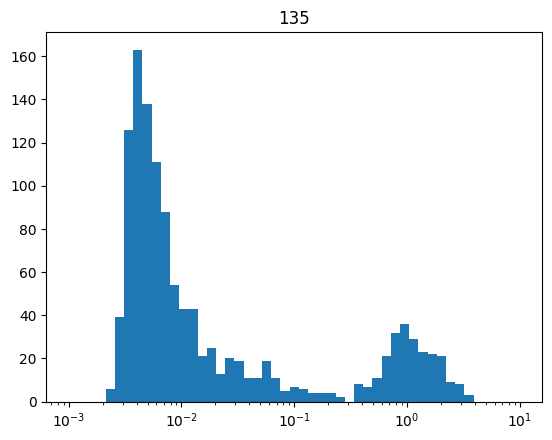

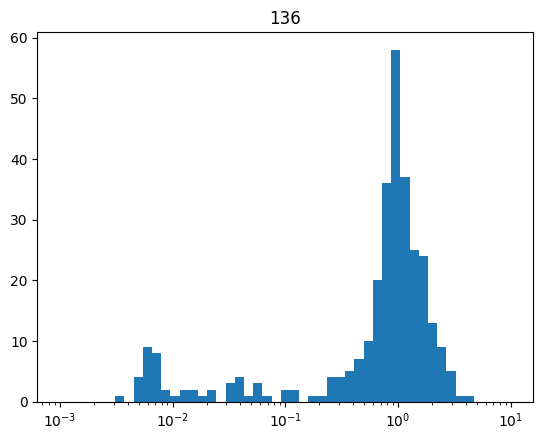

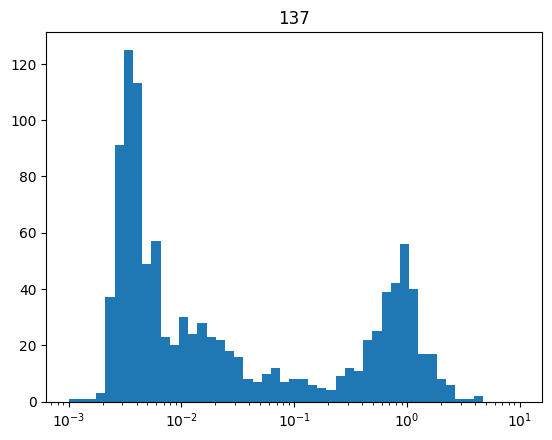

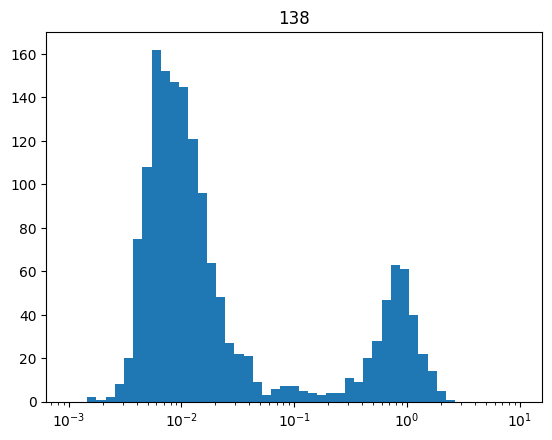

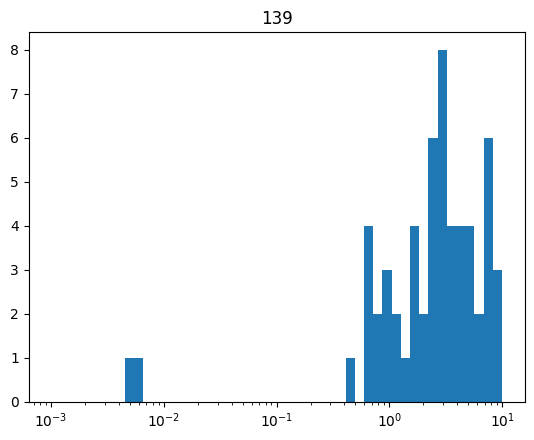

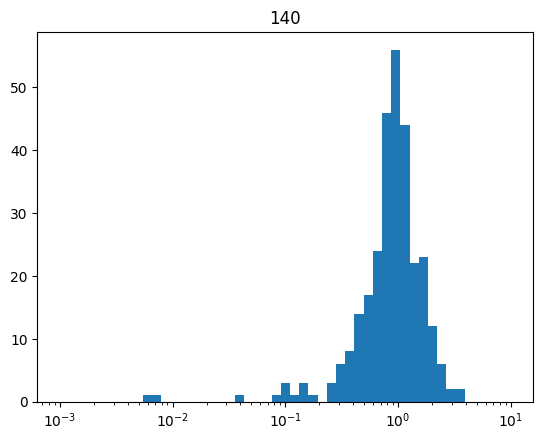

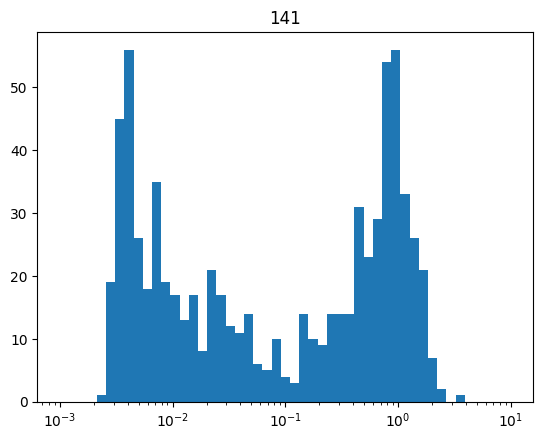

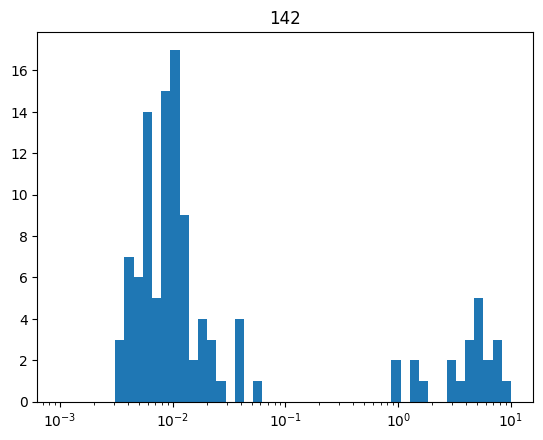

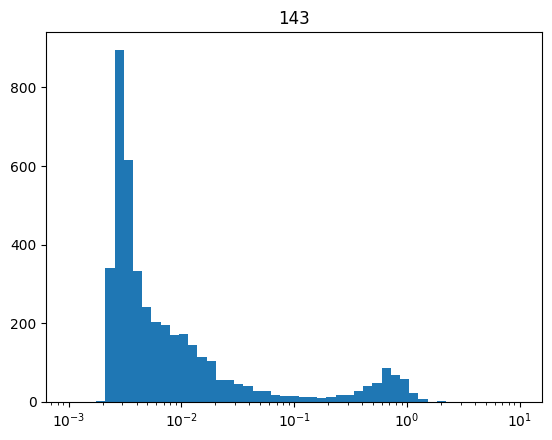

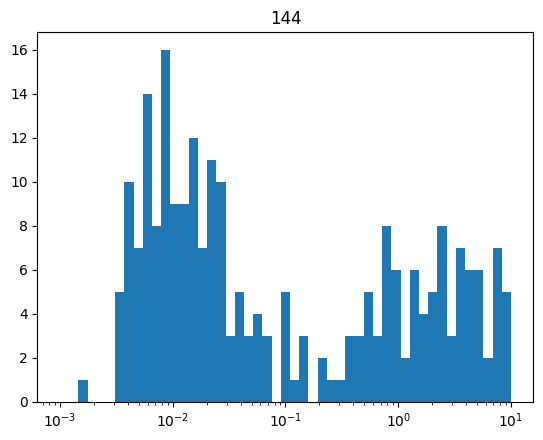

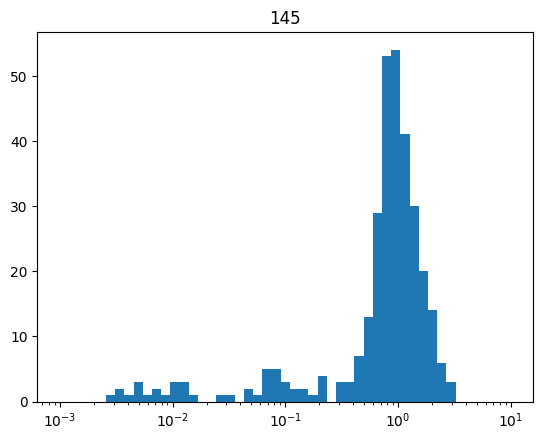

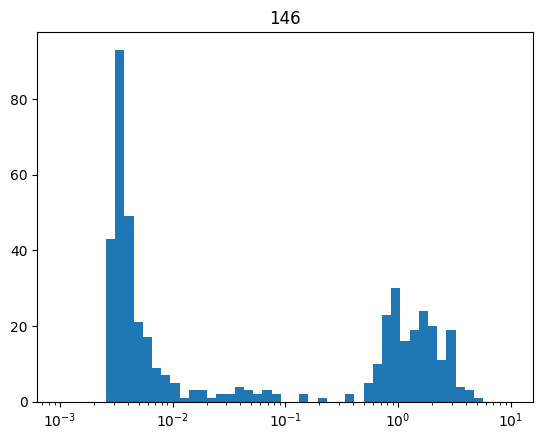

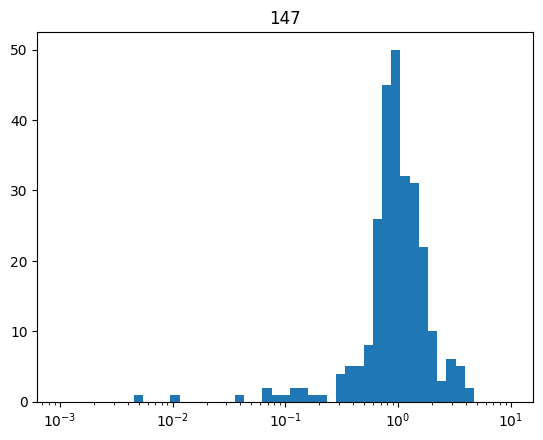

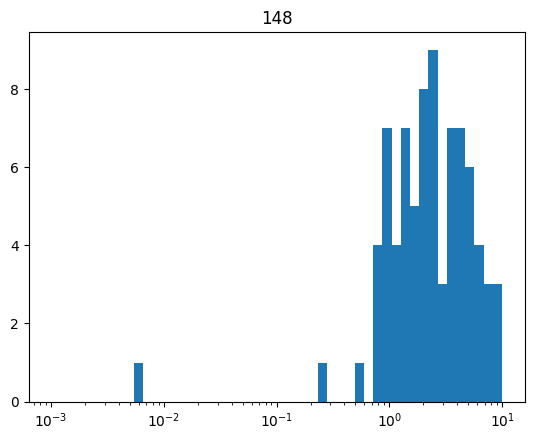

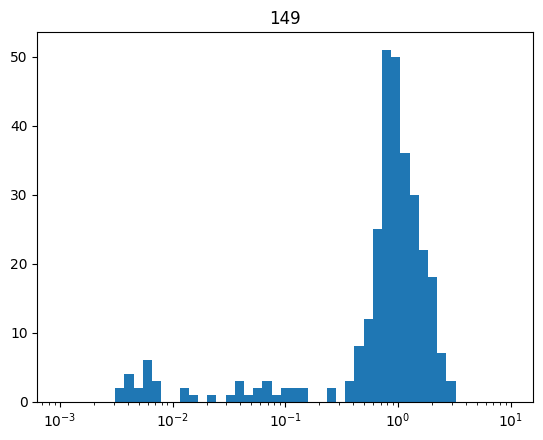

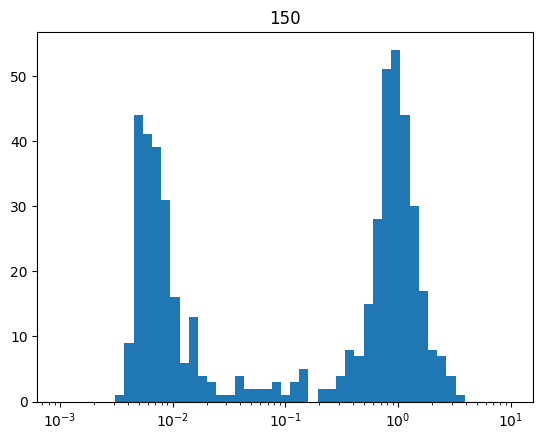

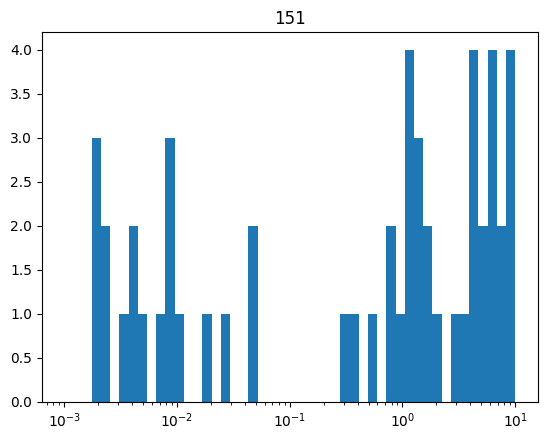

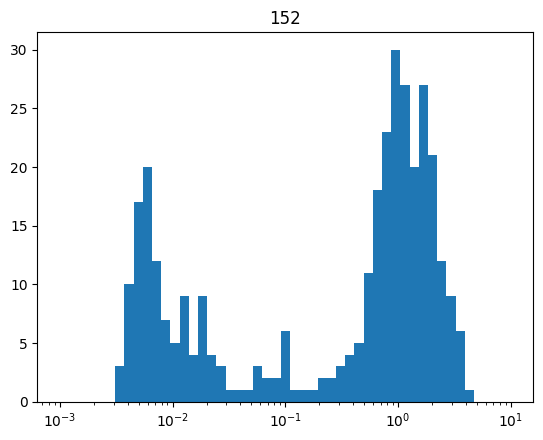

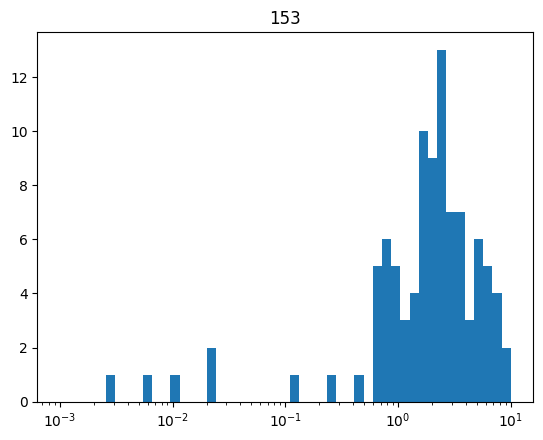

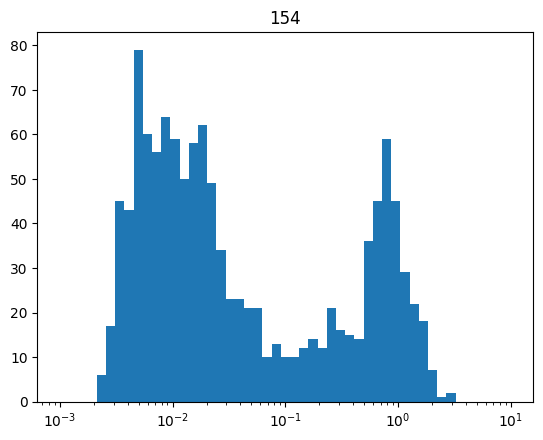

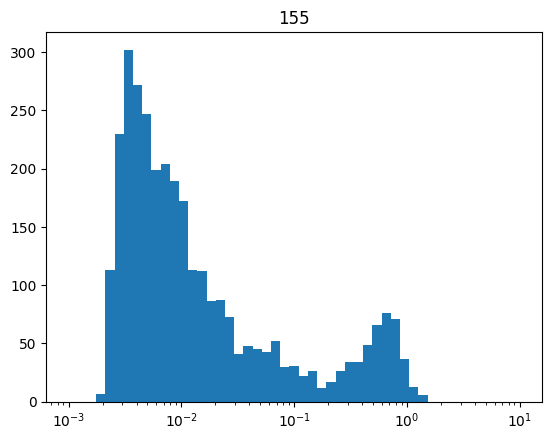

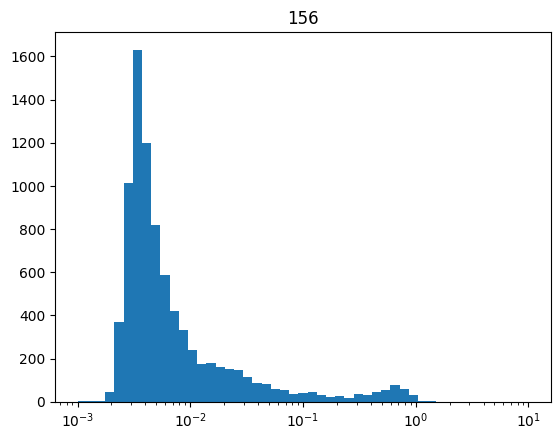

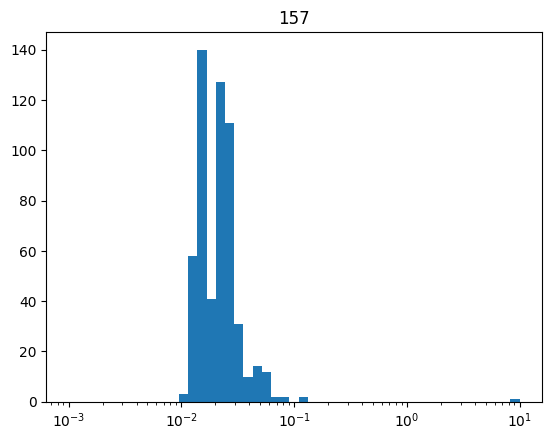

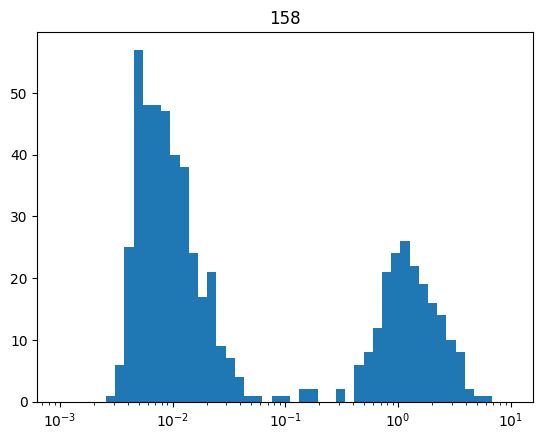

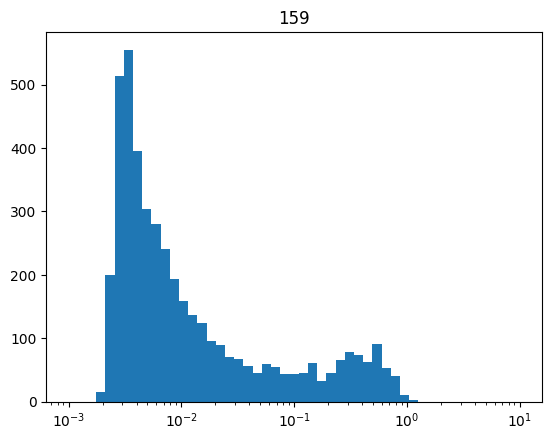

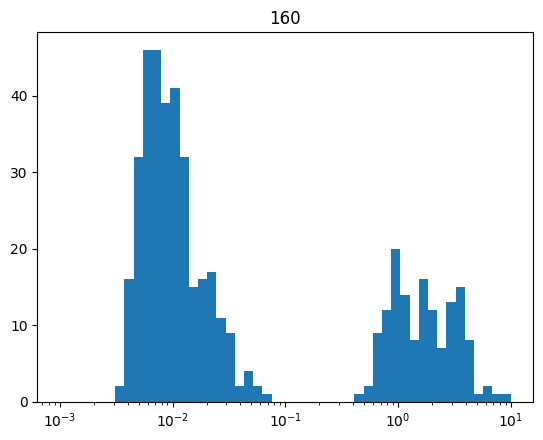

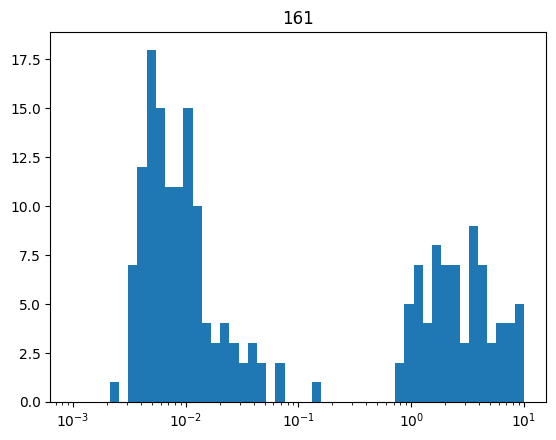

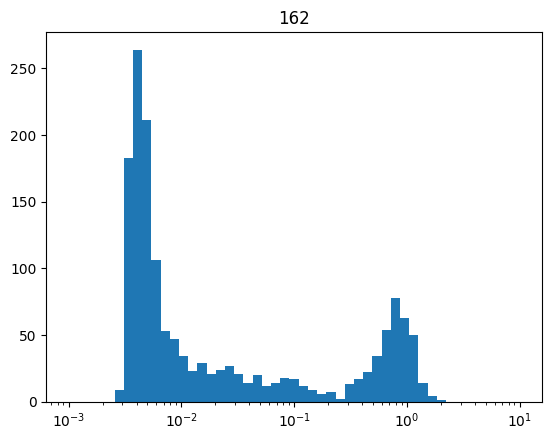

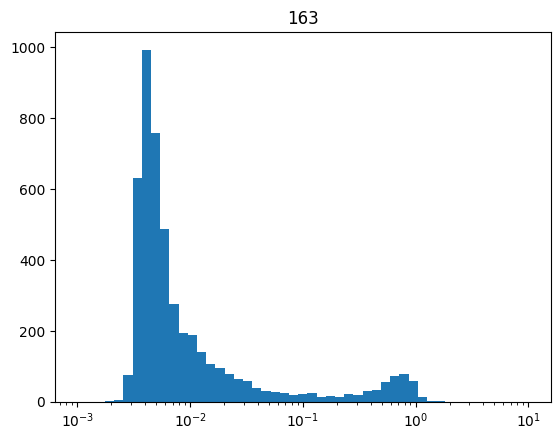

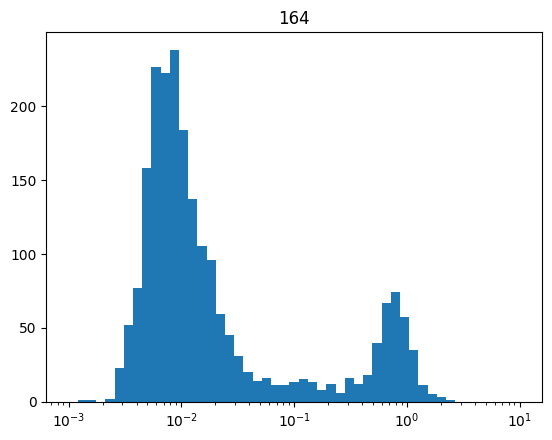

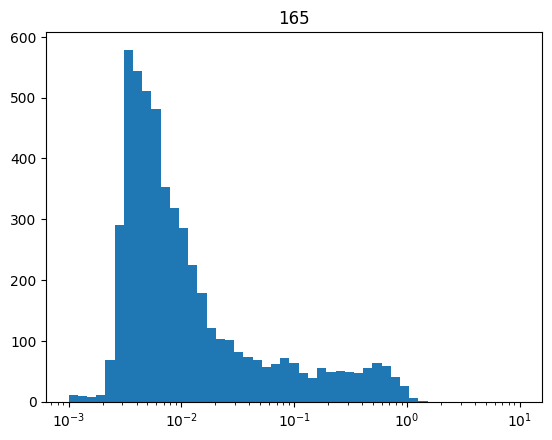

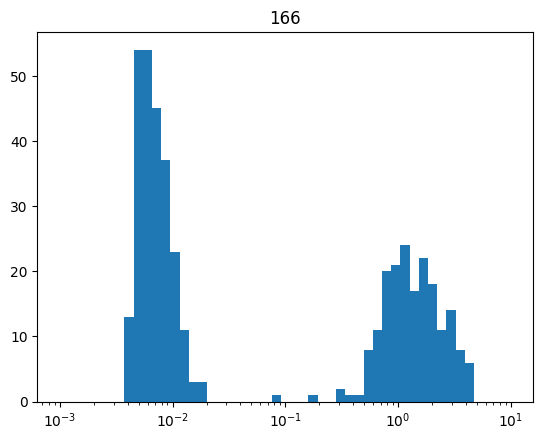

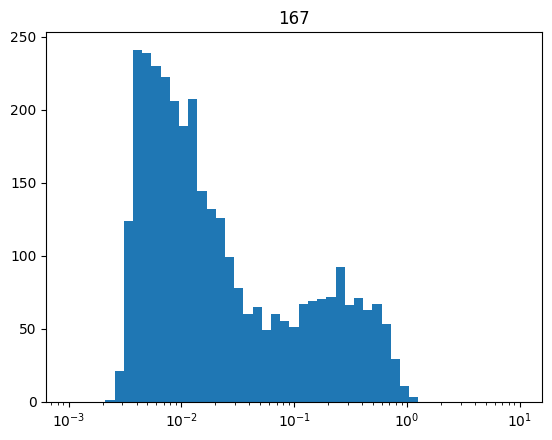

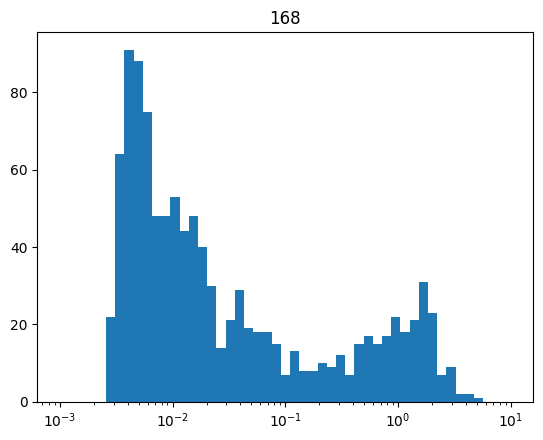

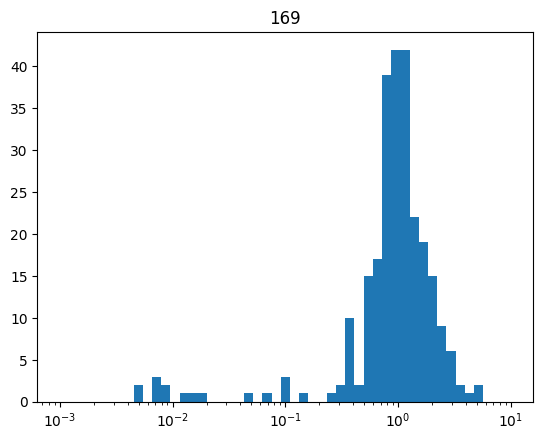

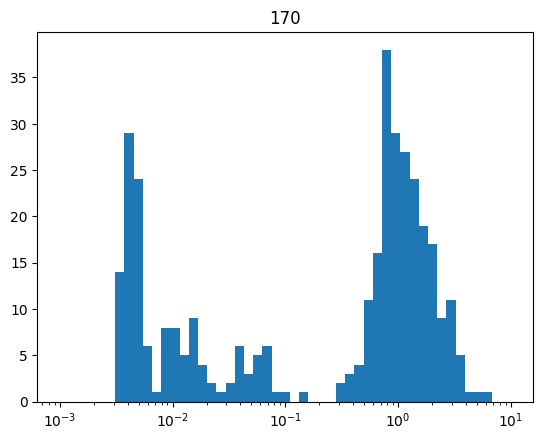

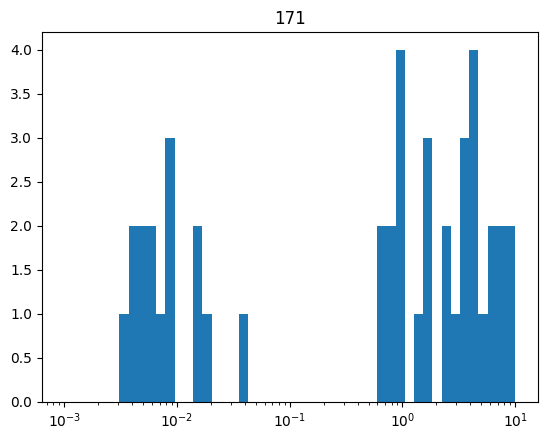

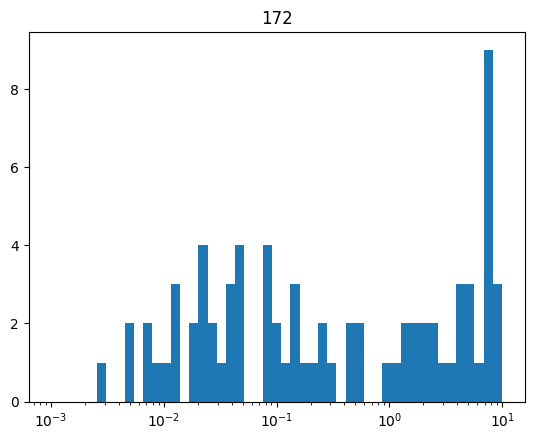

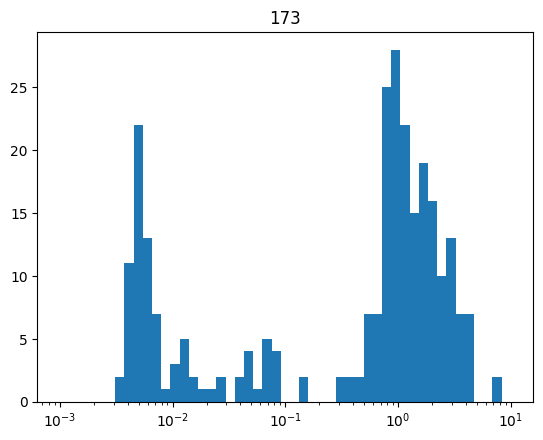

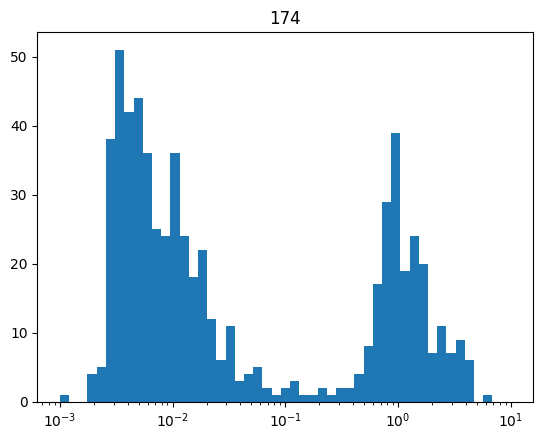

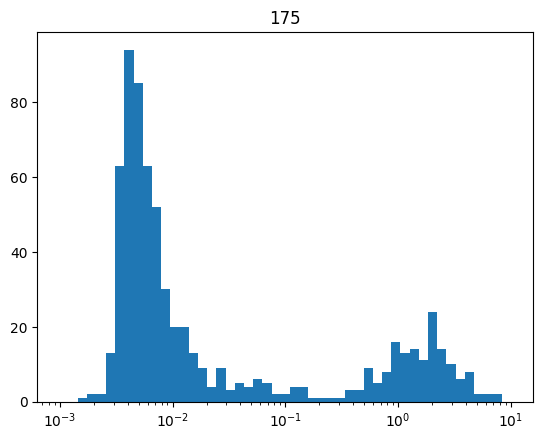

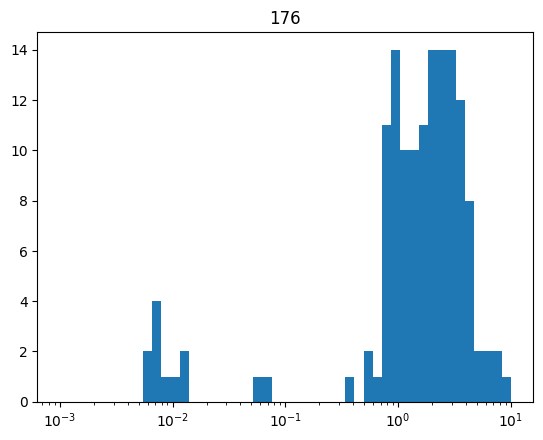

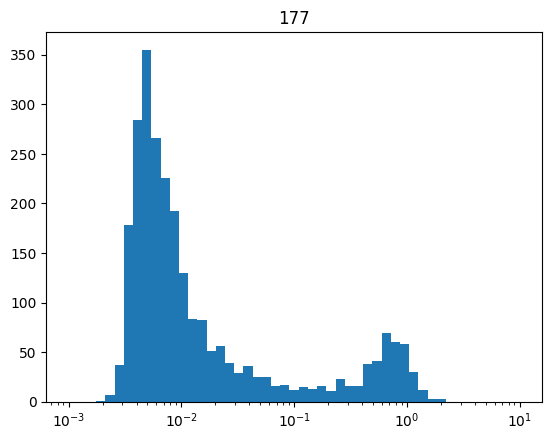

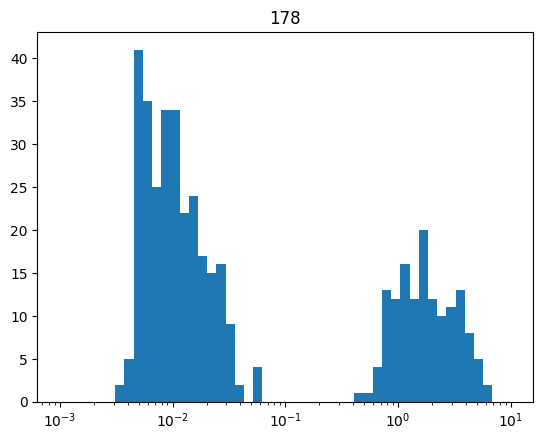

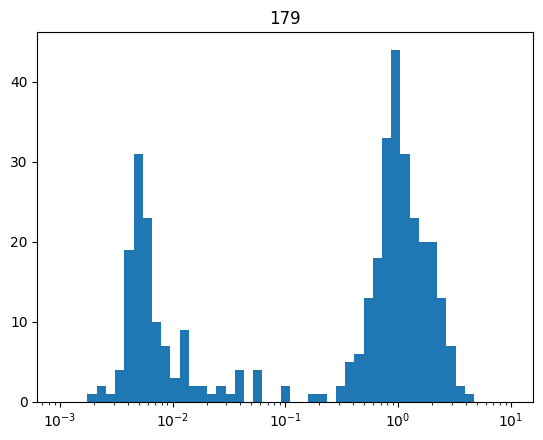

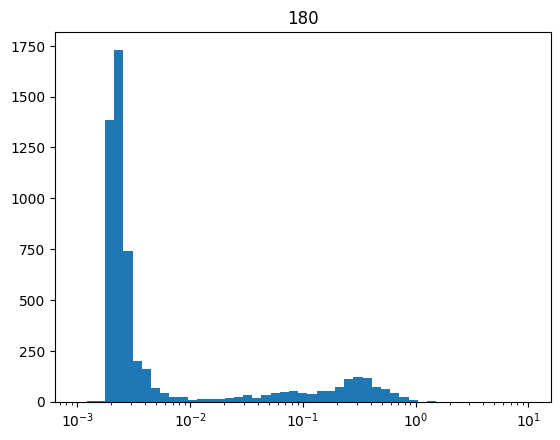

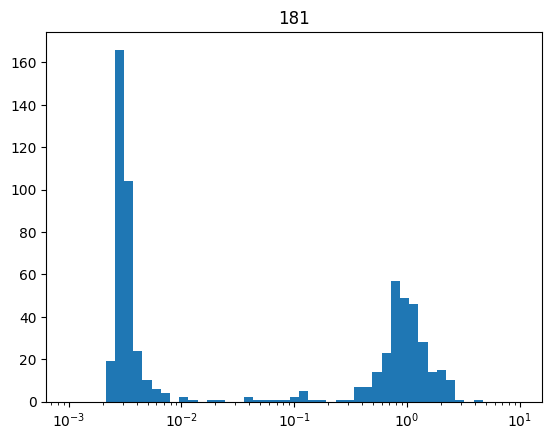

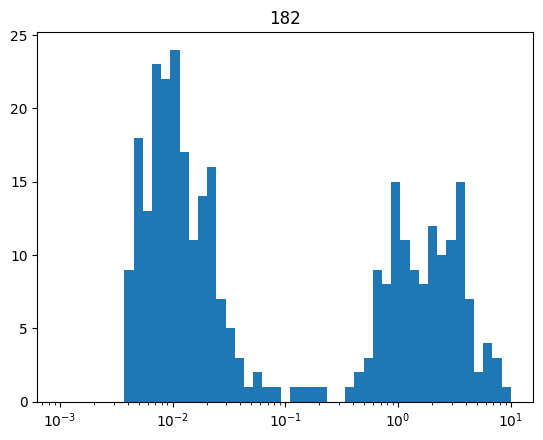

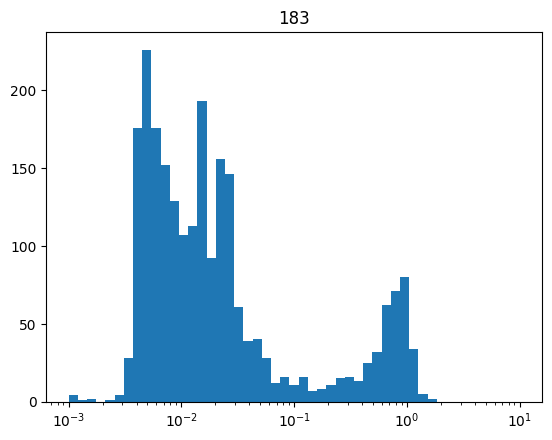

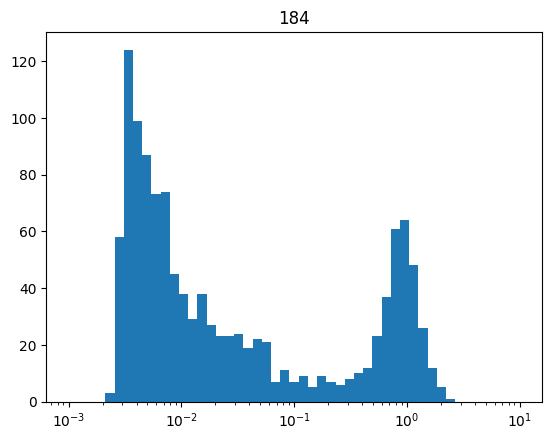

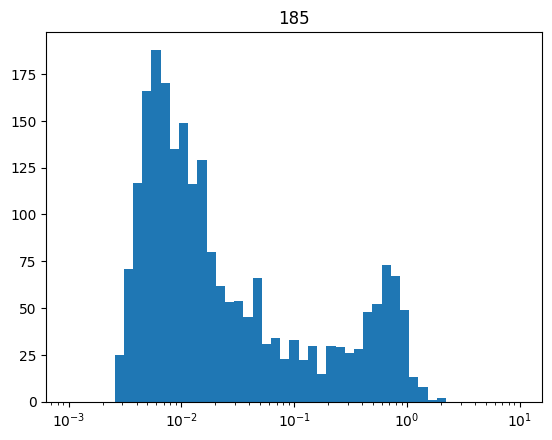

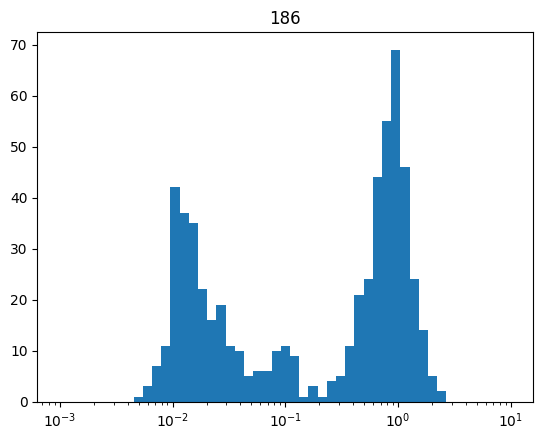

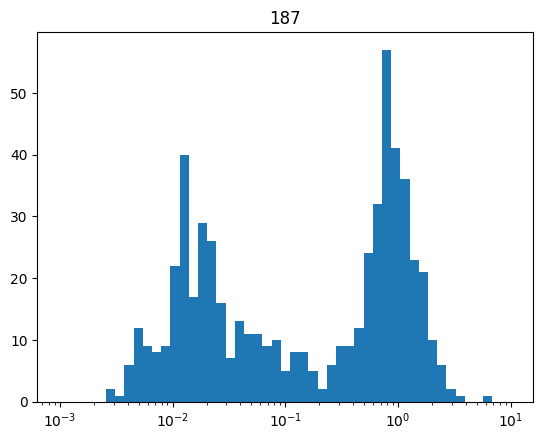

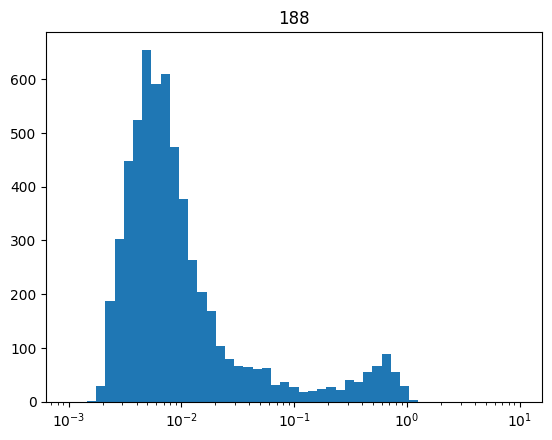

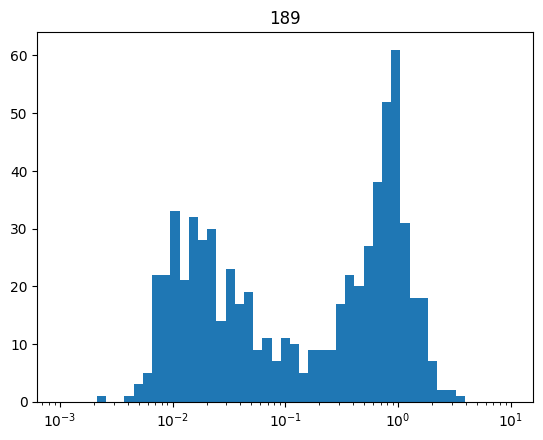

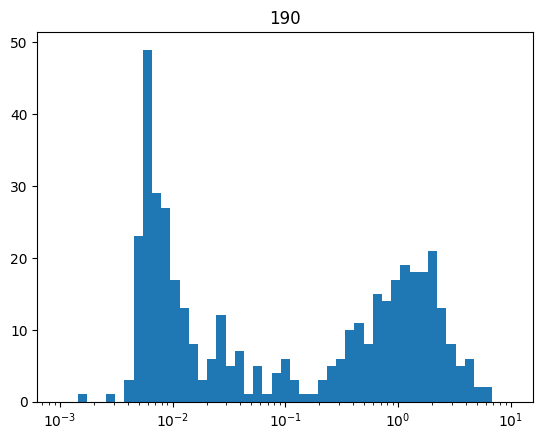

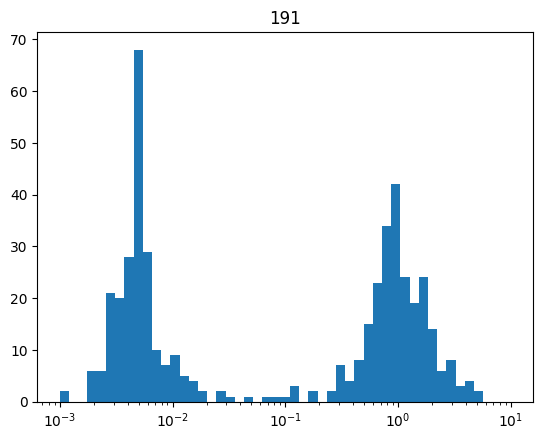

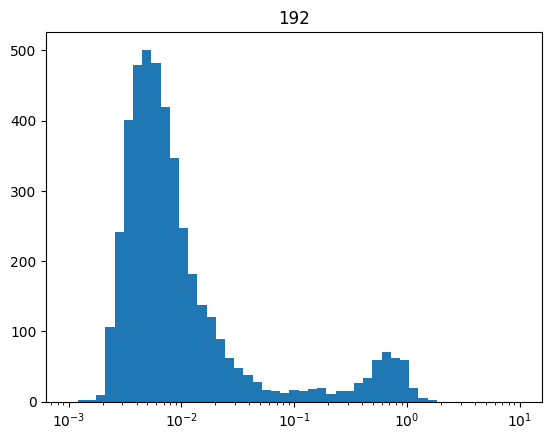

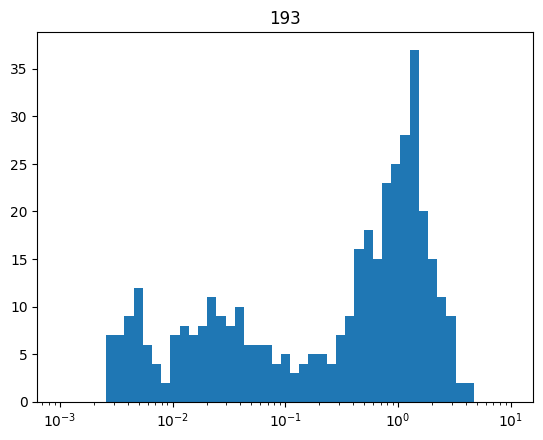

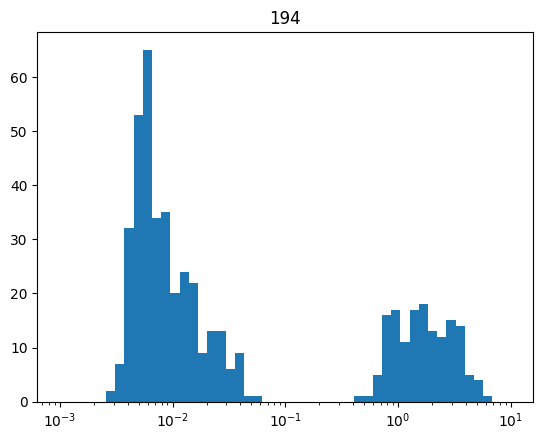

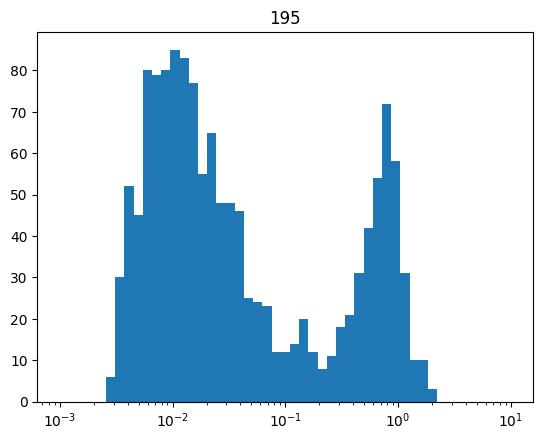

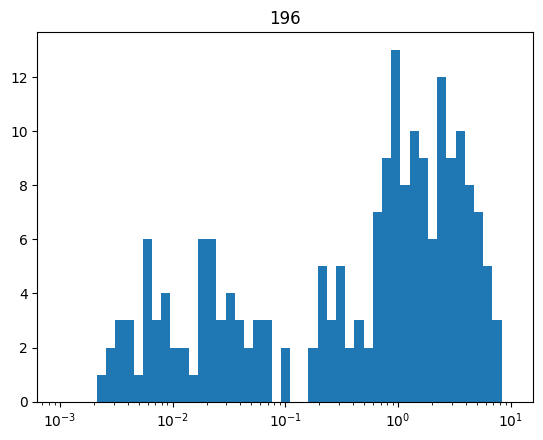

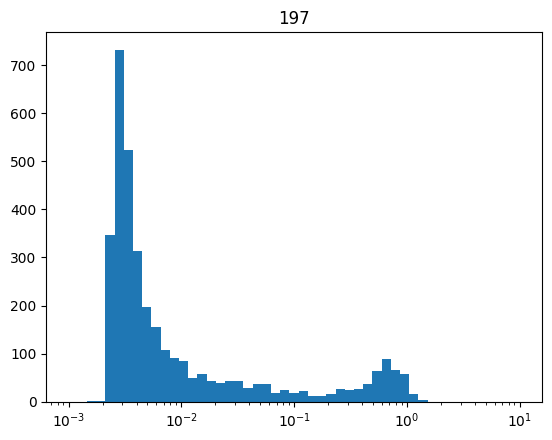

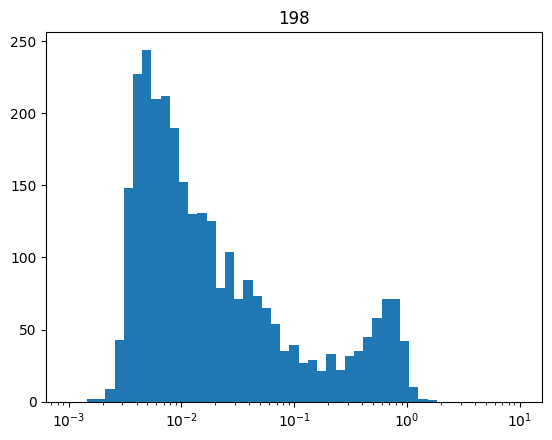

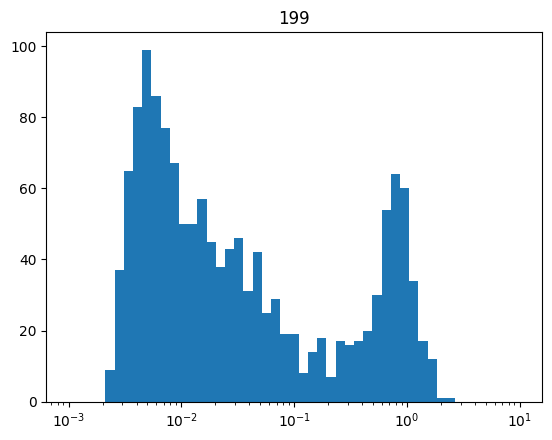

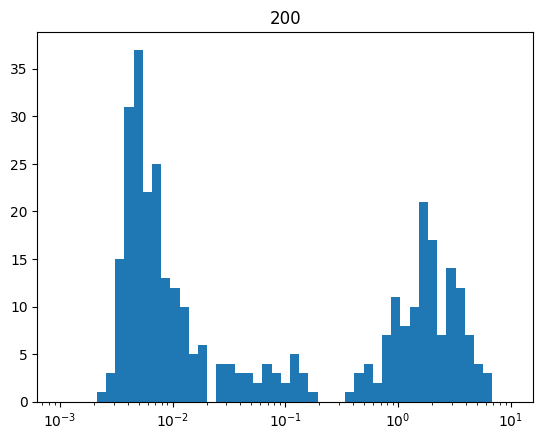

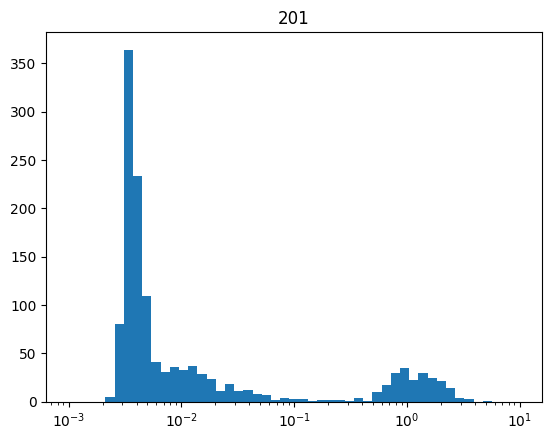

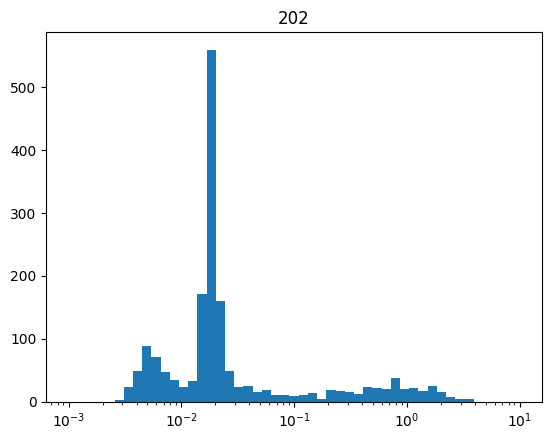

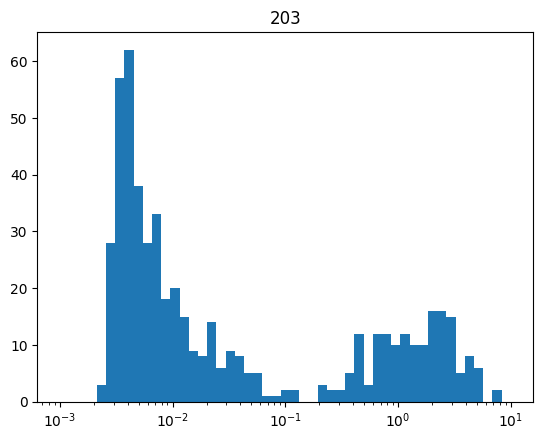

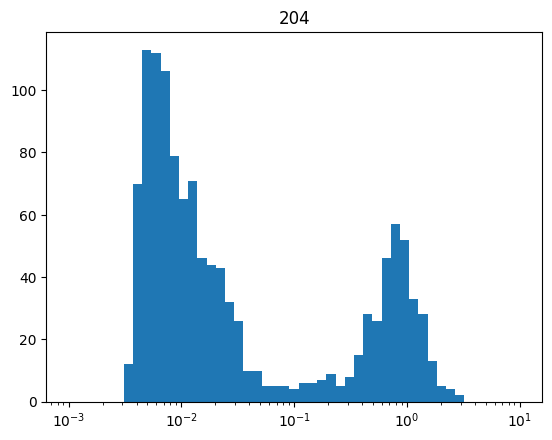

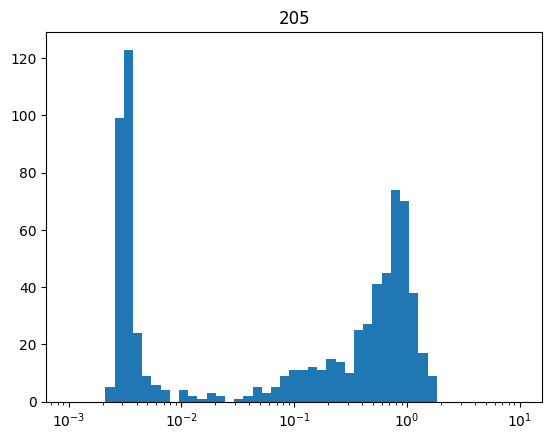

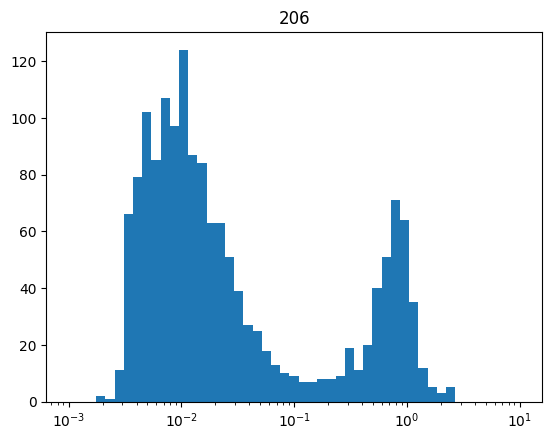

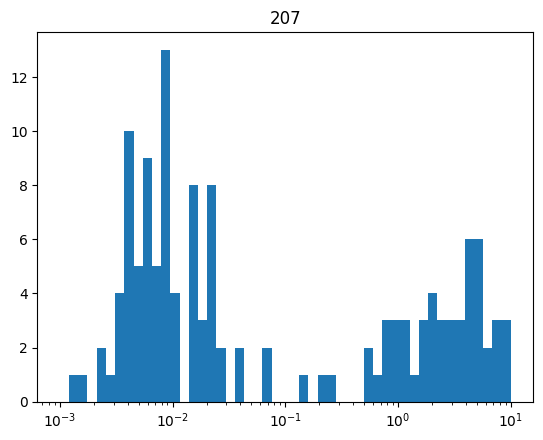

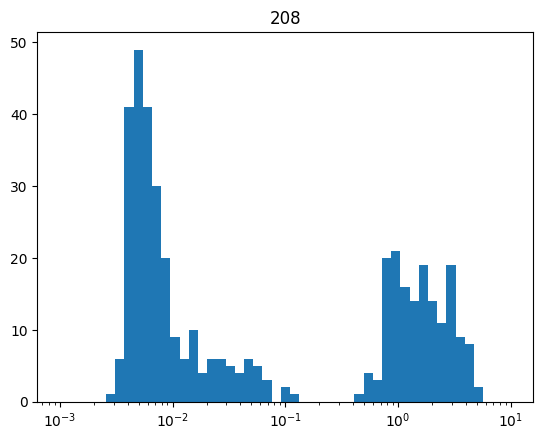

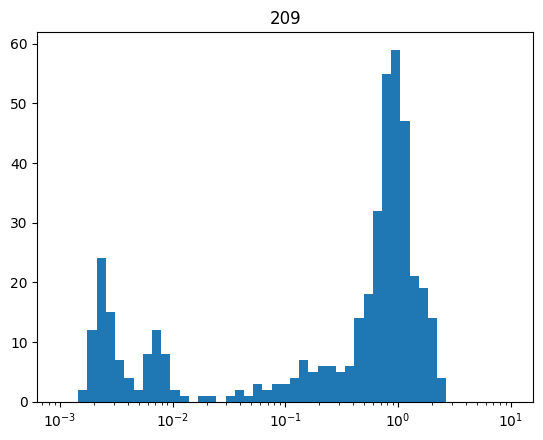

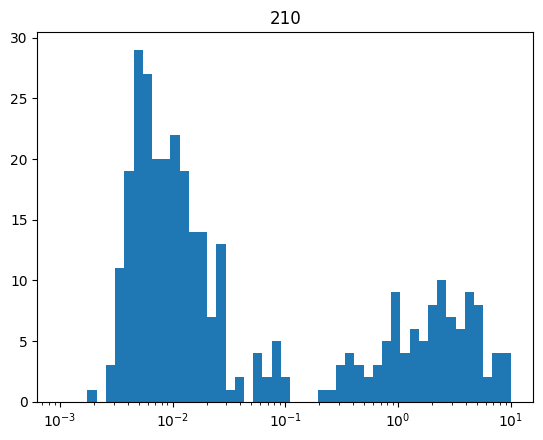

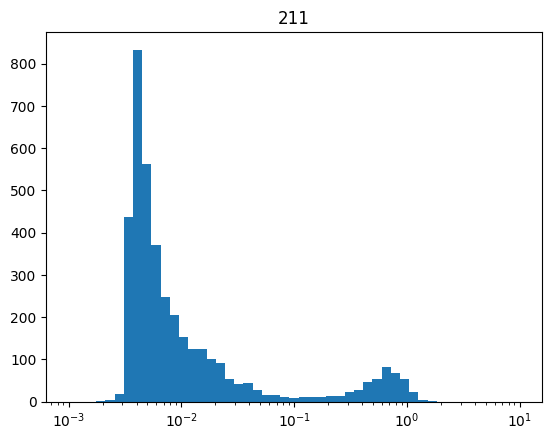

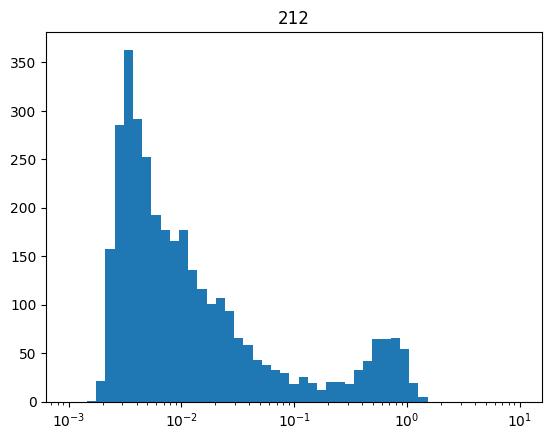

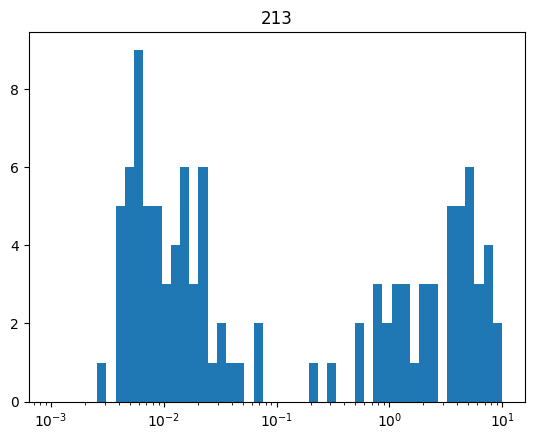

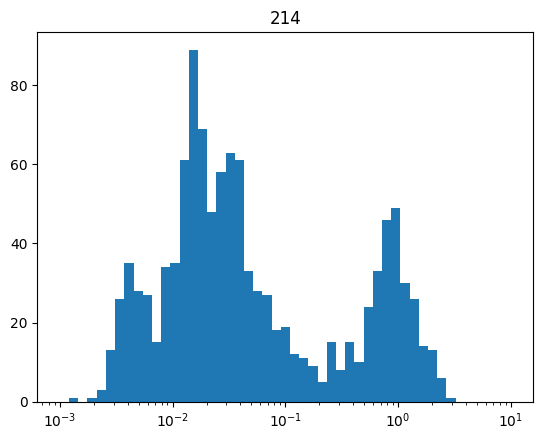

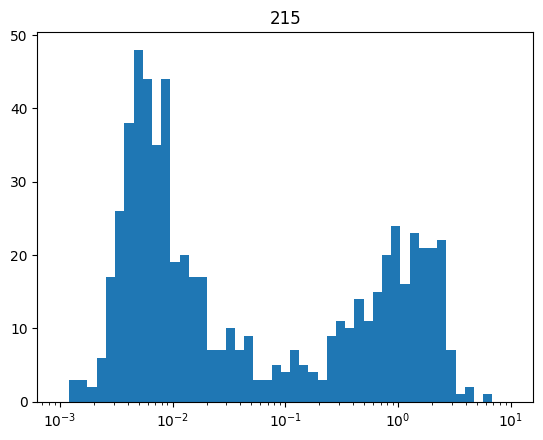

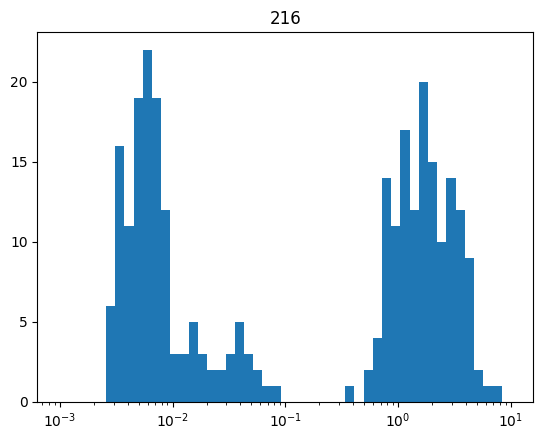

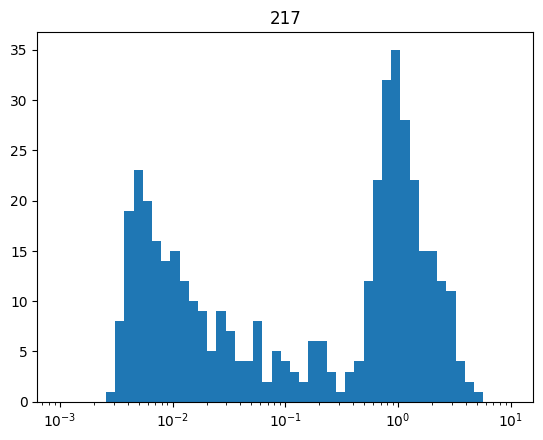

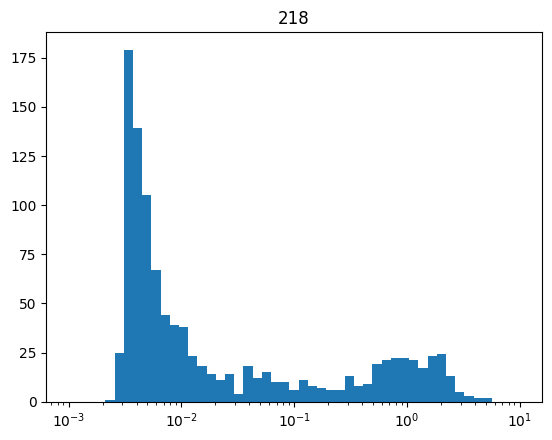

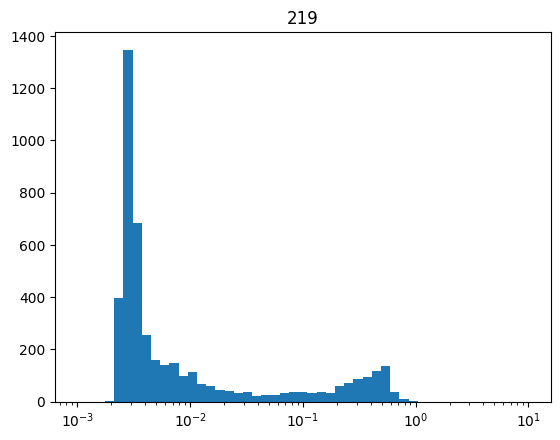

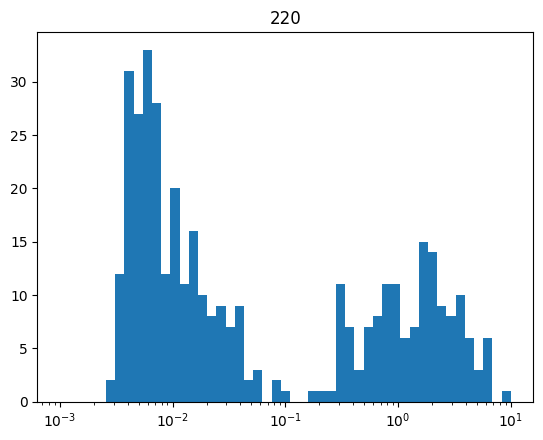

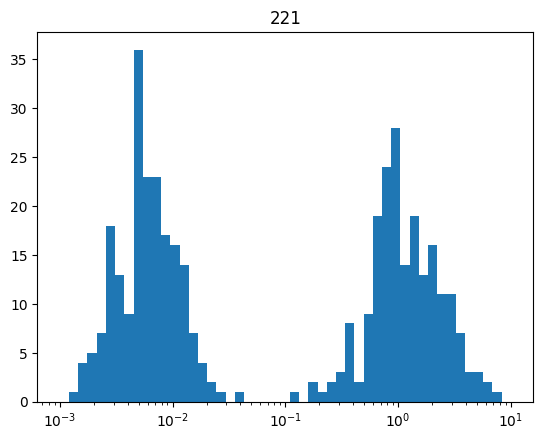

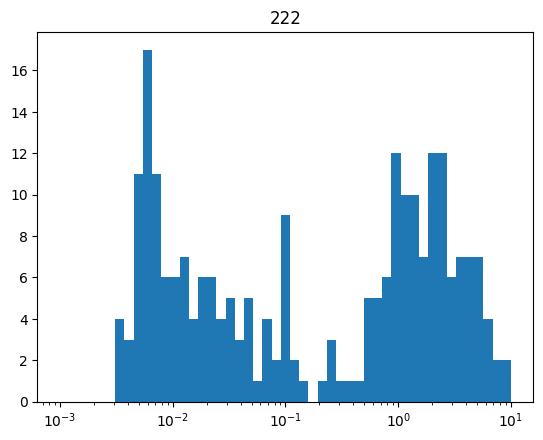

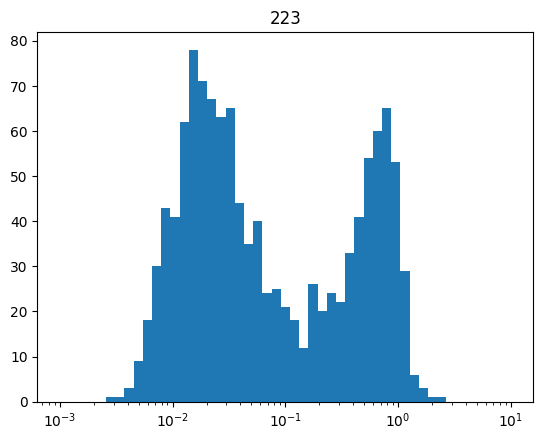

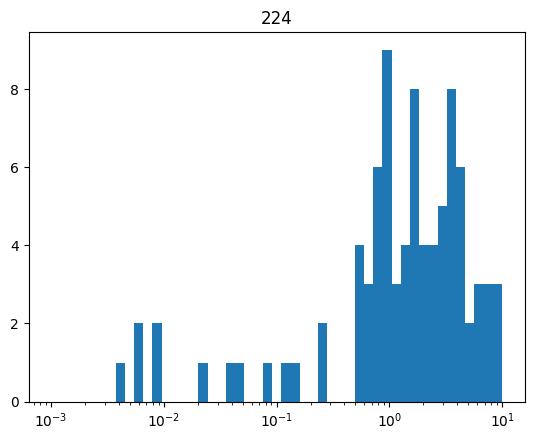

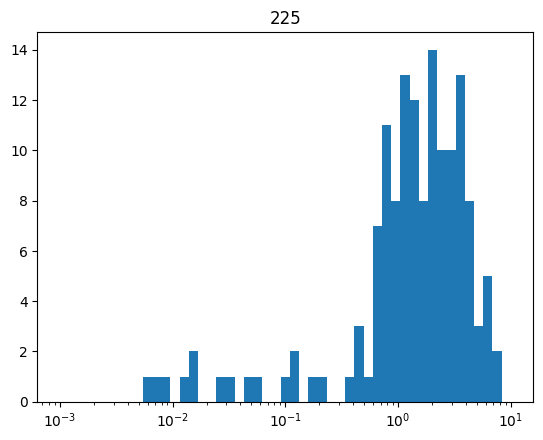

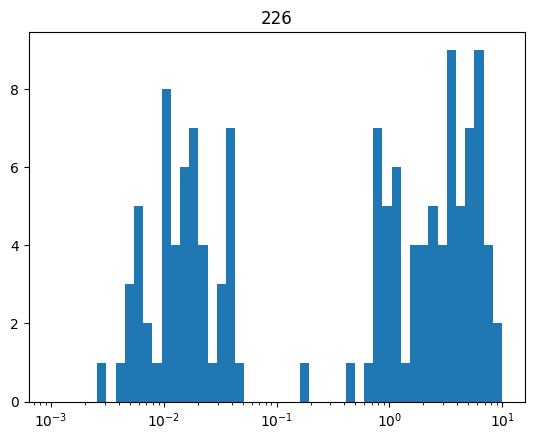

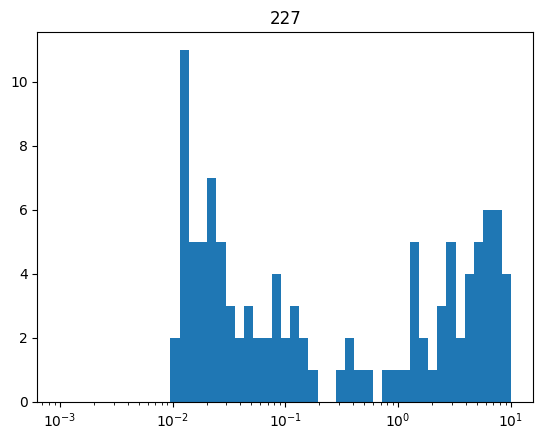

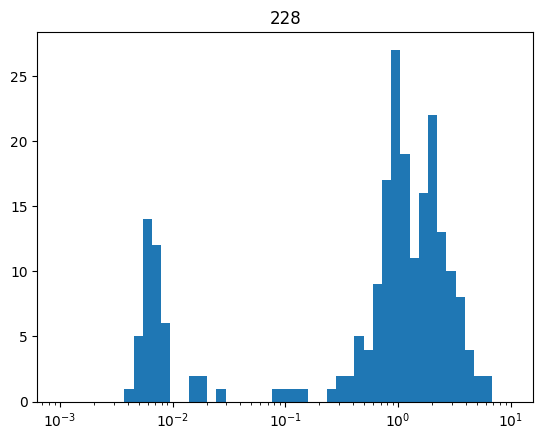

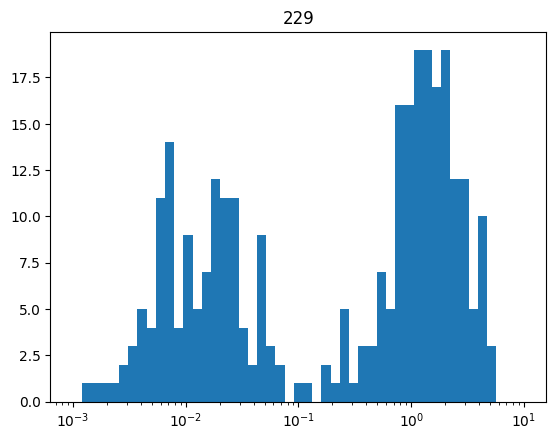

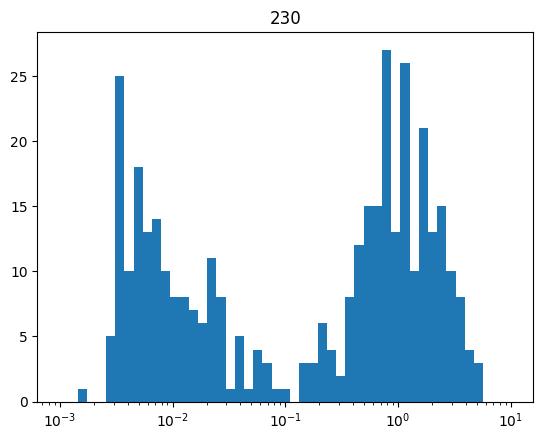

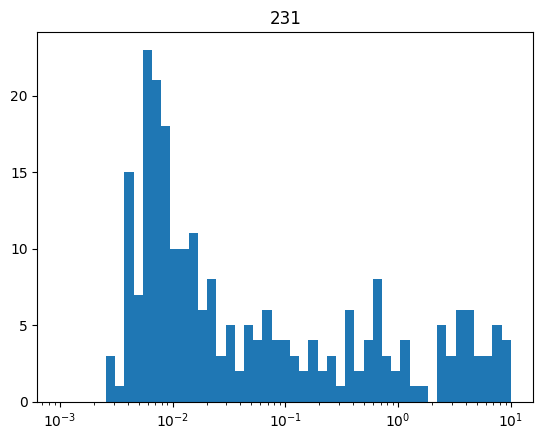

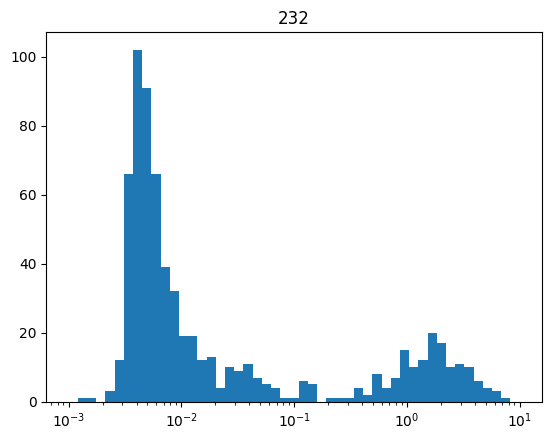

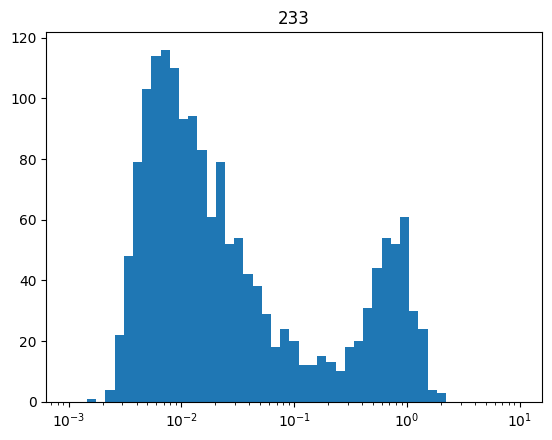

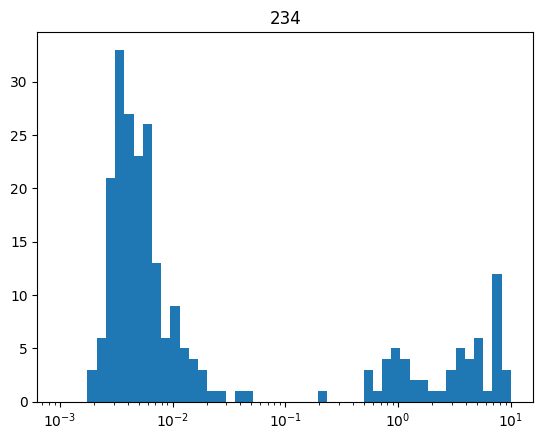

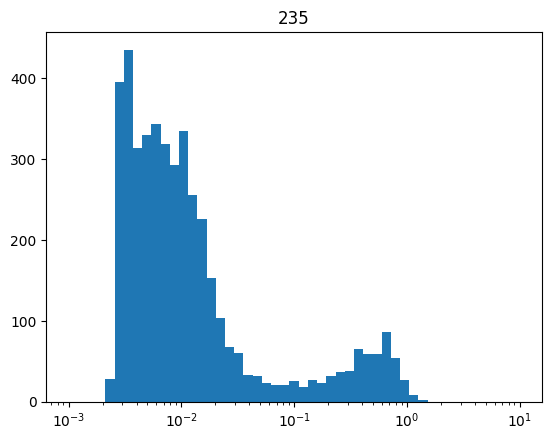

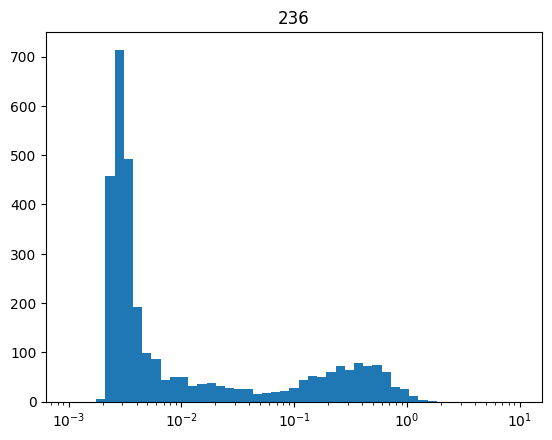

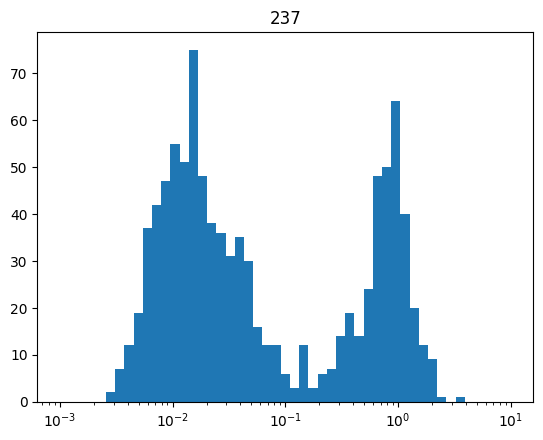

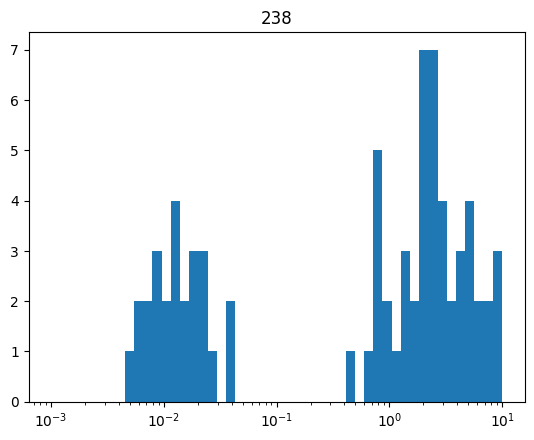

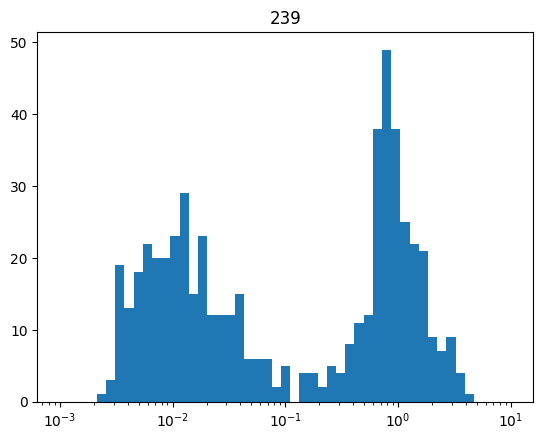

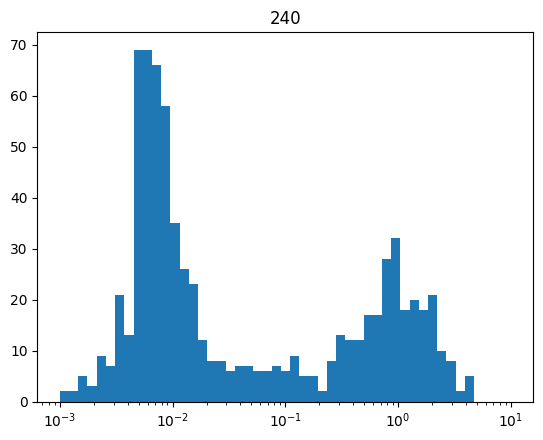

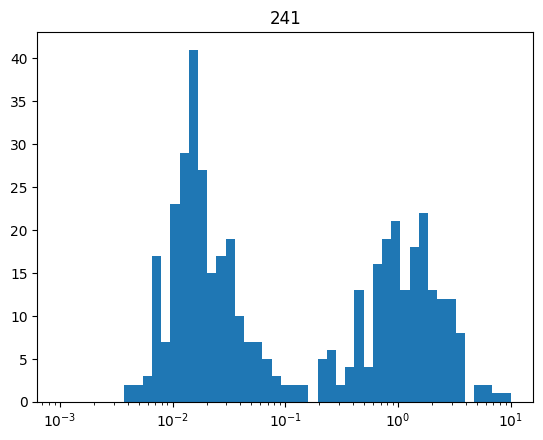

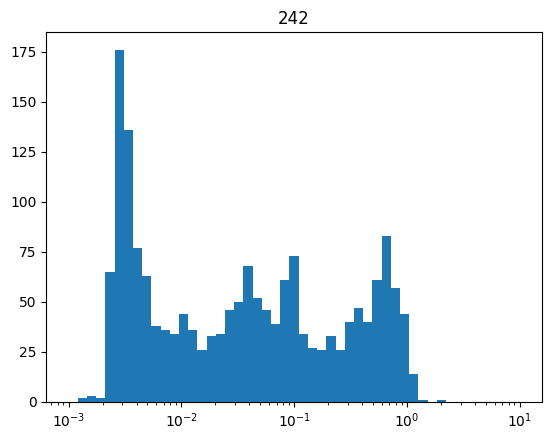

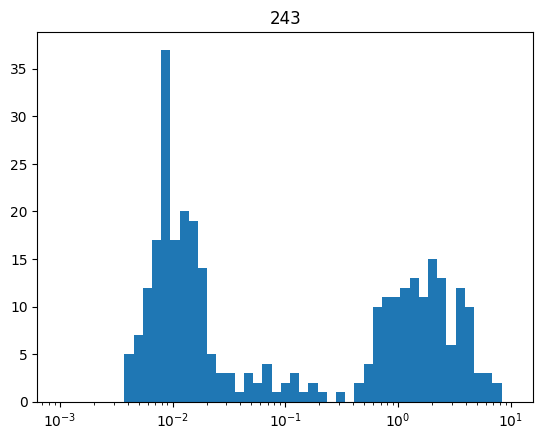

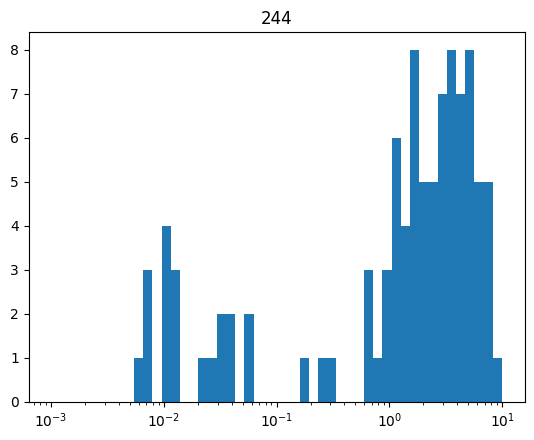

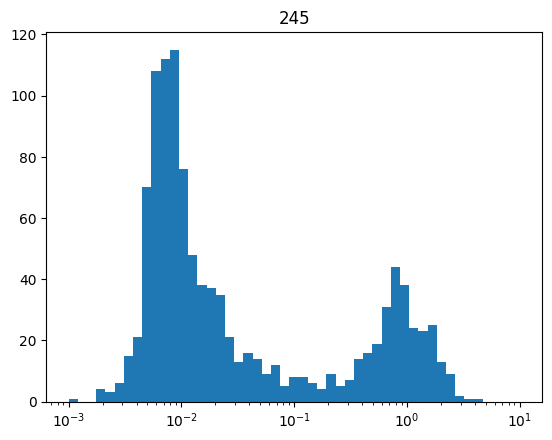

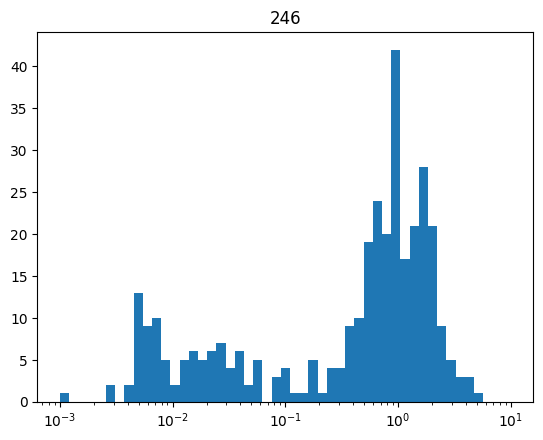

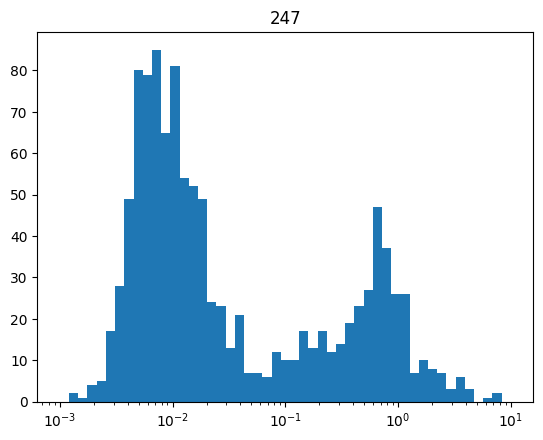

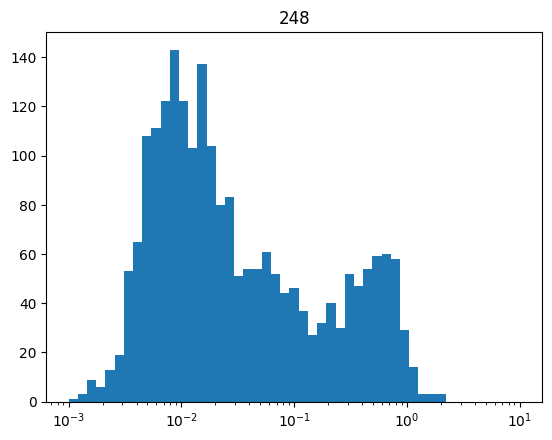

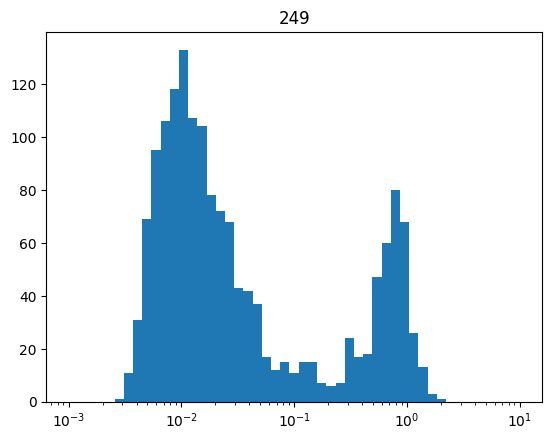

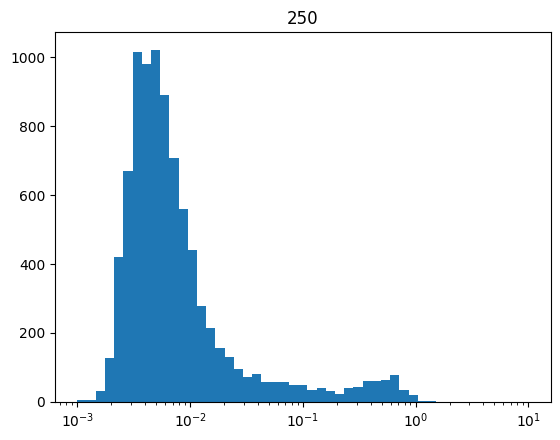

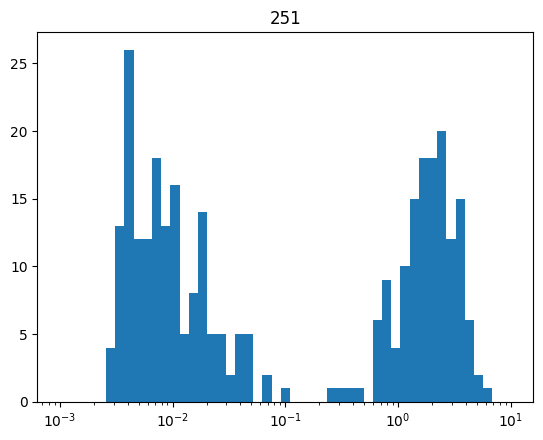

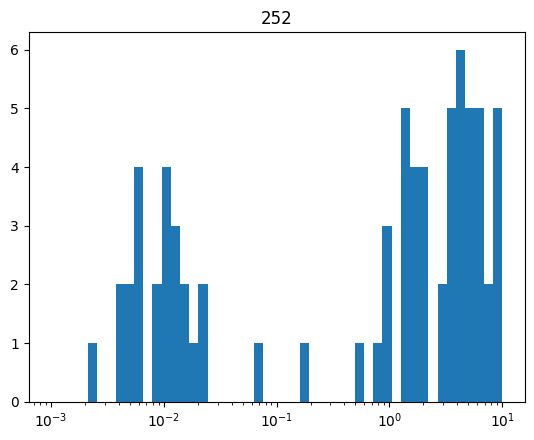

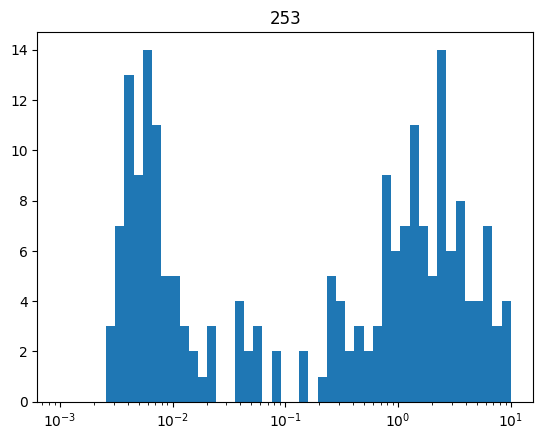

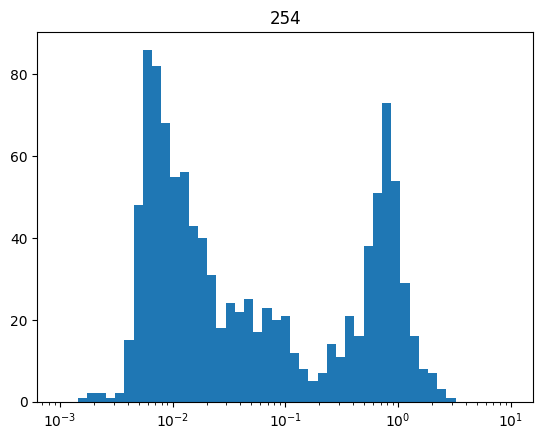

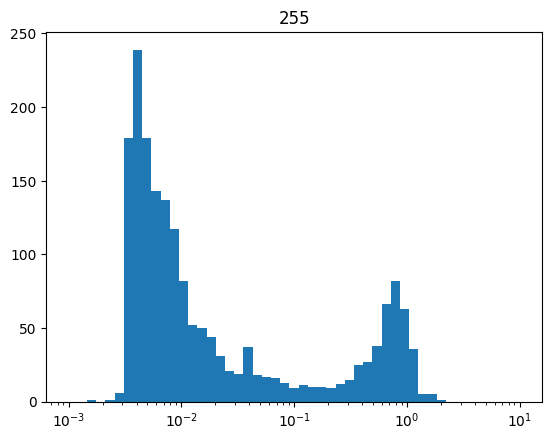

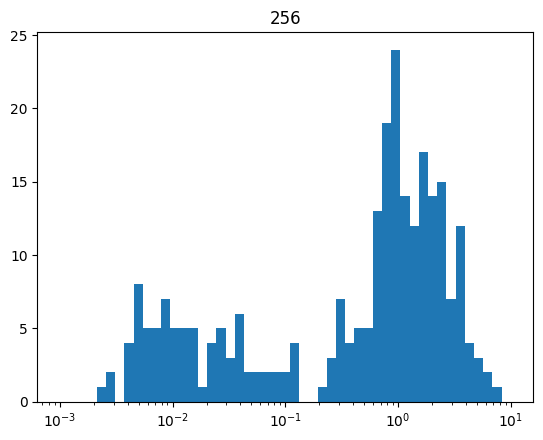

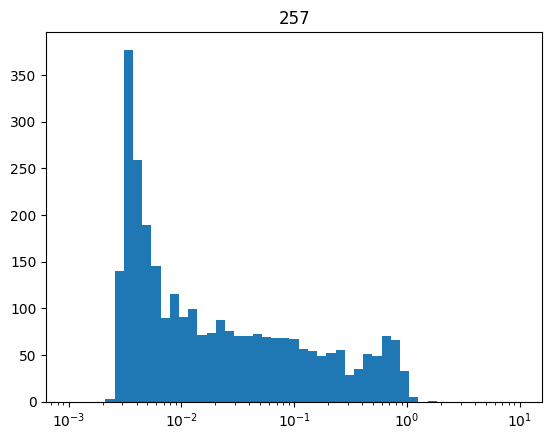

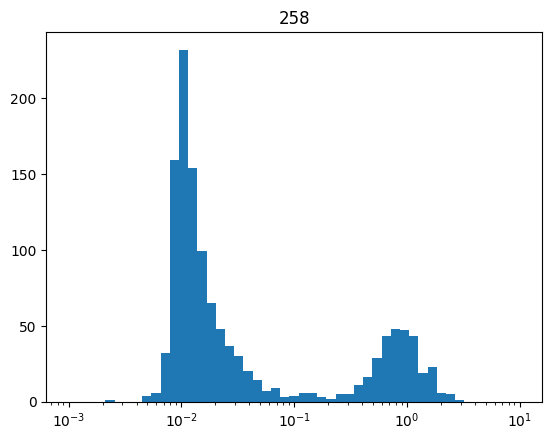

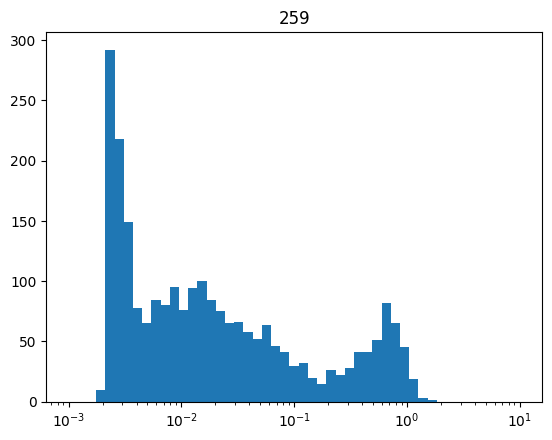

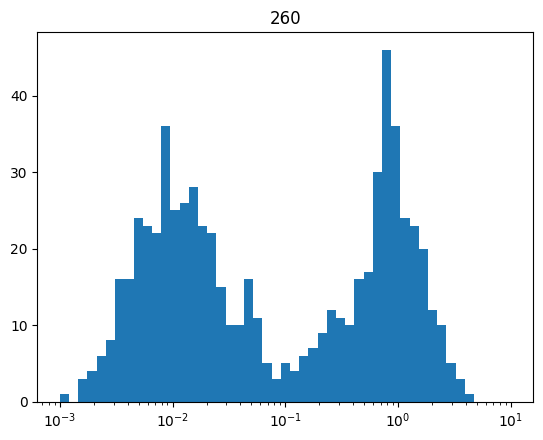

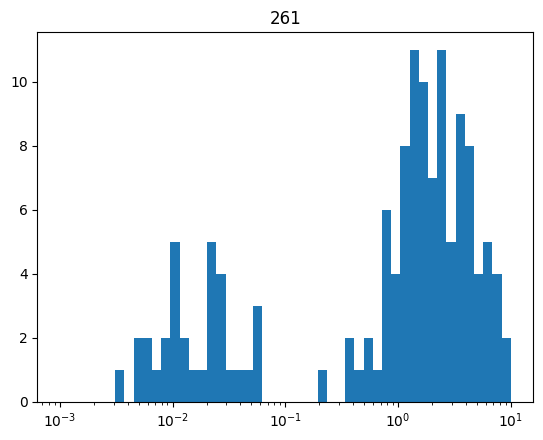

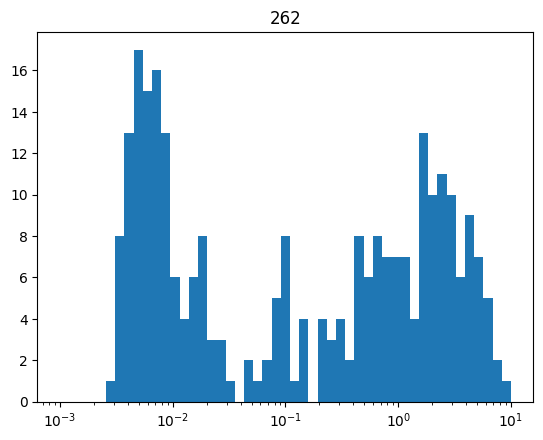

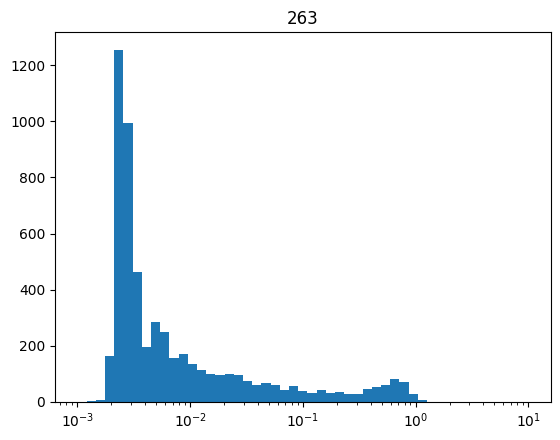

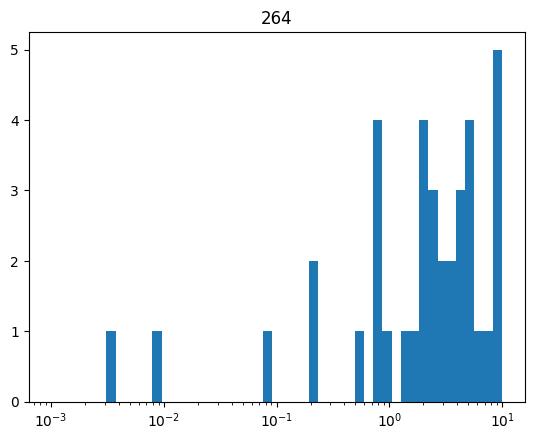

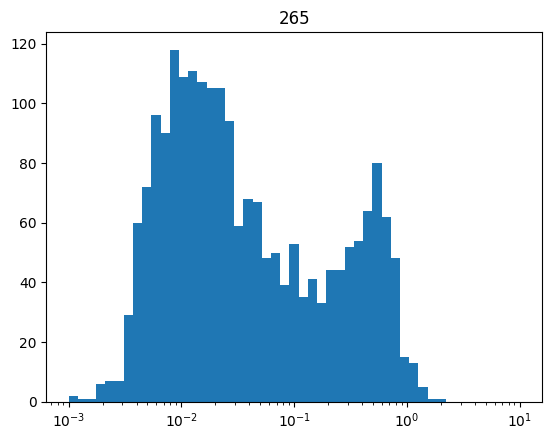

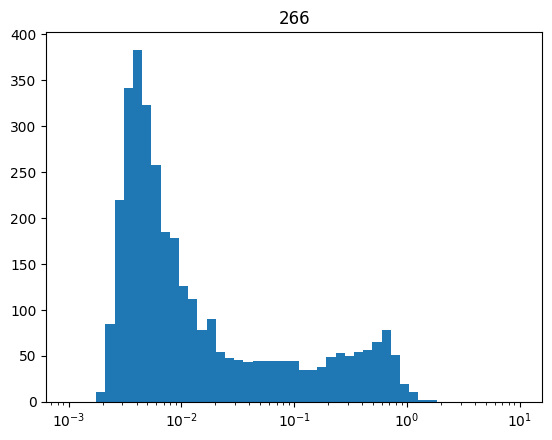

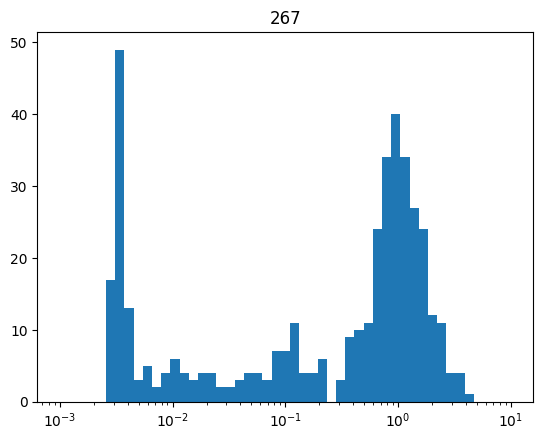

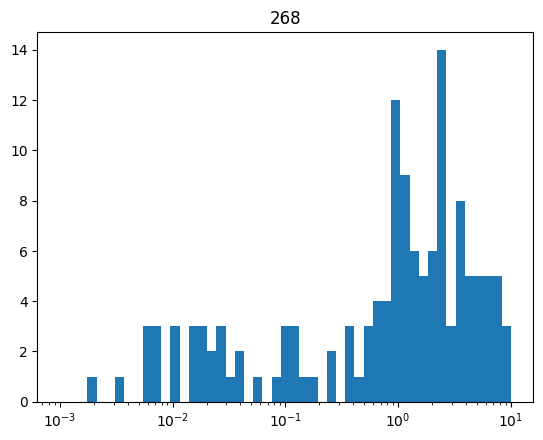

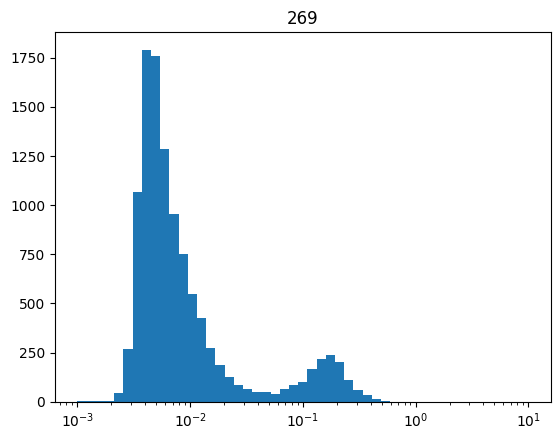

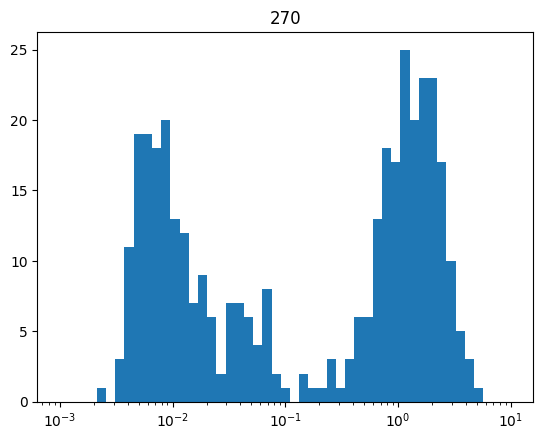

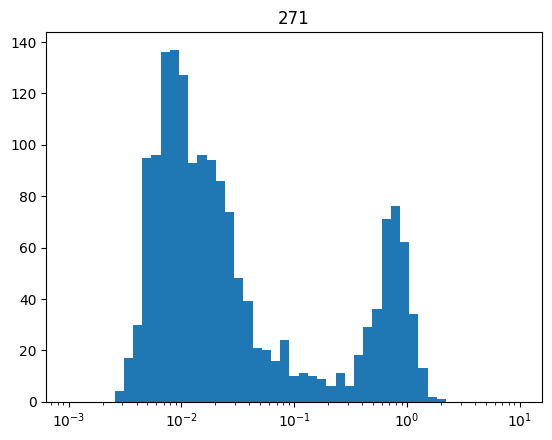

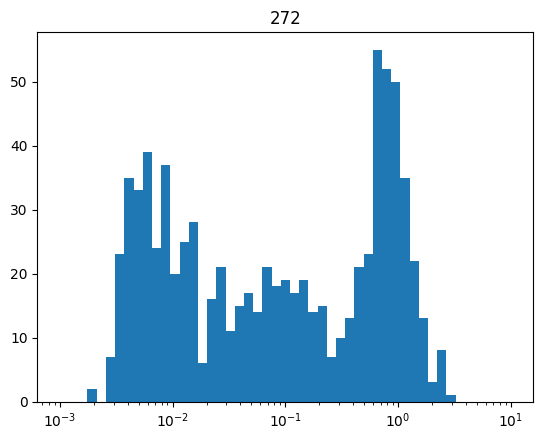

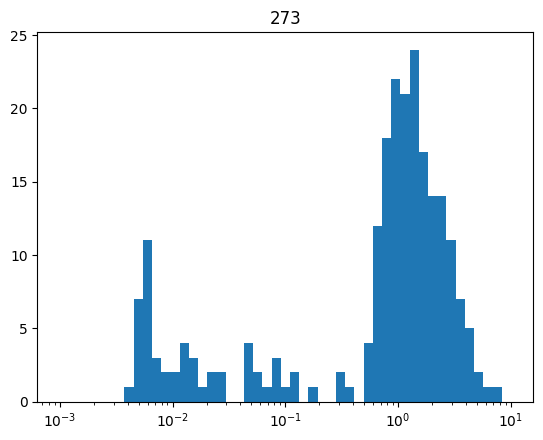

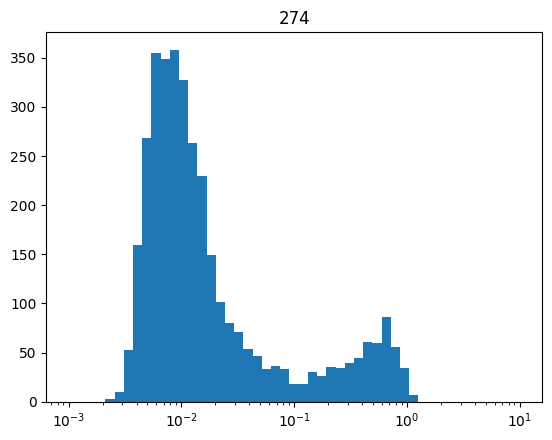

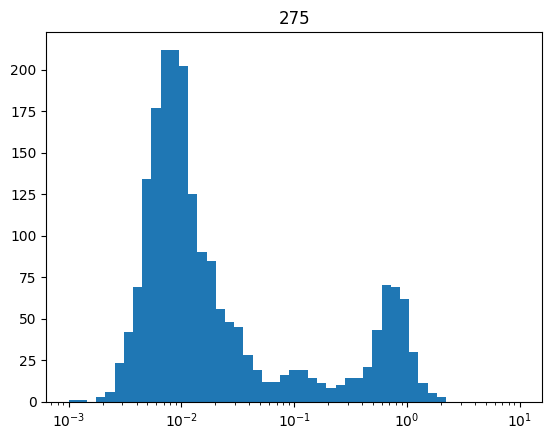

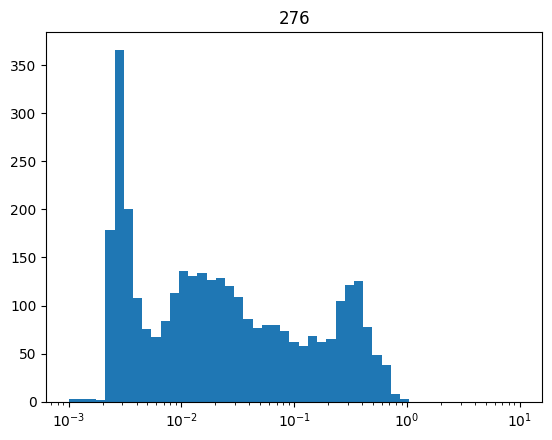

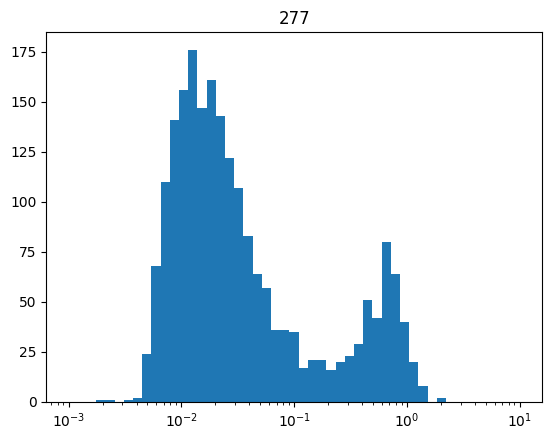

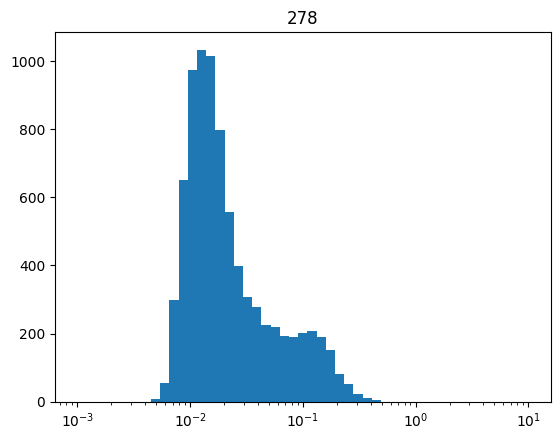

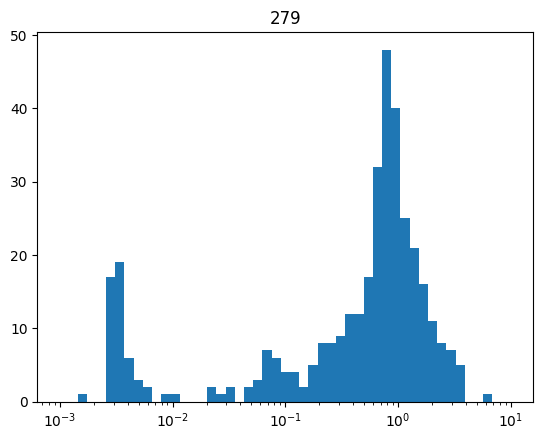

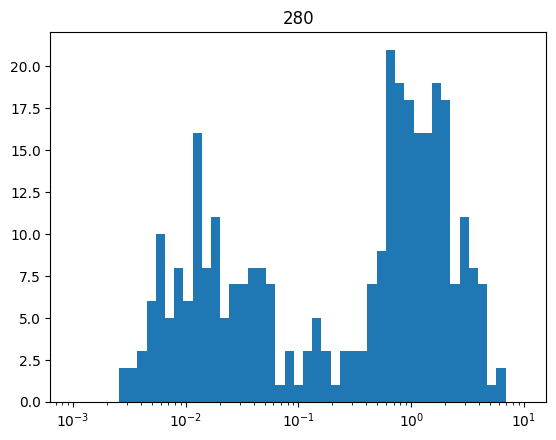

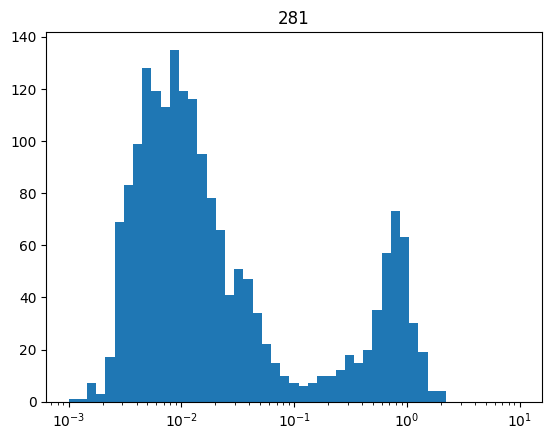

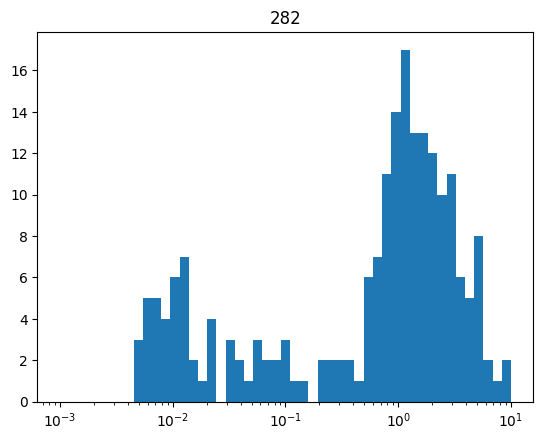

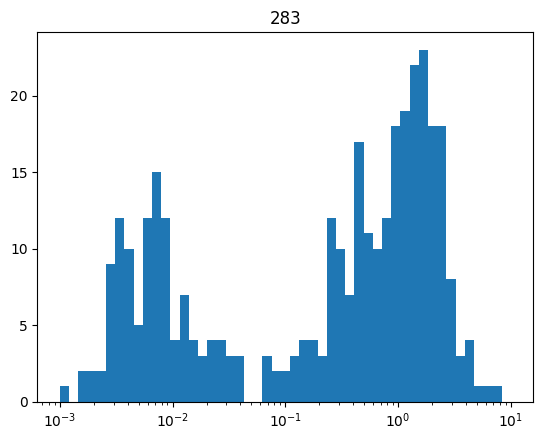

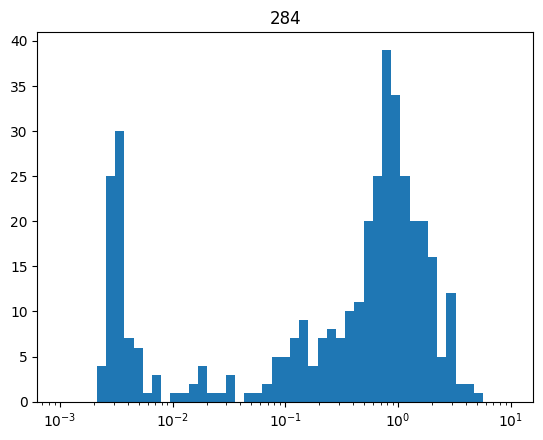

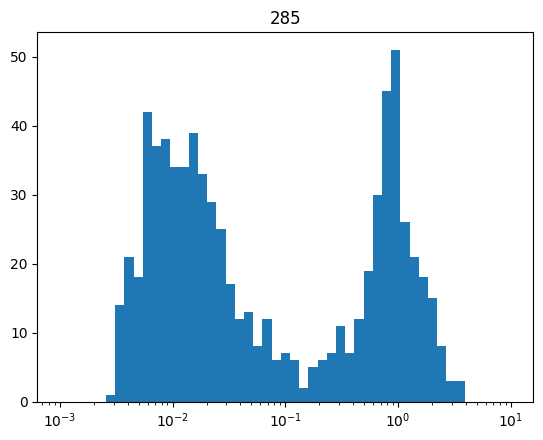

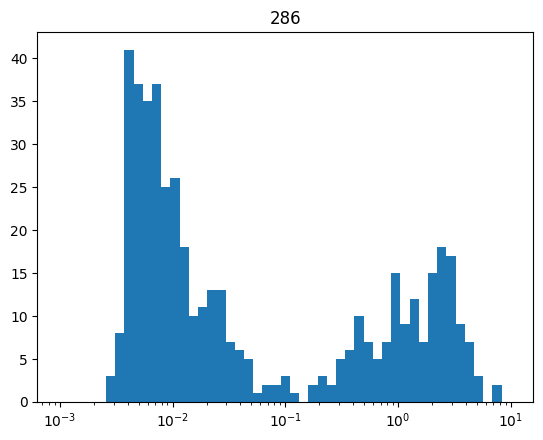

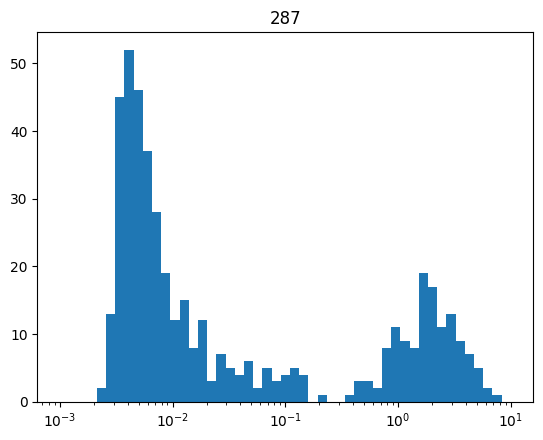

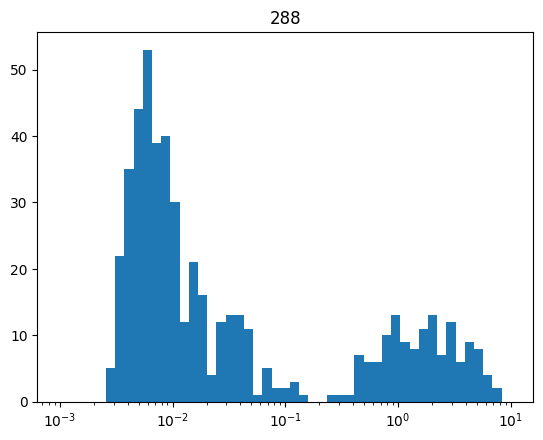

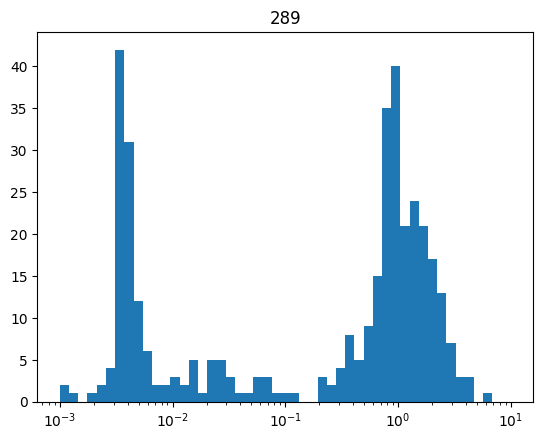

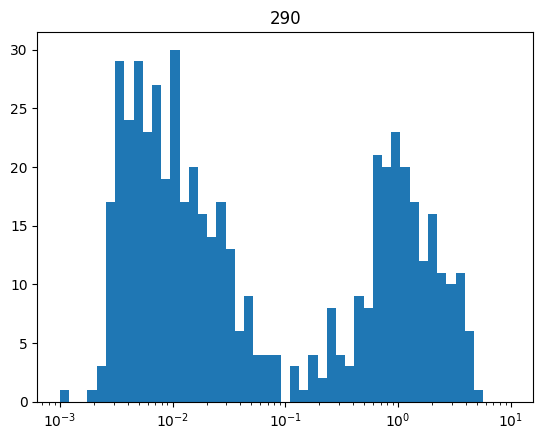

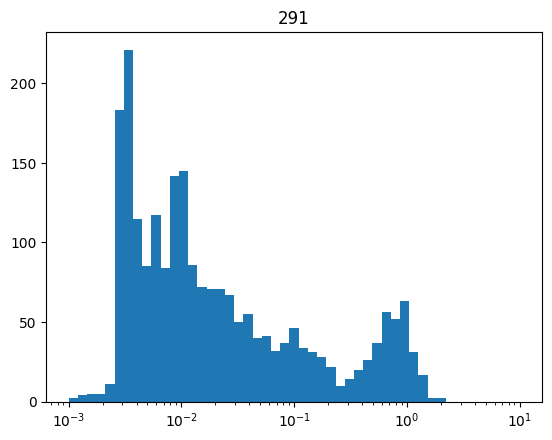

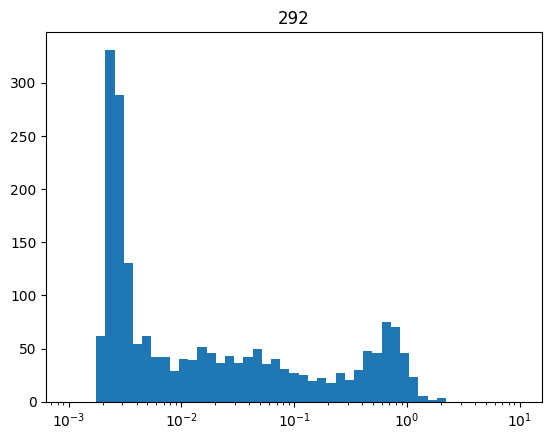

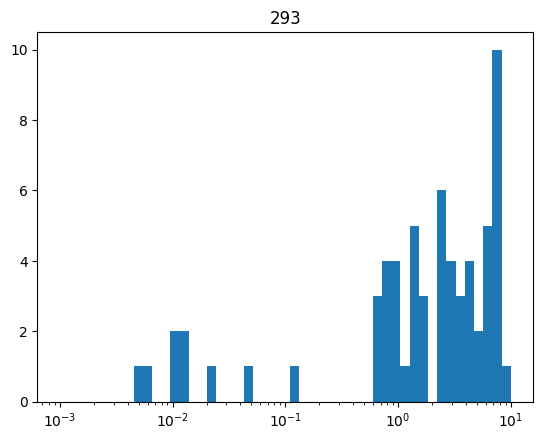

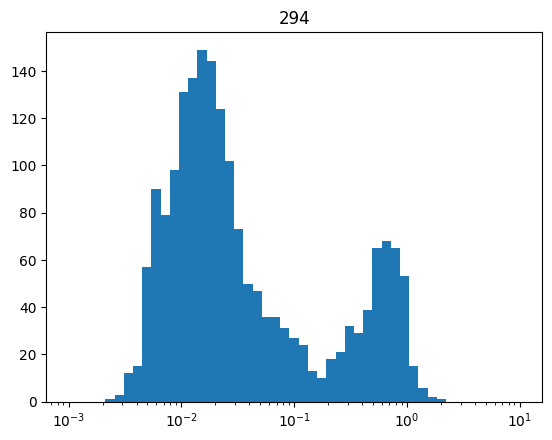

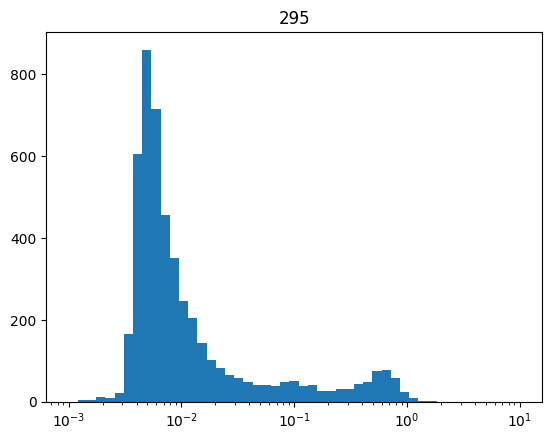

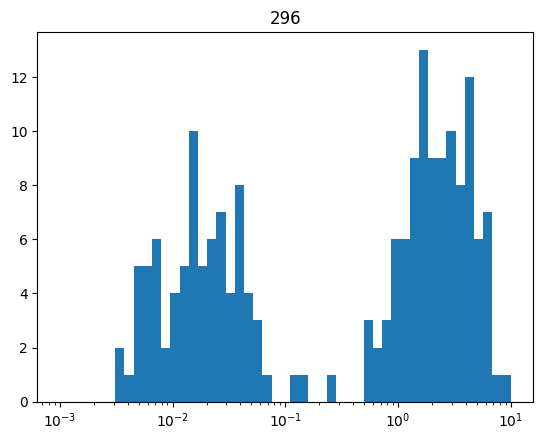

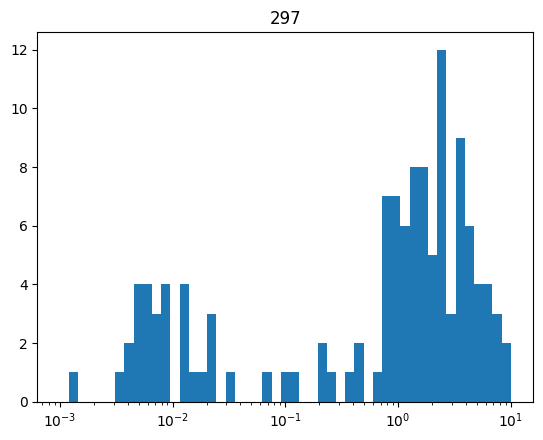

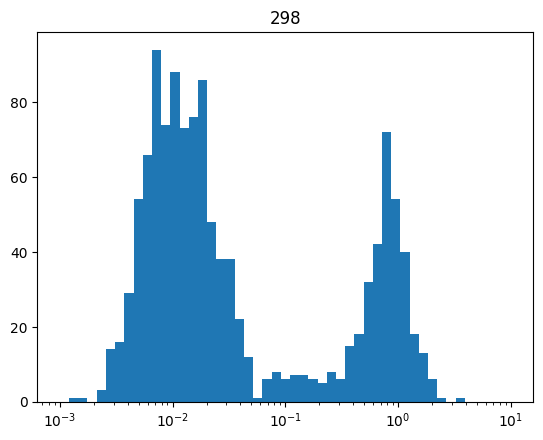

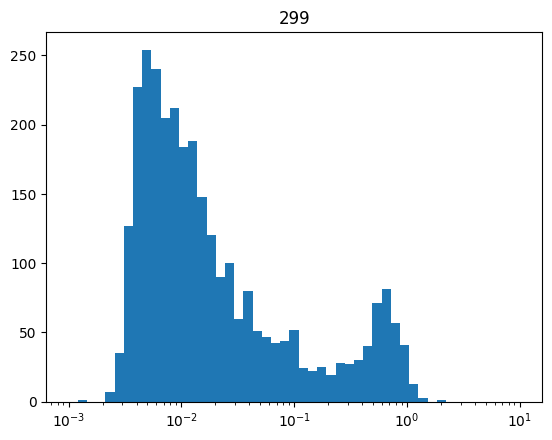

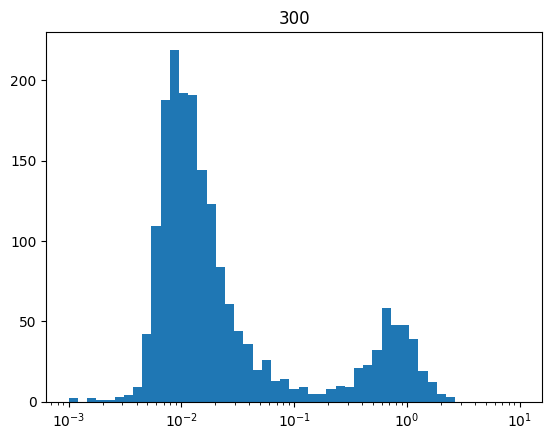

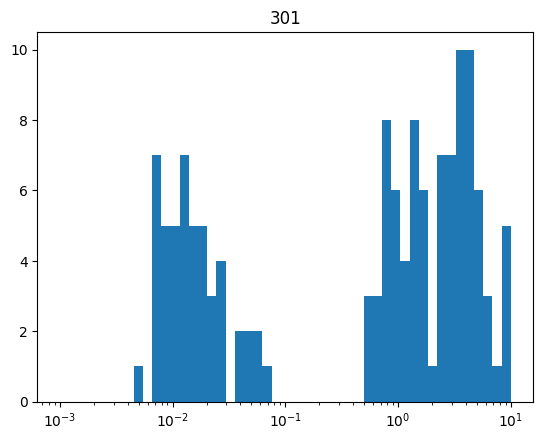

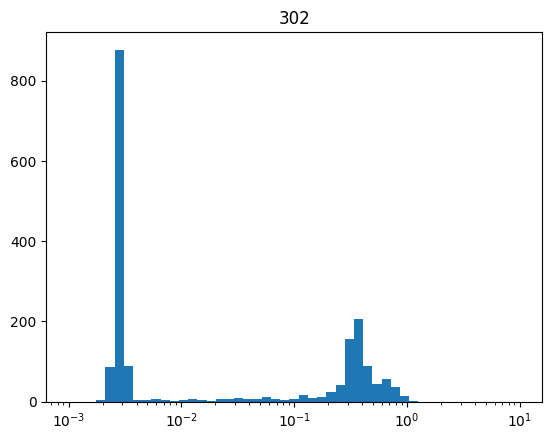

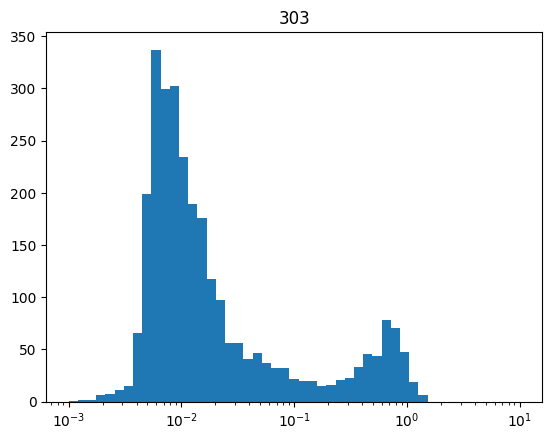

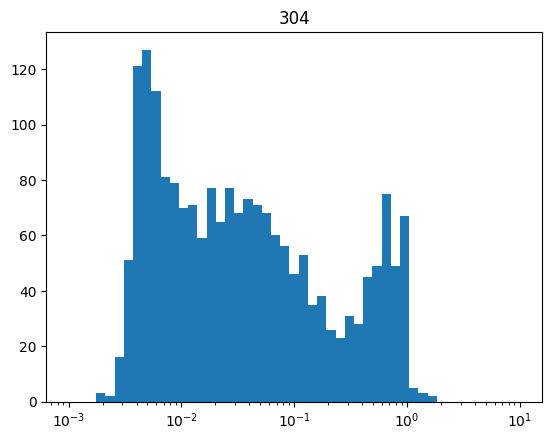

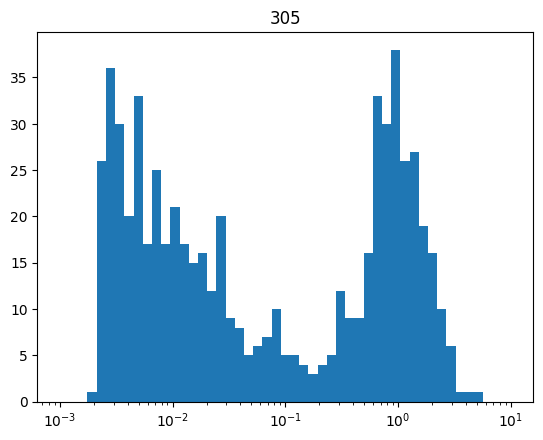

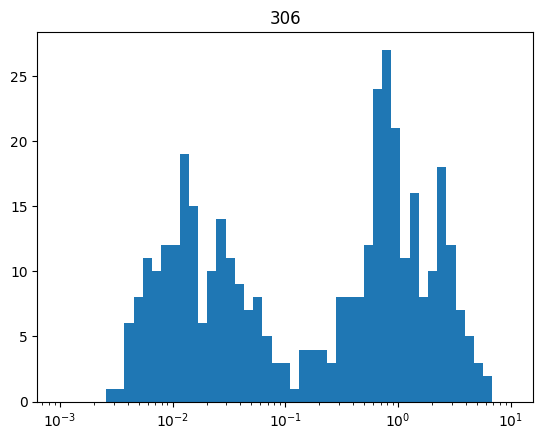

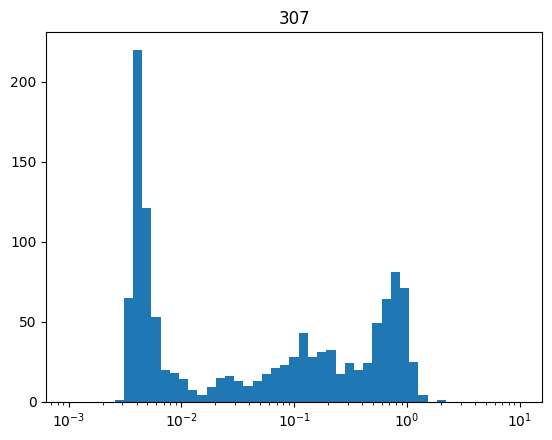

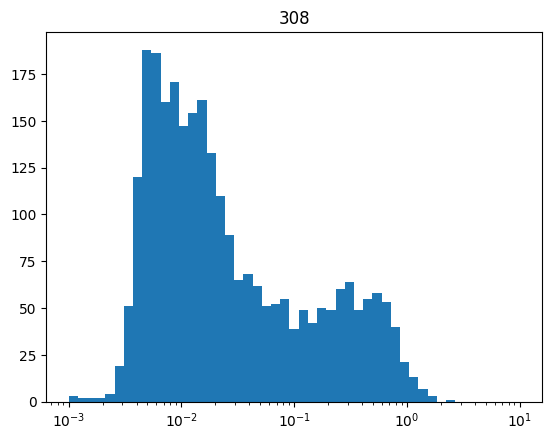

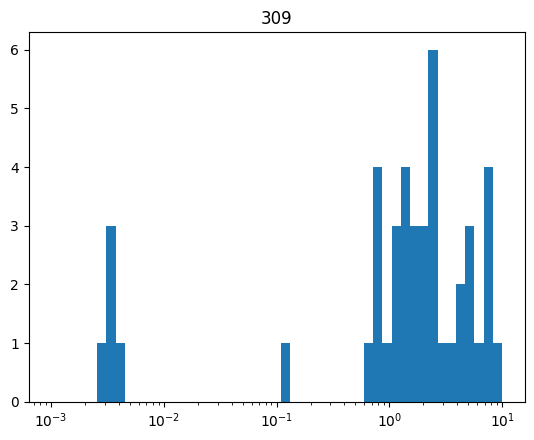

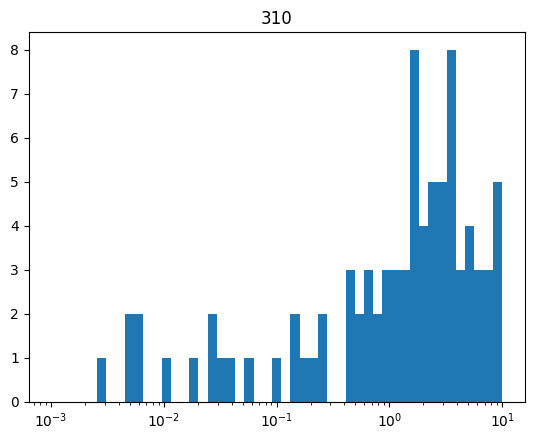

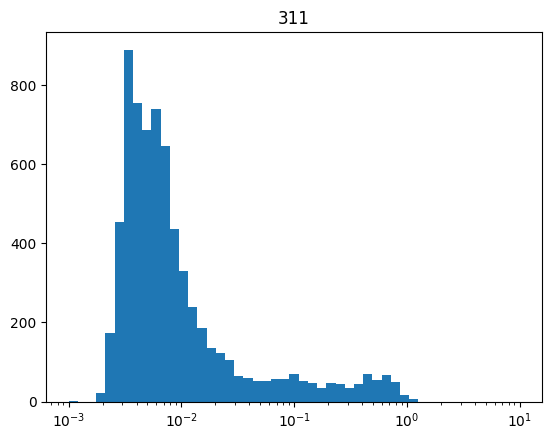

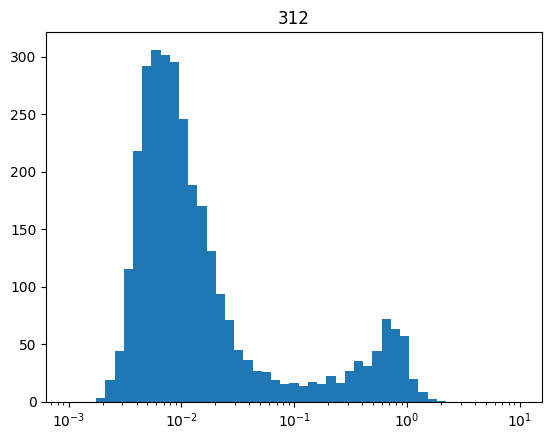

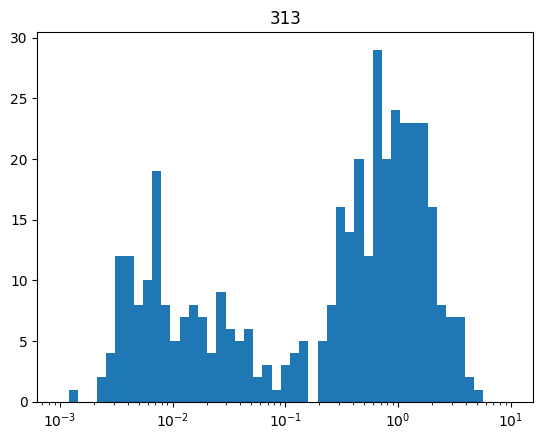

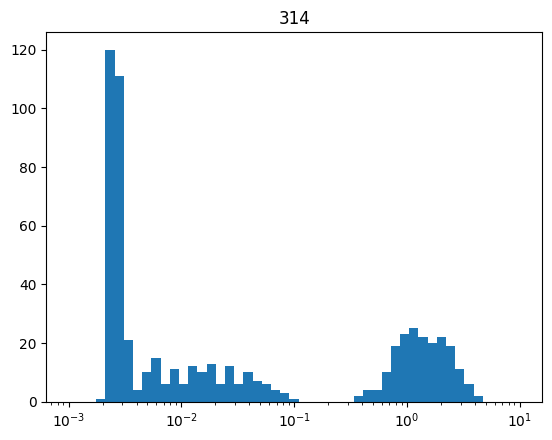

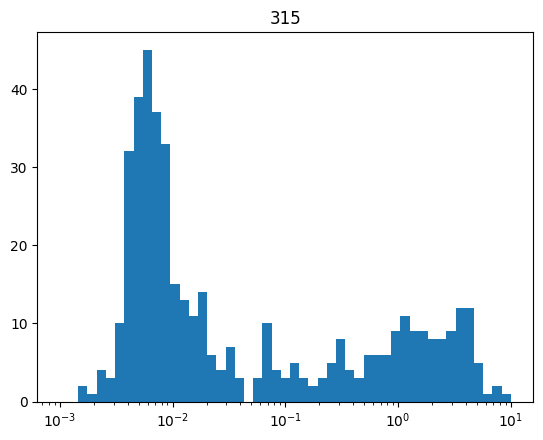

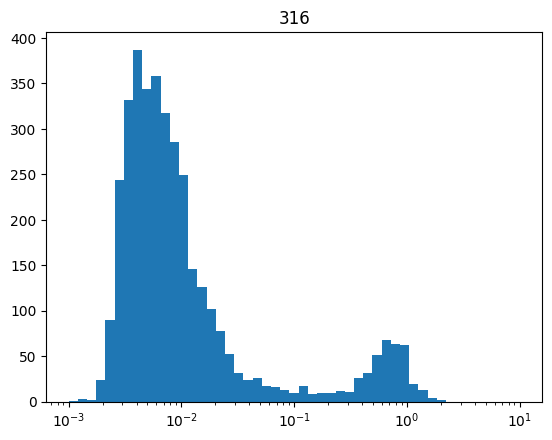

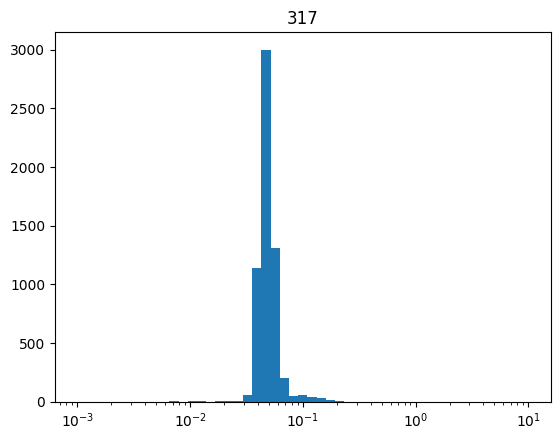

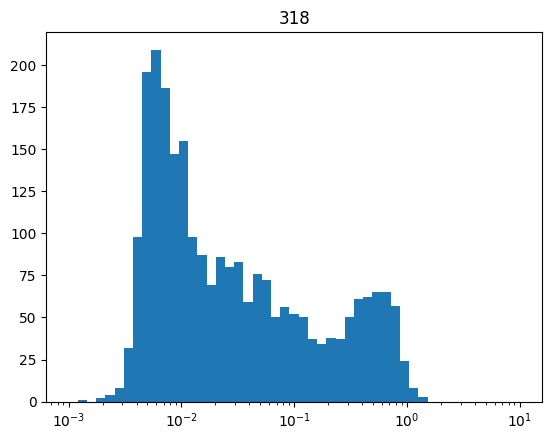

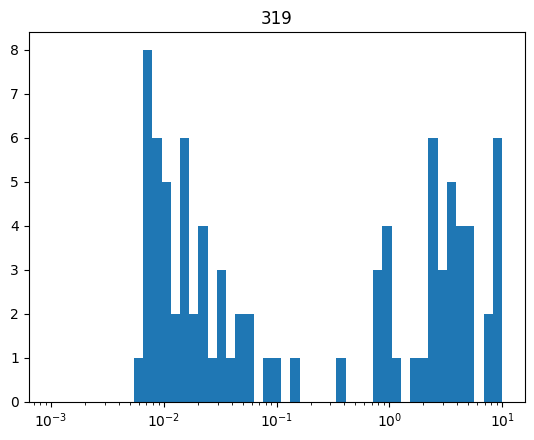

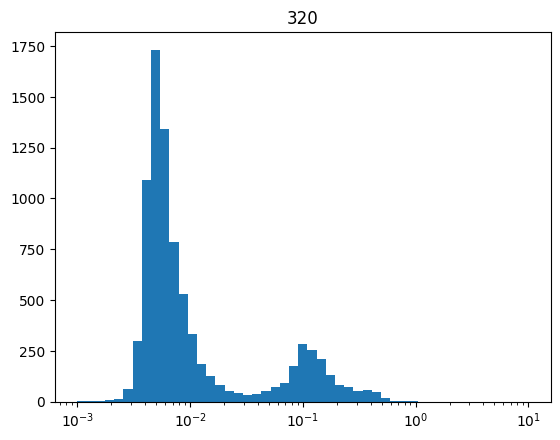

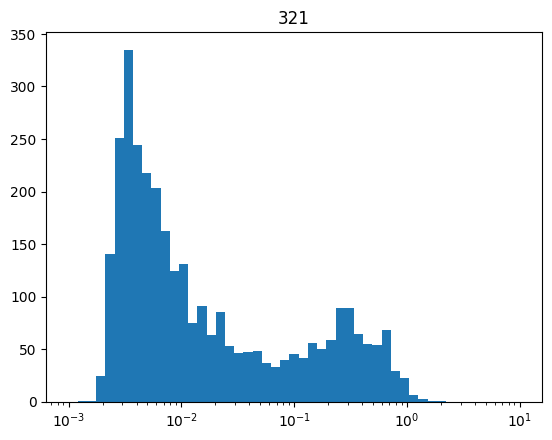

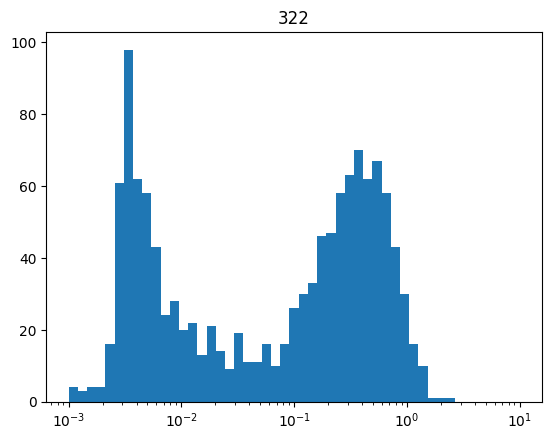

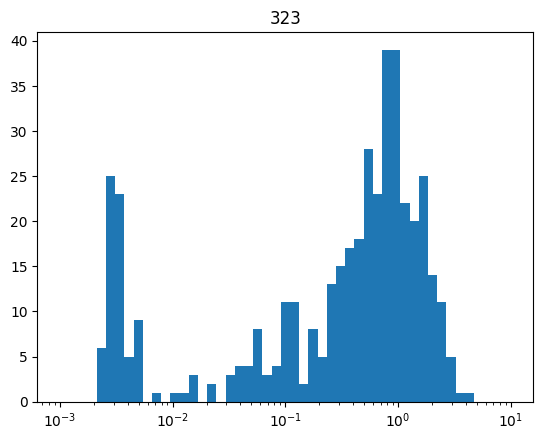

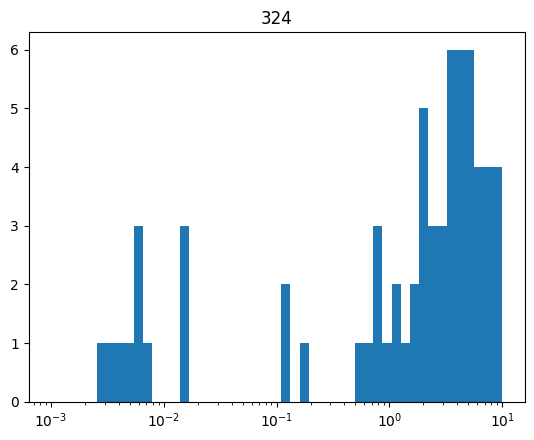

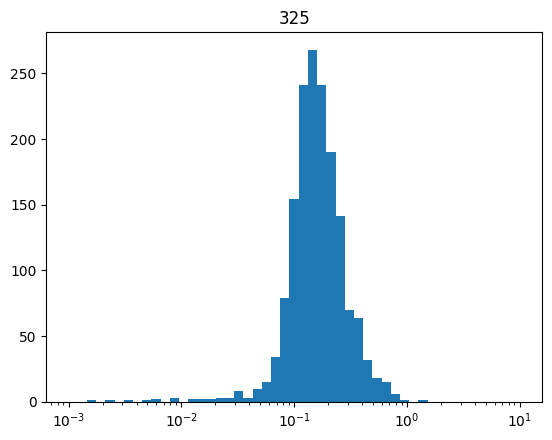

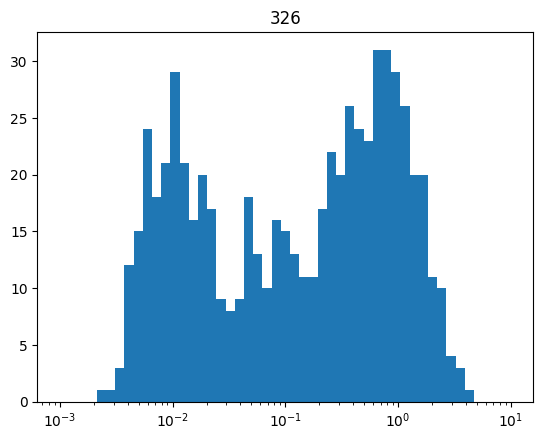

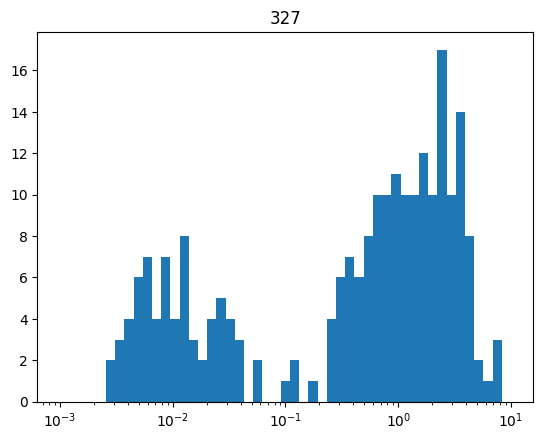

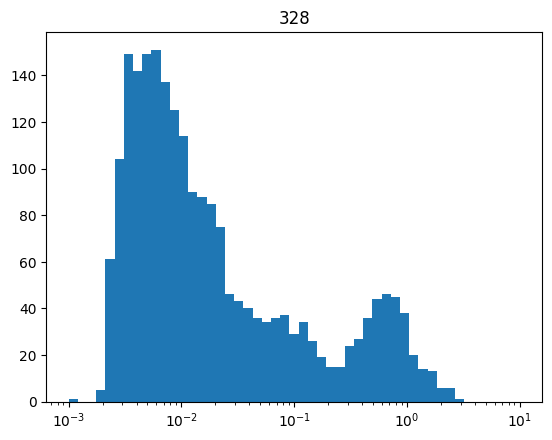

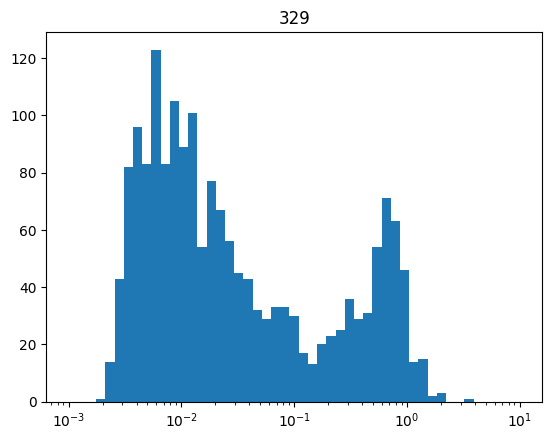

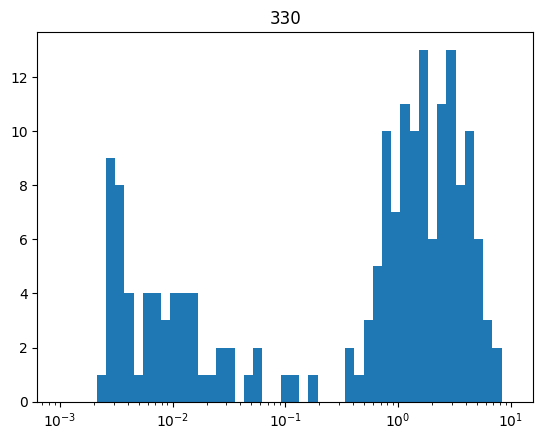

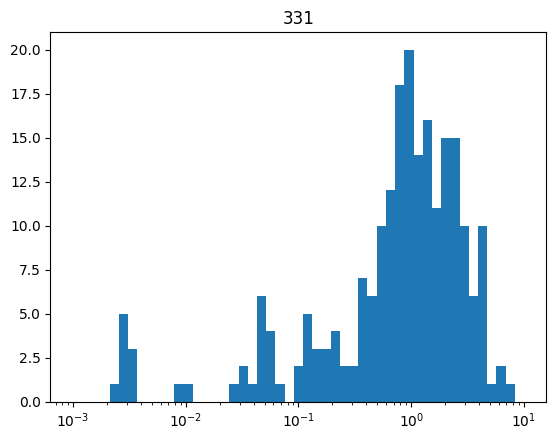

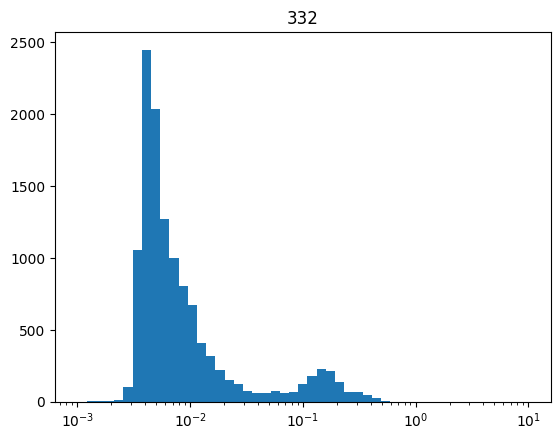

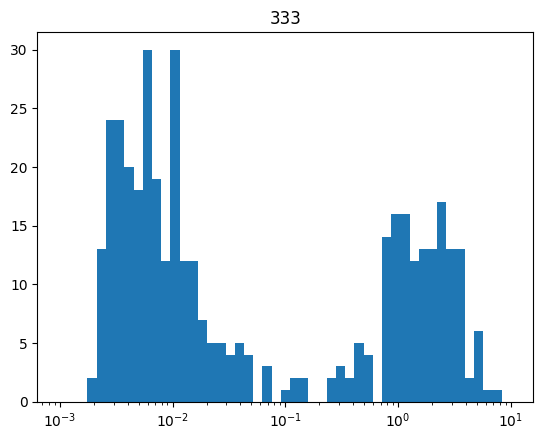

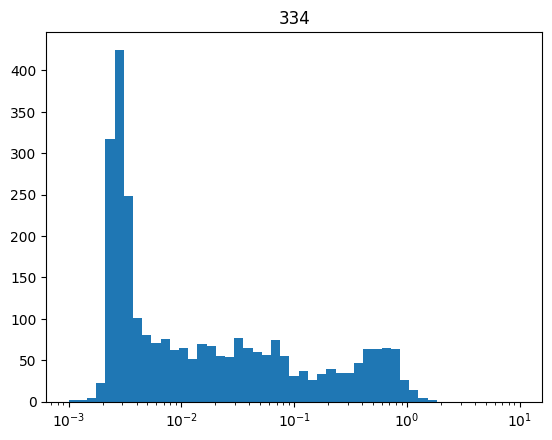

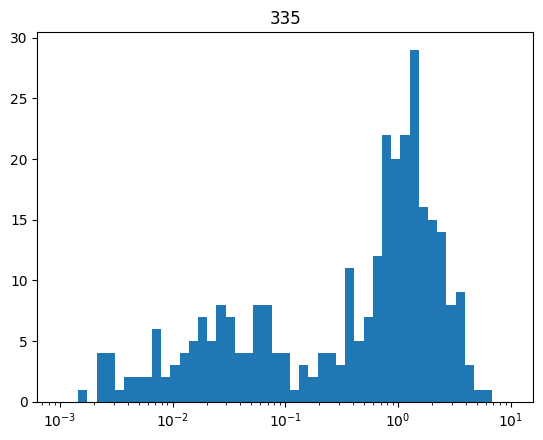

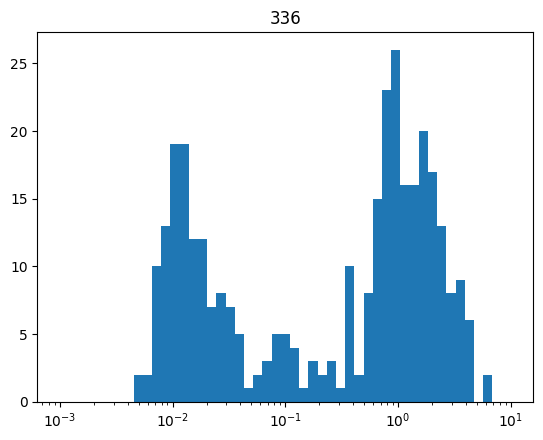

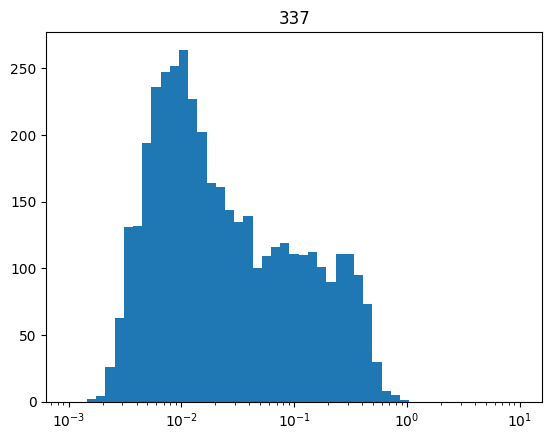

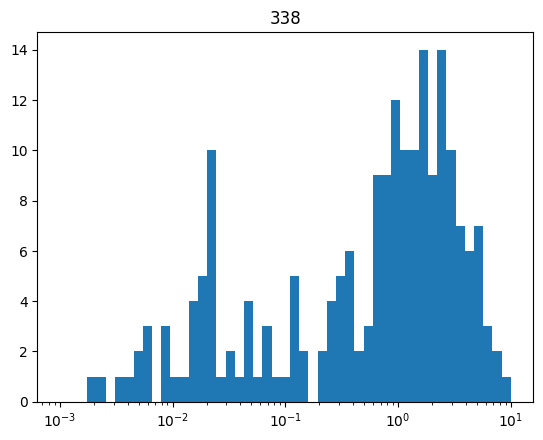

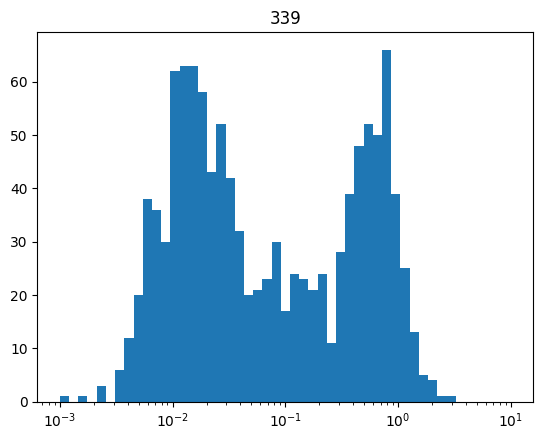

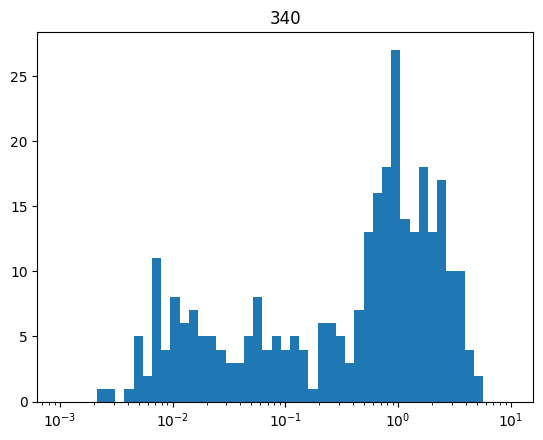

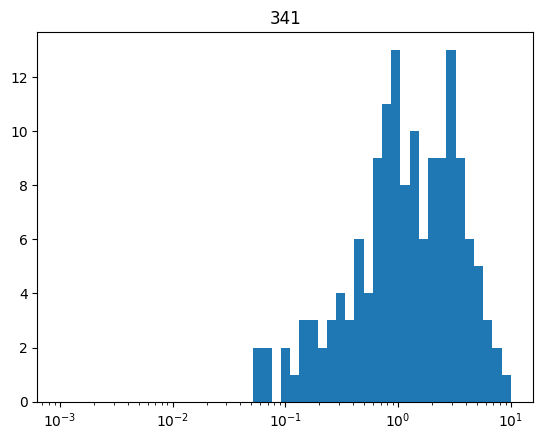

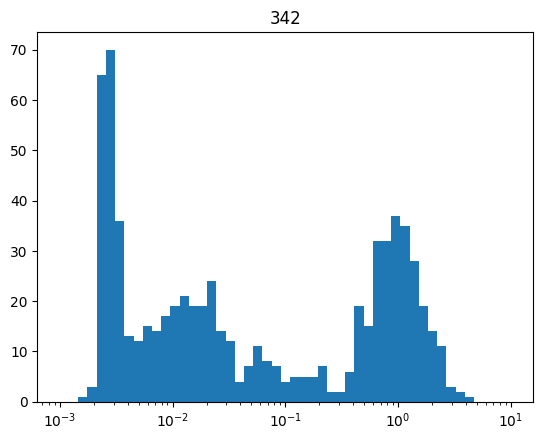

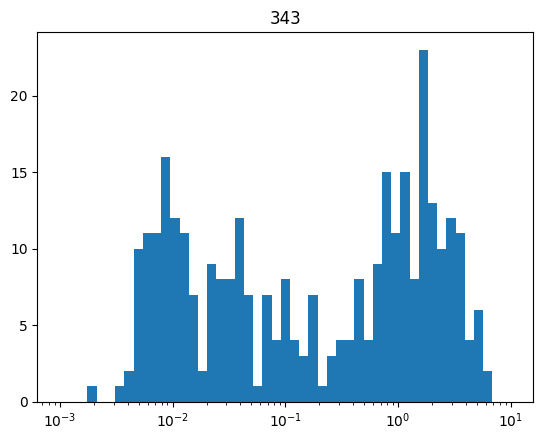

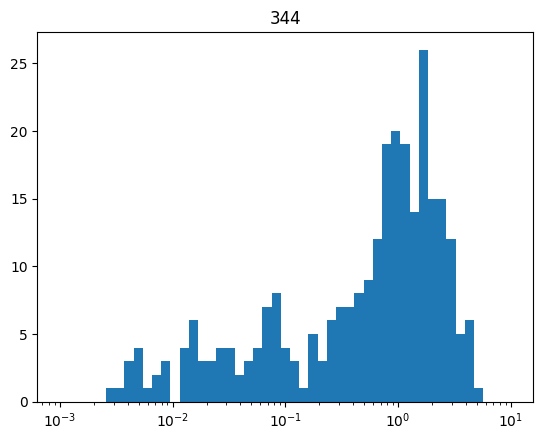

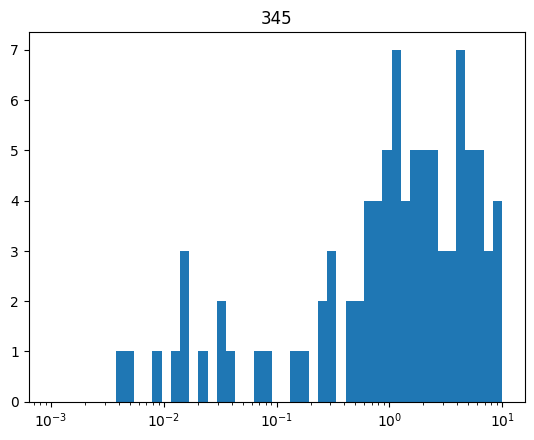

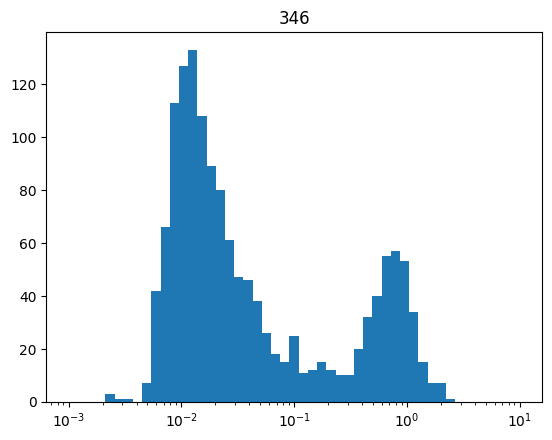

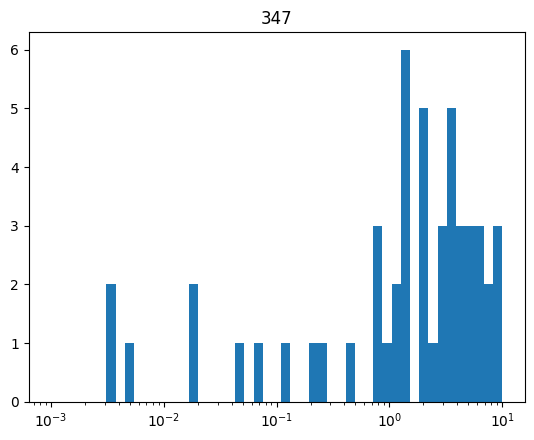

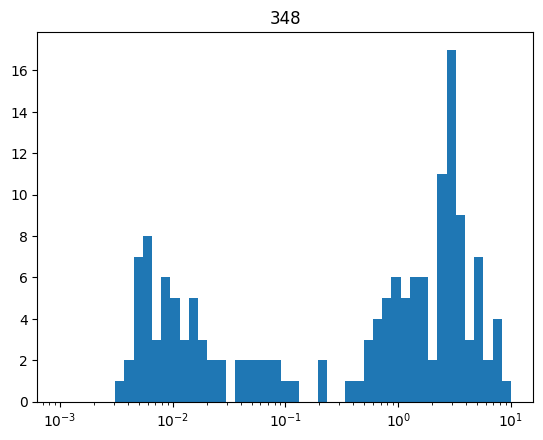

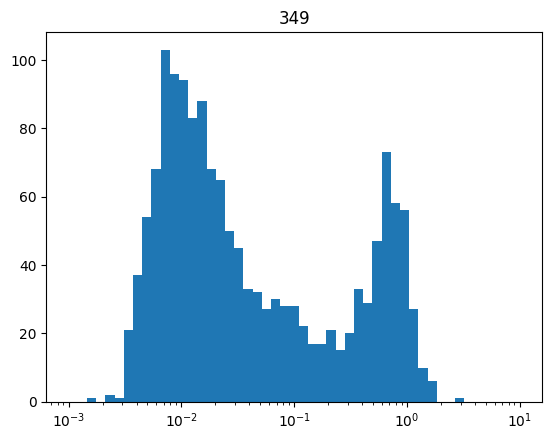

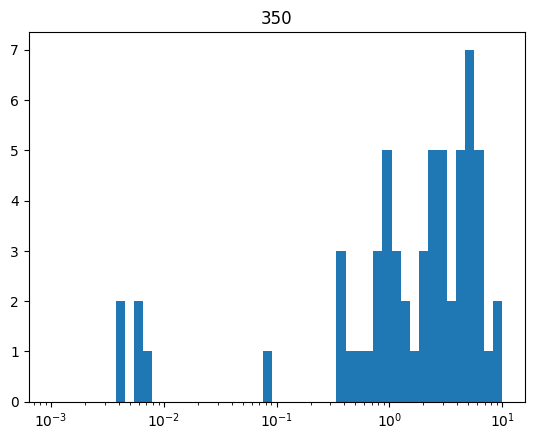

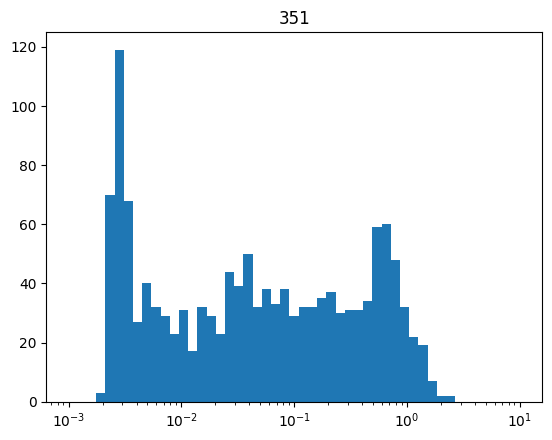

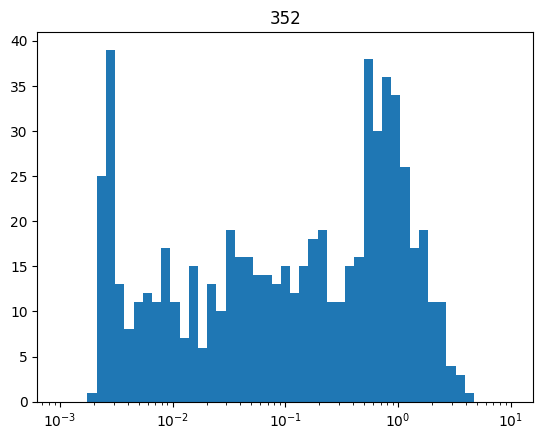

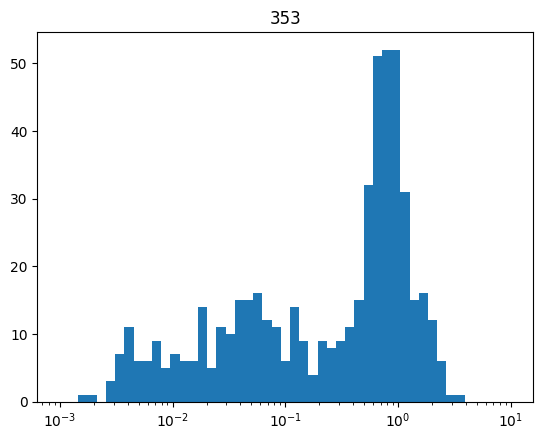

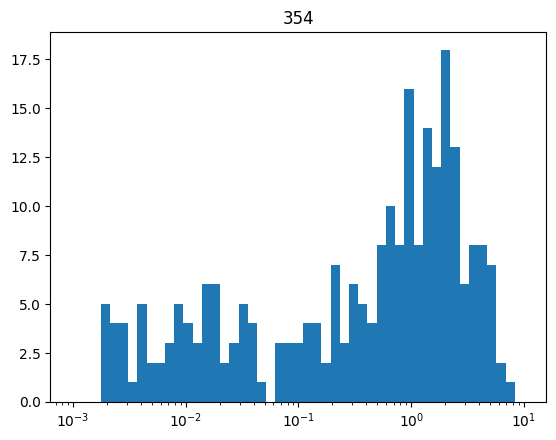

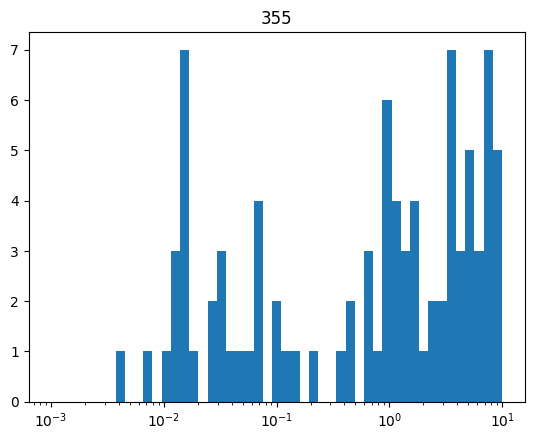

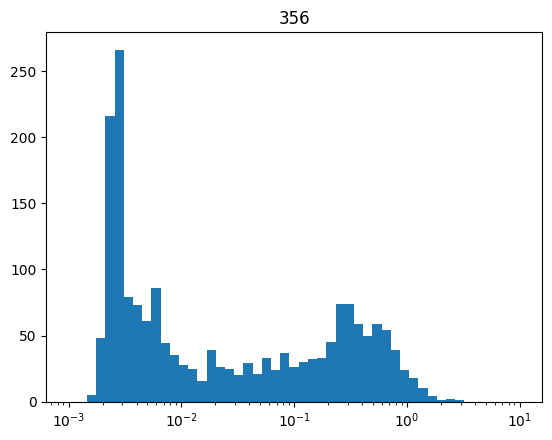

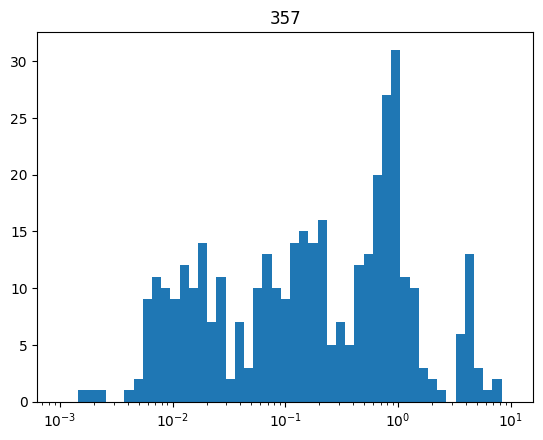

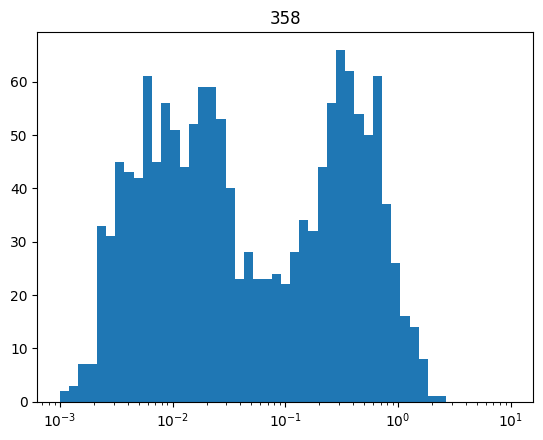

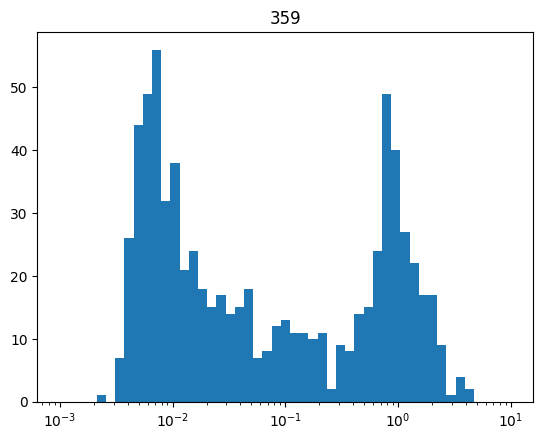

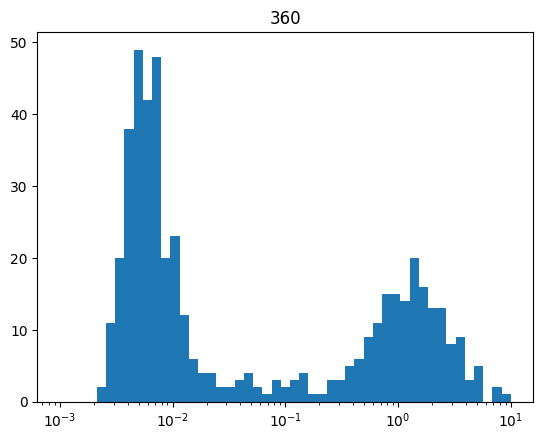

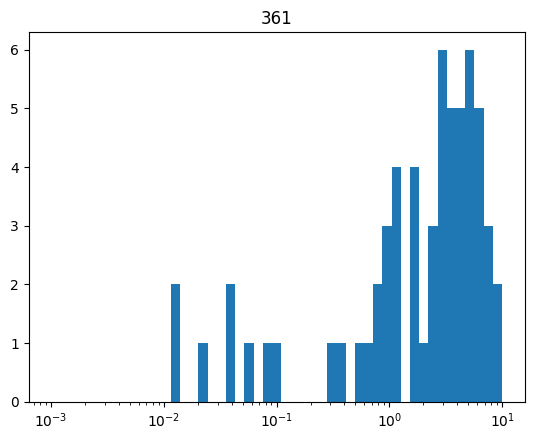

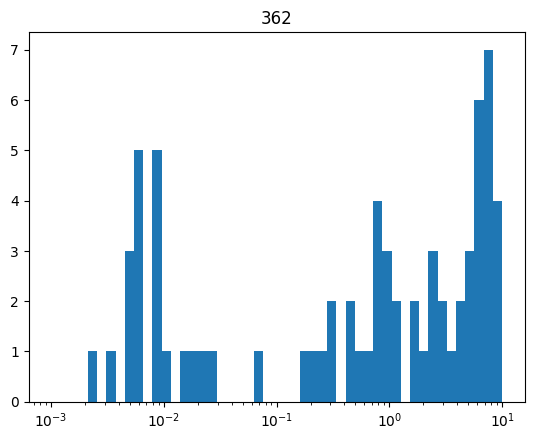

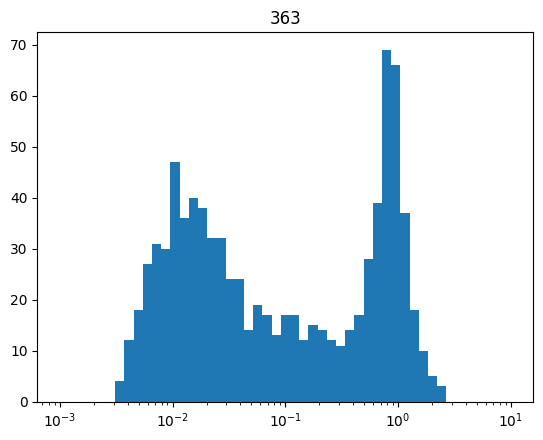

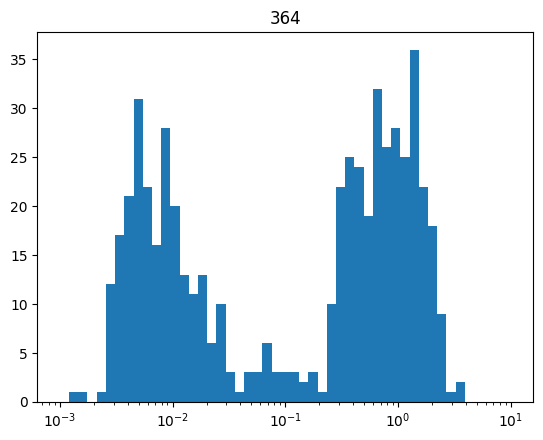

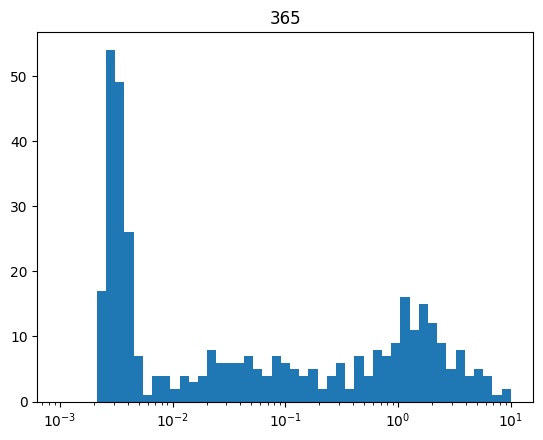

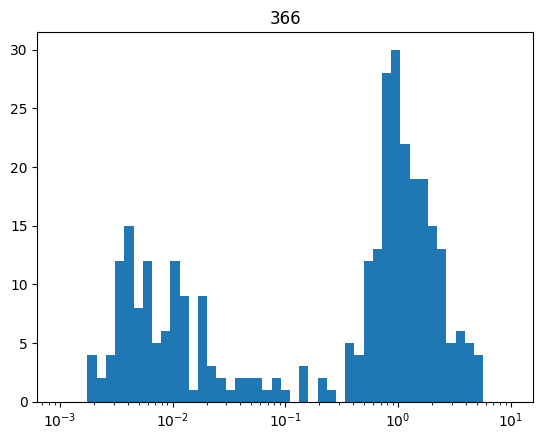

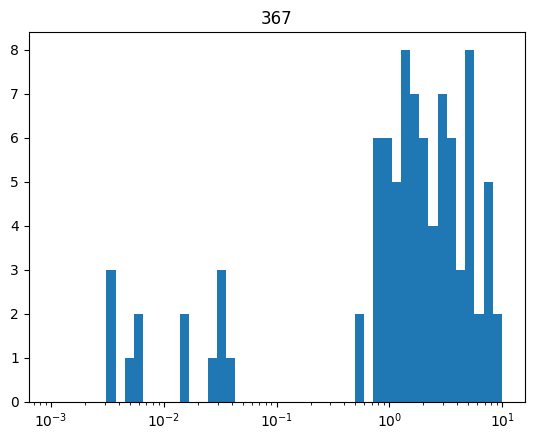

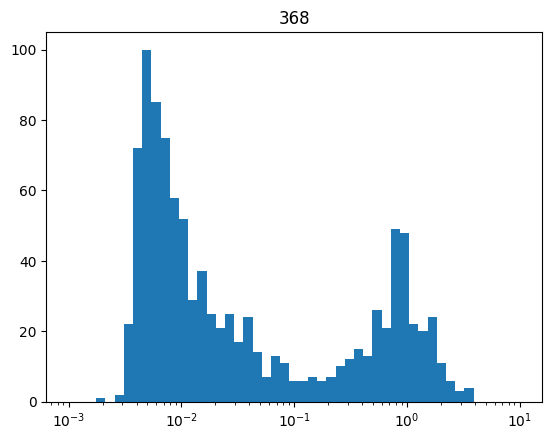

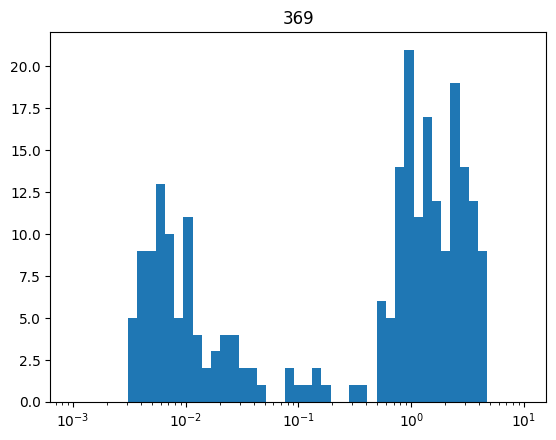

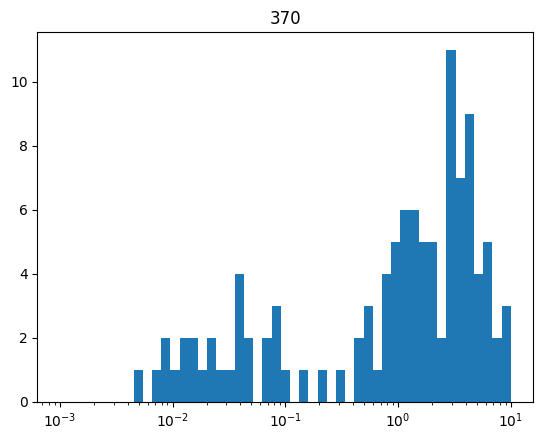

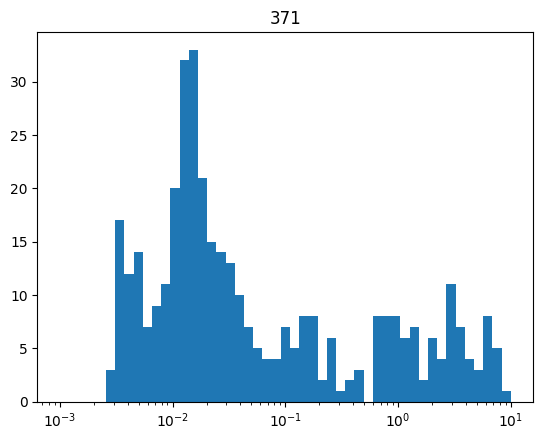

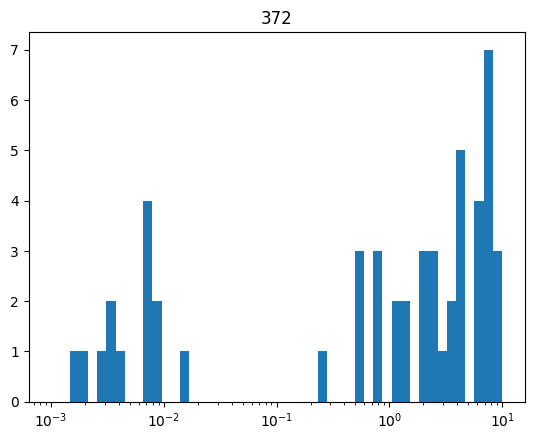

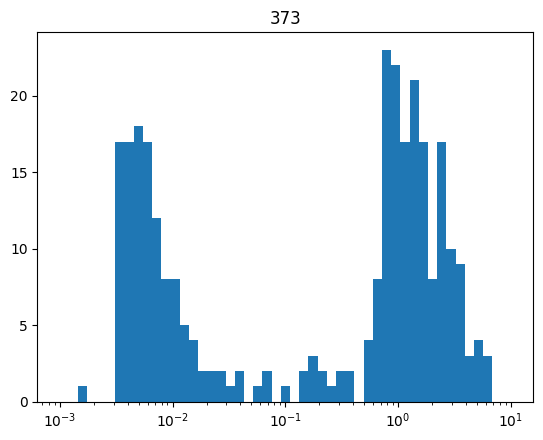

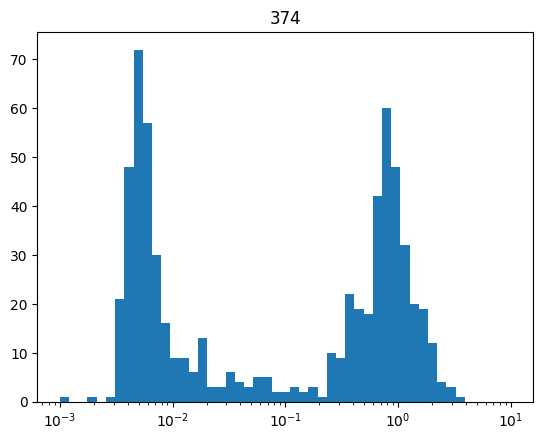

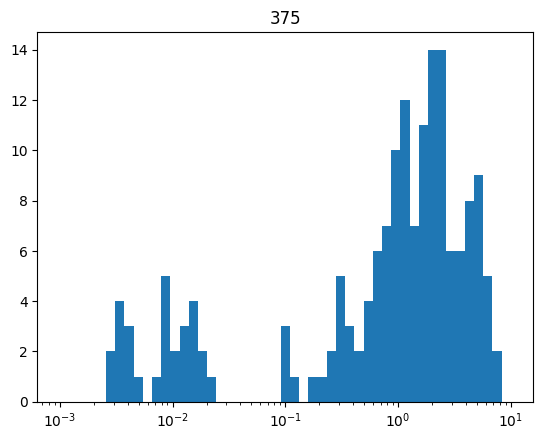

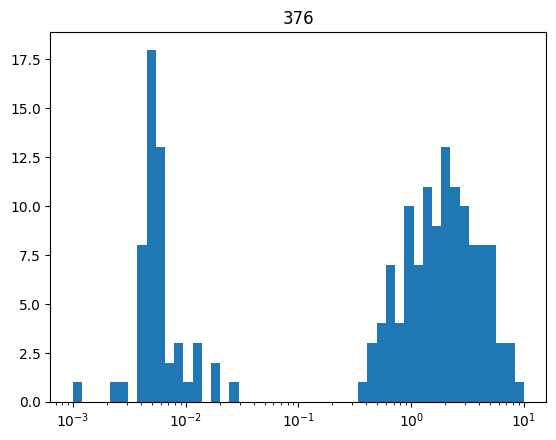

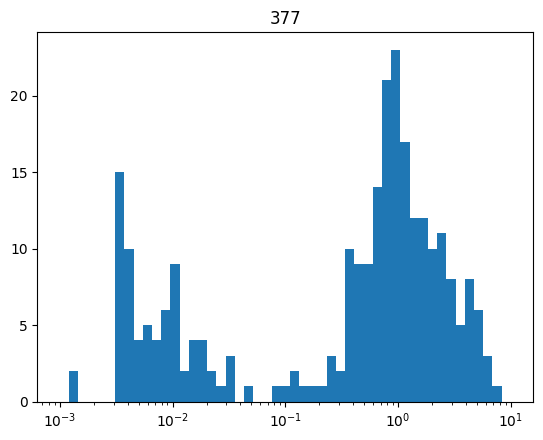

In [173]:
bins = np.geomspace(0.001, 10, 50)

for i, train in enumerate(MEA_data.spikes_binary[:-1]):
    diff = np.diff(np.argwhere(train)[:,0])/MEA_data.sample_rate
    plt.title(str(i))
    plt.hist(diff, bins=bins)
    plt.xscale('log')
    plt.show()

In [ ]:
bins = np.geomspace(0.0001, 100, 50)

diff_total = np.array([])

for i, train in enumerate(MEA_data.spikes_binary):
    diff = np.diff(np.argwhere(train)[:,0])/MEA_data.sample_rate
    diff_total = np.append(diff_total, diff)




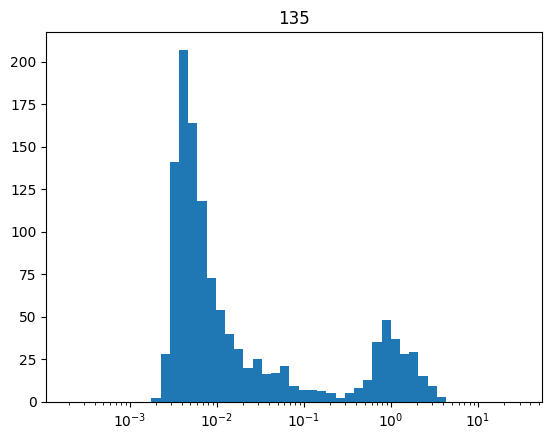

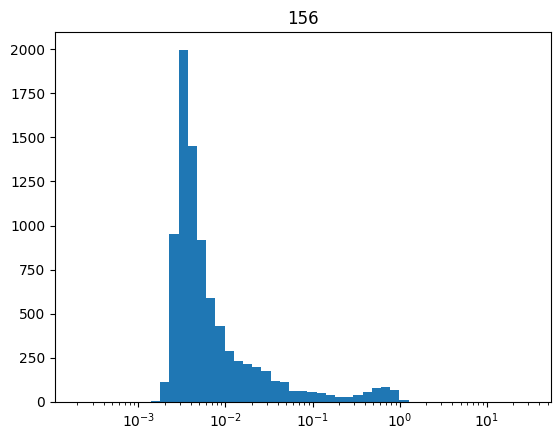

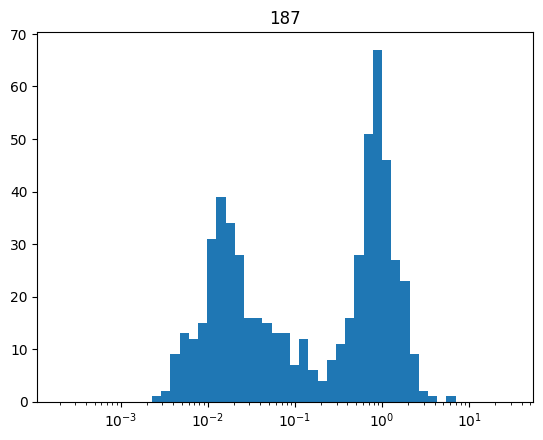

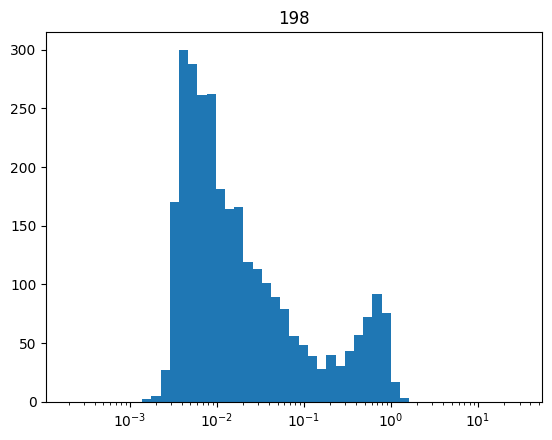

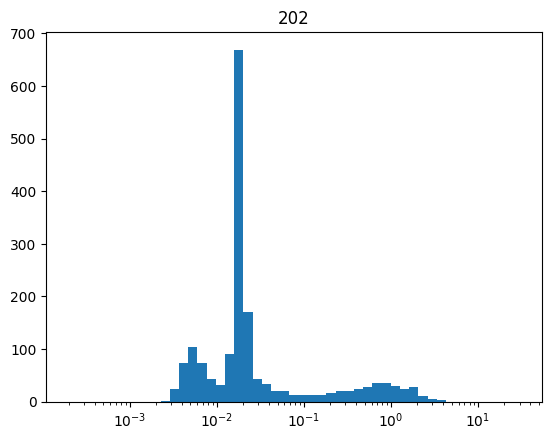

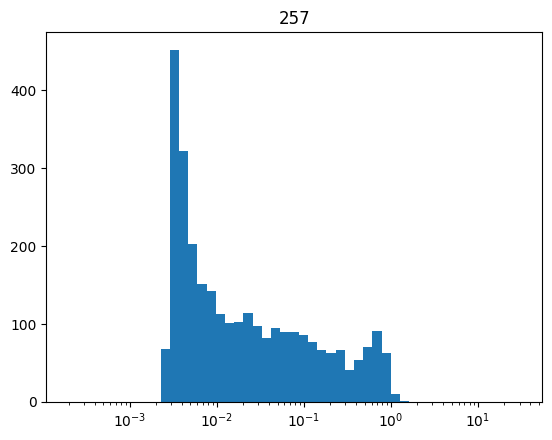

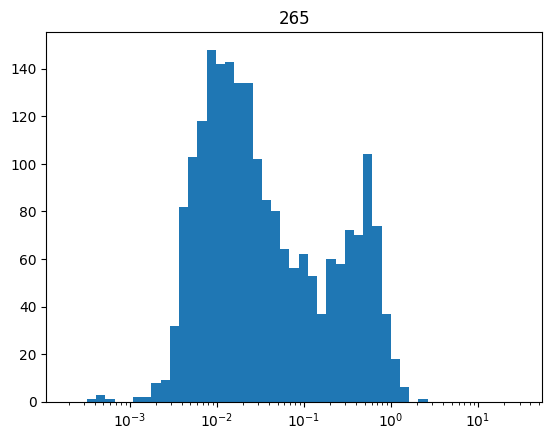

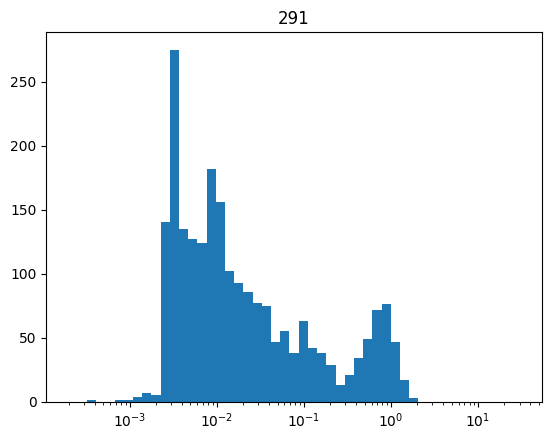

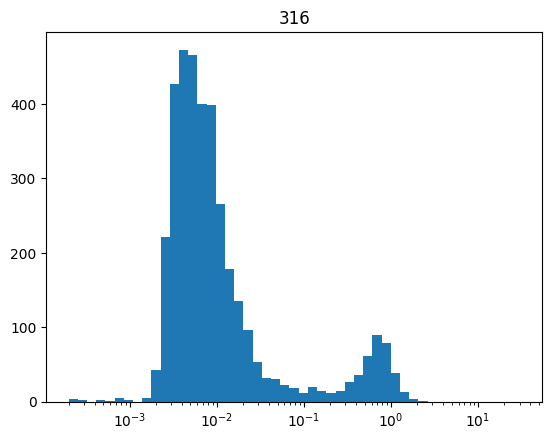

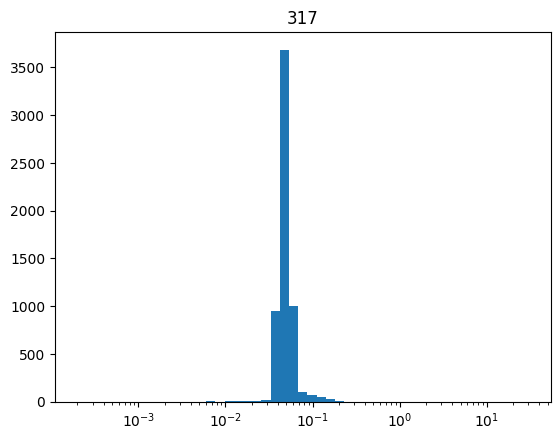

In [186]:
bins = np.geomspace(0.0002, 30, 50)

for i, train in enumerate(MEA_data.spikes_binary[:-1]):
    if i in kanker:
        diff = np.diff(np.argwhere(train)[:,0])/MEA_data.sample_rate
        plt.title(str(i))
        plt.hist(diff, bins=bins)
        plt.xscale('log')
        plt.show()

In [181]:
np.shape(np.array(diff_total))

(405174,)

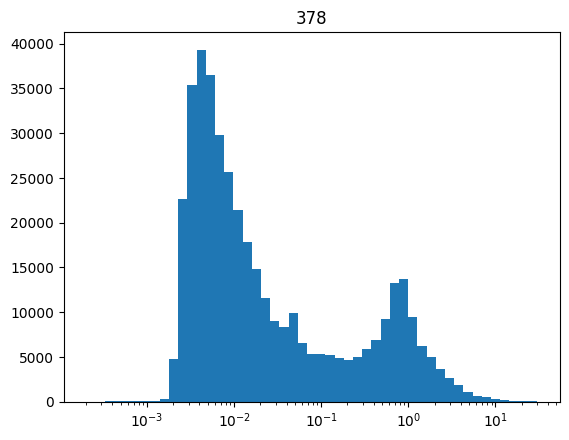

In [185]:
plt.title(str(i))
plt.hist(diff_total, bins=np.geomspace(0.0002, 30, 50))
plt.xscale('log')
plt.show()